In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"

import geopandas
import pandas as pd
import json
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
from scipy import stats
#import kaleido

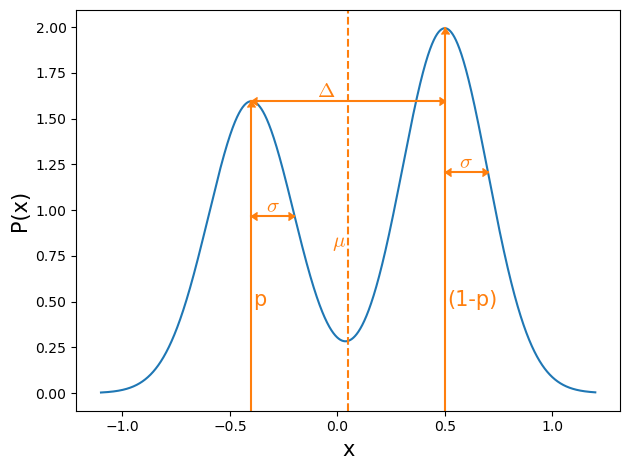

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, sigma, mu):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)


def main():
    x = np.linspace(-1.1, 1.2, 10000)
    mu1 = -0.4
    mu2 = 0.5
    sigma = 0.2
    ratio = 0.8
    linestyle = "-"
    color = "C1"
    y1 = ratio * gaussian(mu1 + sigma, sigma, mu1)
    y2 = gaussian(mu2 + sigma, sigma, mu2)
    g1 = ratio * gaussian(x, sigma, mu1)
    g2 = gaussian(x, sigma, mu2)
    m1 = np.max(g1)
    m2 = np.max(g2)
    g = g1 + g2
    fig, ax = plt.subplots()
    ax.plot(x, g)
    ymin, ymax = ax.get_ylim()
    ax.plot([mu1, mu1], [ymin, m1], ls=linestyle, c=color)
    ax.plot(mu1, m1, c=color, marker=6)
    ax.plot([mu1, mu1+sigma], [y1, y1], ls=linestyle, c=color)
    ax.plot(mu1, y1, c=color, marker=4)
    ax.plot(mu1+sigma, y1, c=color, marker=5)
    ax.plot([mu1, mu2], [m1, m1], ls=linestyle, c=color)
    ax.plot(mu1, m1, c=color, marker=4)
    ax.plot(mu2, m1, c=color, marker=5)
    ax.axvline((mu2+mu1)/2, ls='--', c=color)
    ax.plot([mu2, mu2], [ymin, m2], ls=linestyle, c=color)
    ax.plot(mu2, m2, c=color, marker=6)
    ax.plot([mu2, mu2+sigma], [y2, y2], ls=linestyle, c=color)
    ax.plot(mu2, y2, c=color, marker=4)
    ax.plot(mu2+sigma, y2, c=color, marker=5)
    ax.text(mu1 + 0.5 * sigma,  y1, r"$\sigma$",ha="center", c=color, va="bottom", fontsize='15')

    ax.text(-0.05, m1, r"$\Delta$", ha="center", c=color, va="bottom", fontsize='15')
    ax.text(mu1 + 0.01, 0.3 * m1, "p", c=color, fontsize='15')
    ax.text(mu2 + 0.01, 0.3 * m1, "(1-p)", c=color, fontsize='15')
    ax.text(mu2 + 0.5 * sigma,  y2, r"$\sigma$", ha="center", c=color, va="bottom", fontsize='15')

    ax.text((mu2+mu1)/2-0.01, 0.5*m1, r"$\mu$", c=color, ha="right",fontsize='15')
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('x', fontsize='15')
    ax.set_ylabel('P(x)', fontsize='15')
    fig.tight_layout()
    
    plt.show()

main()

In [3]:
# Define the location for the folder 'DATA'
Main_path='/home/glory/Documents/Python/DATA/'

## VALIDATION ON HOUSE OF REPRESENTATIVE ELCTIONS (Even distribution of budget)

In [4]:
path=Main_path+'US_CONST_EVEN/'
Influence_array1=np.array((0.25,0.5,1,2,3,4,5,6,7,8,9,10,12,15,20,25,30,35,40,45,50,75,100))
neps=25
#neps=151
years=5
NOS=100
Num_type=3
year_start=2012
year_end=2020
Num_districts=435

YEARS=np.linspace(year_start,year_end,years,dtype=int)
Districts_influenced=78
#NUM_DISTRICTS_CHANGED=np.zeros((len(Influence_Array),Num_type, years, NOS, neps,Num_districts))
SUCCESS=np.zeros((years,Num_type,NOS,neps,len(Influence_array1),Num_districts))
for num_type in range(Num_type):
    i=0
    for year in YEARS:
        data=np.load(path+'usrepub_'+str(num_type+1)+'_'+str(year)+'.npz')
        e_range=data['e_range']
        SUCCESS[i,num_type]=data['SUCCESS']
        Influence_percentage_array=data['Influence_percentage_array']
        i=i+1 
Success=np.mean(np.sum(SUCCESS,axis=2),axis=0)  

df=pd.read_csv(Main_path+'HOR_DATA/Election_results.csv', converters={'CD_NUM (2010)': str, 'STATE_FP (2010)': str, 'ID (2010)' : str, 'CD_NUM': str , 'STATE_FP': str , 'ID' : str})
years=np.linspace(2012,2020,5, dtype=int)
change=np.zeros((Num_districts))
for i in range(len(years)-1):
    change+=abs((df['Republican '+str(years[i])]>50)*1-(df['Republican '+str(years[i+1])]>50)*1)


Correlation_Matrix=np.zeros((Num_type, neps, len(Influence_array1)))
for i in range(Num_type):
    for j in range(neps):
        for k in range(len(Influence_array1)):
            Correlation_Matrix[i,j,k]=np.corrcoef(Success[i,j,k,:], change)[0,1]
    

In [5]:
color=plt.get_cmap("YlOrRd",4)
Arg=(change!=0)*1*np.arange(0,len(change),1)
Arg=Arg[Arg!=0]

Correlation_Matrix_change=np.zeros((Num_type, neps, len(Influence_array1)))
for i in range(Num_type):
    for j in range(neps):
        for k in range(len(Influence_array1)):
            Correlation_Matrix_change[i,j,k]=np.corrcoef(Success[i,j,k,Arg], change[Arg])[0,1]

c=['r','b','g','m']
LABEL=['D1','D2','D3','D4']
#plt.figure(figsize=(10,4))
Array1=np.zeros((Num_type,len(Influence_array1)))
Array2=np.zeros((Num_type,len(Influence_array1)))
Array3=np.zeros((Num_type,len(Influence_array1)))

for inf in range(len(Influence_array1)):
    for num_type in range(Num_type):
        Array1[num_type,inf]=np.mean(Correlation_Matrix_change,axis=1)[num_type,inf].round(decimals=3)
        Array2[num_type,inf]=np.std(Correlation_Matrix_change,axis=1)[num_type,inf]
        Array3[num_type,inf]=np.max(Correlation_Matrix_change,axis=1)[num_type,inf].round(decimals=3)
          



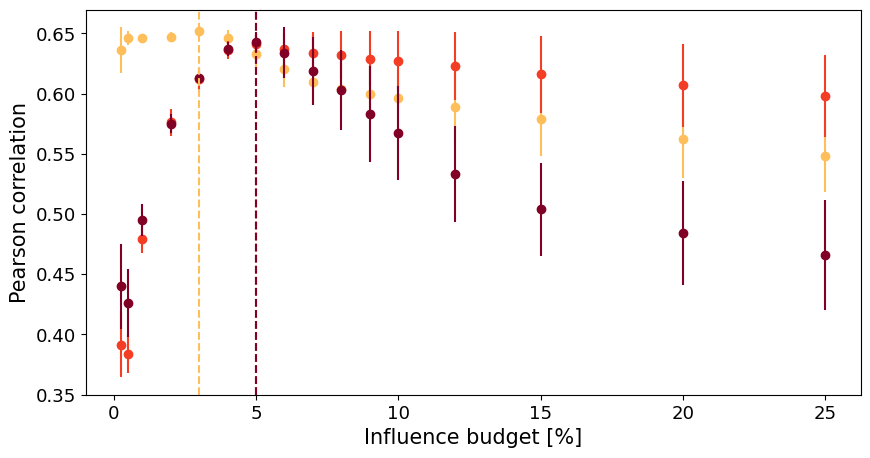

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 13})

c=['r','b','g','m']
LABEL=['D1','D2','D3','D4']
#plt.figure(figsize=(10,4))
Array1=np.zeros((Num_type,len(Influence_array1)))
Array2=np.zeros((Num_type,len(Influence_array1)))
Array3=np.zeros((Num_type,len(Influence_array1)))

for inf in range(len(Influence_array1)):
    for num_type in range(Num_type):
        Array1[num_type,inf]=np.mean(Correlation_Matrix,axis=1)[num_type,inf].round(decimals=3)
        Array2[num_type,inf]=np.std(Correlation_Matrix,axis=1)[num_type,inf]
        Array3[num_type,inf]=np.max(Correlation_Matrix,axis=1)[num_type,inf].round(decimals=3)
          

plt.figure(figsize=(10,5))
Num_type=3
for num_type in range(Num_type):
    plt.plot(Influence_array1[0:16],Array1[num_type][0:16],'o',color=color(num_type+1),label=LABEL[num_type])
    plt.errorbar(Influence_array1[0:16],Array1[num_type][0:16],Array2[num_type][0:16],color=color(num_type+1),ls='none')
plt.xlabel('Influence budget [%]',fontsize='15')
plt.ylabel('Pearson correlation',fontsize='15')   
#plt.legend()

Max_inf=Influence_array1[np.argmax(Array1,axis=1)]
for num_type in range(Num_type):
    plt.axvline(Max_inf[num_type],linestyle='--',color=color(num_type+1))
    

In [7]:
data=df['Districts']
Data = pd.DataFrame(data, columns=['Districts'])
Data.insert(len(Data.columns), 'ID', df['ID'])
Data.insert(len(Data.columns), 'Actual change', change)
for type in range(Num_type):
    for inf in range(len(Influence_array1)):
        eps_pos=np.argmax(Correlation_Matrix,axis=1)[type,inf]
        epsilon=str(e_range[np.argmax(Correlation_Matrix,axis=1)[type,inf]].round(decimals=3))
        corr=str(np.max(Correlation_Matrix,axis=1)[type,inf].round(decimals=3))
        S=Success[type,eps_pos,inf]
        name ='Inf: '+str(Influence_array1[inf])+' Type: '+str(type+1)+' eps:'+epsilon+' Corr: '+ corr
        Data.insert(len(Data.columns),name,S)        

In [8]:

geojson = json.load(open(Main_path+"GEO_DATA/US_Congressional_Districts.geodata", 'r'))

Max_inf = Max_inf.astype('int')

white_space='                                                                                                   '
ABC=['a'+white_space, 'b'+white_space, 'c'+white_space, 'd'+white_space]

subtitles=['a']
Num_type=3
for type in range(Num_type):
    inf=np.where(Influence_array1==Max_inf[type])[0][0]
    subtitles.append(ABC[type]+' \u03B5 = '+str(e_range[np.argmax(Correlation_Matrix,axis=1)[type,inf]].round(decimals=3))+', r = '+ str(np.max(Correlation_Matrix,axis=1)[type,inf].round(decimals=3))+', IB = '+str(Influence_array1[inf]*0.1))
#print(subtitles)   

for feature in geojson['features']:
    feature['properties']['ID'] = feature['properties']['STATEFP'].__str__()+feature['properties']['CD115FP'].__str__()

fig = make_subplots(
rows=2, cols=2,
specs=[
    [{"type": "choropleth"},{"type": "choropleth"}],
    [{"type": "choropleth"}, {"type": "choropleth"}],
],
#subplot_titles = [subtitles[0],subtitles[1],subtitles[2],subtitles[3]],
#subplot_titles = [ABCD[0],ABCD[1],ABCD[2],ABCD[3]],    
vertical_spacing = 0.15,  
horizontal_spacing = 0.00000015,
)

fig.add_trace(trace=go.Choropleth(
    geojson=geojson,
    featureidkey='properties.ID',
    locations=Data['ID'],
    z=Data['Actual change']*25,
    zmin=0,
    zmax=100,
    colorscale='ylorrd',
    #colorbar = dict(x=0.45,y=0.8,len=0.5)
), row=1, col=1)

#ini=np.array((0.48,0.73,1))

type=0
inf=np.where(Influence_array1==Max_inf[type])[0][0]
eps_pos=np.argmax(Correlation_Matrix,axis=1)[type,inf]
epsilon=str(e_range[np.argmax(Correlation_Matrix,axis=1)[type,inf]].round(decimals=3))
corr=str(np.max(Correlation_Matrix,axis=1)[type,inf].round(decimals=3))
item ='Inf: '+str(Influence_array1[inf])+' Type: '+str(type+1)+' eps:'+epsilon+' Corr: '+ corr
fig.add_trace(trace=go.Choropleth(
    geojson=geojson,
    featureidkey='properties.ID',
    locations=Data['ID'],
    z=Data[item],
    zmin=0,
    zmax=100,
    colorscale='ylorrd',
    #colorbar = dict(x=0.95,y=0.8,len=0.5)    
), row=1, col=2)

type=1
inf=np.where(Influence_array1==Max_inf[type])[0][0]
eps_pos=np.argmax(Correlation_Matrix,axis=1)[type,inf]
epsilon=str(e_range[np.argmax(Correlation_Matrix,axis=1)[type,inf]].round(decimals=3))
corr=str(np.max(Correlation_Matrix,axis=1)[type,inf].round(decimals=3))
item ='Inf: '+str(Influence_array1[inf])+' Type: '+str(type+1)+' eps:'+epsilon+' Corr: '+ corr
fig.add_trace(trace=go.Choropleth(
    geojson=geojson,
    featureidkey='properties.ID',
    locations=Data['ID'],
    z=Data[item],
    zmin=0,
    zmax=100,
    colorscale='ylorrd',
    #colorbar = dict(x=0.45,y=0.2,len=0.5)    
), row=2, col=1)

type=2
inf=np.where(Influence_array1==Max_inf[type])[0][0]
eps_pos=np.argmax(Correlation_Matrix,axis=1)[type,inf]
epsilon=str(e_range[np.argmax(Correlation_Matrix,axis=1)[type,inf]].round(decimals=3))
corr=str(np.max(Correlation_Matrix,axis=1)[type,inf].round(decimals=3))
item ='Inf: '+str(Influence_array1[inf])+' Type: '+str(type+1)+' eps:'+epsilon+' Corr: '+ corr
fig.add_trace(trace=go.Choropleth(
    geojson=geojson,
    featureidkey='properties.ID',
    locations=Data['ID'],
    z=Data[item],
    zmin=0,
    zmax=100,
    colorscale='ylorrd',
    #colorbar = dict(x=0.95,y=0.2,len=0.5)    
), row=2, col=2)



fig.update_geos(scope='usa')

fig.update_layout(
    title='', title_x=0.5, width=1500)
fig.show()   



Text(0, 105, 'c')

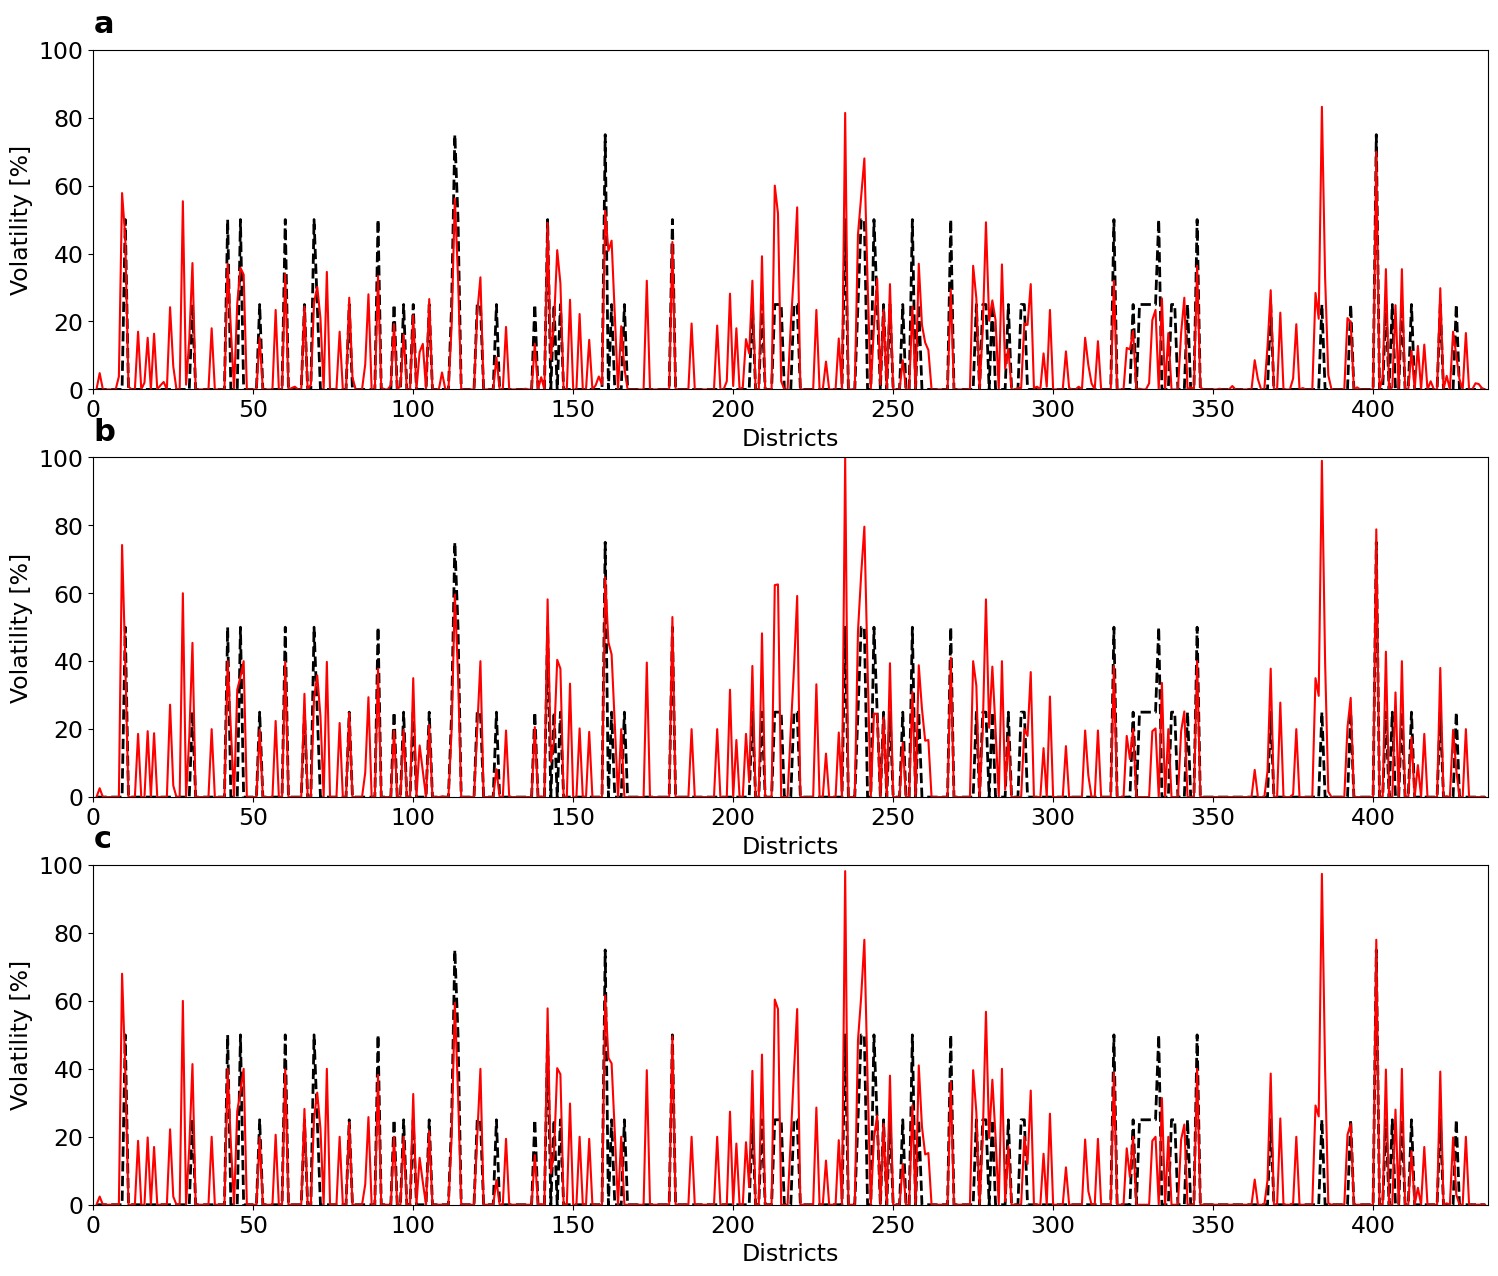

In [9]:
plt.rcParams.update({'font.size': 17})

Districts=np.arange(1,436,1)
Max_inf=Influence_array1[np.argmax(Array1,axis=1)]

ABC=['(b)','(c)','(d)','(e)']
subtitles=['(a) Historic Data']
Num_type=3
S=np.zeros((Num_type,Num_districts))
for num_type in range(Num_type):
    inf=np.where(Influence_array1==Max_inf[num_type])[0][0]
    #print(Influence_array1[inf])
    eps_pos=np.argmax(Correlation_Matrix,axis=1)[num_type,inf]
    subtitles.append(ABC[num_type]+' \u03B5 = '+str(e_range[np.argmax(Correlation_Matrix,axis=1)[num_type,inf]].round(decimals=3))+', r = '+ str(np.max(Correlation_Matrix,axis=1)[num_type,inf].round(decimals=3))+', Per. = '+str(Influence_array1[inf]))
    S[num_type]=Success[num_type,eps_pos,inf]

fig,ax=plt.subplots(Num_type,1,figsize=(18,15))
for num_type in range(Num_type): 
    ax[num_type].plot(Districts,(change/4)*100,'--',color='k',label='Historic Data',linewidth=2)
    ax[num_type].plot(Districts,S[num_type],color='r',label='Simulation')
    ax[num_type].set_xlabel('Districts')
    ax[num_type].set_ylabel('Volatility [%]')
    ax[num_type].set_xlim([0,436])
    ax[num_type].set_ylim([0,100])
    
ax[0].text(0, 105, 'a',fontsize=22,weight="bold")
ax[1].text(0, 105,'b',fontsize=22,weight="bold")  
ax[2].text(0, 105,'c',fontsize=22,weight="bold")



# Robustness against polarization ($\Delta$)

Number of agents in the electoral unit: 2001

Confidence bound range, $\epsilon$ = (0,1.5)

$\Delta$ range = (0,1)

Text(0.005, 1.003, 'c')

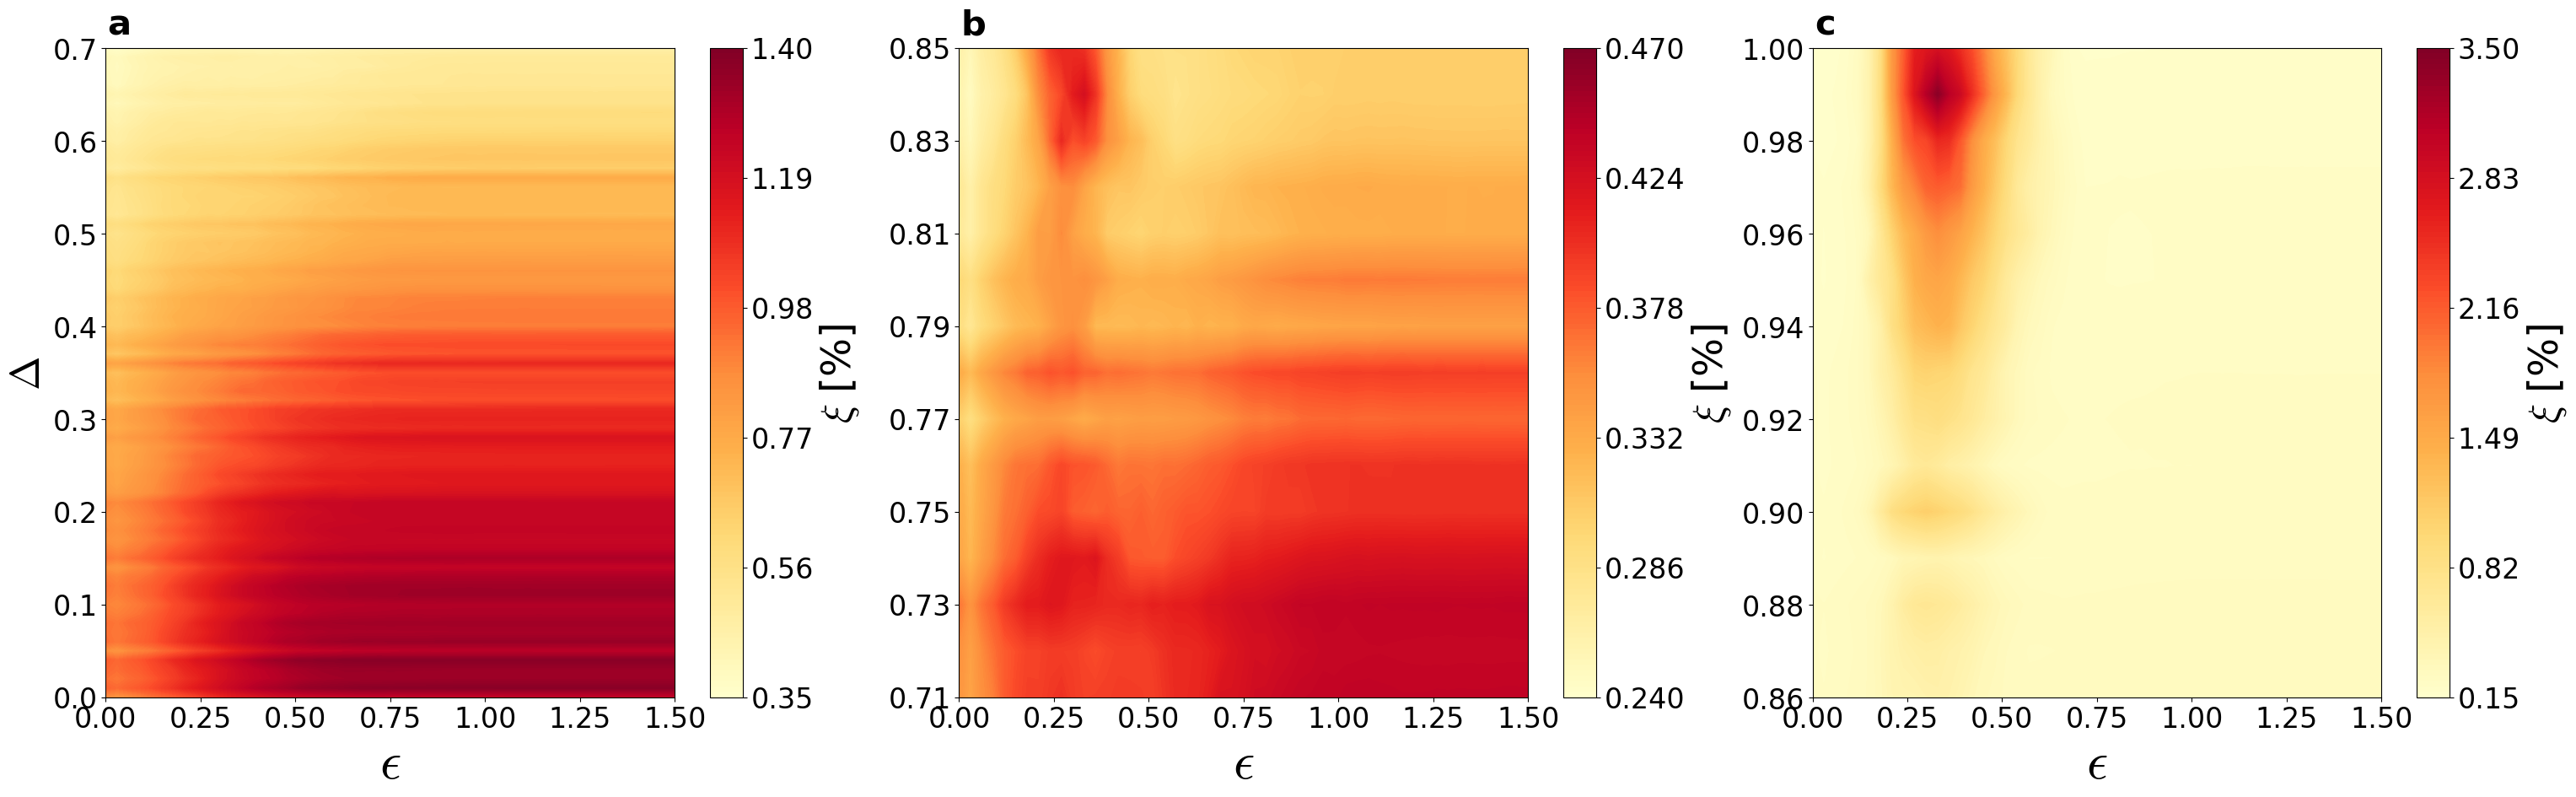

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 24})

fig,axes=plt.subplots(1,3, figsize=(37,10))

data=np.load(Main_path+'VAR_FILES/Polarization_delta.npz')

Num_ppl=data['Num_ppl']
e_range=data['e_range']
DELTA_vals=data['DELTA_vals']
MEAN_vals=data['MEAN_vals']
NUM_AGENTS_INFLUENCED=data['EFFORT']*10

vmin=0.35
vmax=1.4
num=0
xlist = e_range
ylist = DELTA_vals[0:71]
X, Y = np.meshgrid(xlist, ylist)
Z=((np.mean(NUM_AGENTS_INFLUENCED,axis=2)[:,0,:]/Num_ppl)*100)[0:71]
cp = axes[num].contourf(X, Y, Z, np.linspace(vmin,vmax,len(DELTA_vals)),cmap='YlOrRd')
axes[num].set_ylabel('$\Delta$',fontsize='35')
axes[num].set_xlabel('$\epsilon$',fontsize='45')
axes[num].set_yticks(np.linspace(0.0,0.7,8).round(decimals=3))
#axes[num].tick_params(axis='y',labelsize=11)
#axes[num].tick_params(axis='x',labelsize=11)
cbar1 = fig.colorbar(cp,ax=axes[num], ticks=np.linspace(vmin,vmax,6))
#cbar1.set_ticklabels(np.linspace(vmin,vmax,6).round(decimals=2),fontsize='11')
cbar1.set_label('$\\xi$ [%]',size='35') 
axes[num].text(0.005+min(axes[num].get_xlim()),0.015+max(axes[num].get_ylim()), 'a',fontsize=30, weight="bold")
axes[num].set_xlim(right=1.5)

vmin=0.24
vmax=0.47
num=1
xlist = e_range
ylist = DELTA_vals[71:86]
X, Y = np.meshgrid(xlist, ylist)
Z=((np.mean(NUM_AGENTS_INFLUENCED,axis=2)[:,0,:]/Num_ppl)*100)[71:86]
cp = axes[num].contourf(X, Y, Z,np.linspace(vmin,vmax,len(DELTA_vals)),cmap='YlOrRd')
#axes[num].set_ylabel('$\Delta$',fontsize='18')
axes[num].set_xlabel('$\epsilon$',fontsize='45')
axes[num].set_yticks(np.linspace(0.71,0.85,8).round(decimals=3))
#axes[num].tick_params(axis='y',labelsize=11)
#axes[num].tick_params(axis='x',labelsize=11)
cbar1 = fig.colorbar(cp,ax=axes[num], ticks=np.linspace(vmin,vmax,6))
#cbar1.set_ticklabels(np.linspace(vmin,vmax,6).round(decimals=2),fontsize='11')
cbar1.set_label('$\\xi$ [%]',size='35') 
axes[num].text(0.005+min(axes[num].get_xlim()),0.003+max(axes[num].get_ylim()), 'b',fontsize=30, weight="bold")
axes[num].set_xlim(right=1.5)

vmin=0.15
vmax=3.5
num=2
xlist = e_range
ylist = DELTA_vals[86:101]
X, Y = np.meshgrid(xlist, ylist)
Z=((np.mean(NUM_AGENTS_INFLUENCED,axis=2)[:,0,:]/Num_ppl)*100)[86:101]
cp = axes[num].contourf(X, Y, Z,np.linspace(vmin,vmax,len(DELTA_vals)),cmap='YlOrRd')
#axes[num].set_ylabel('$\Delta$',fontsize='18')
axes[num].set_xlabel('$\epsilon$',fontsize='45')
axes[num].set_yticks(np.linspace(0.86,1,8).round(decimals=3))
#axes[num].tick_params(axis='y',labelsize=11)
#axes[num].tick_params(axis='x',labelsize=11)
cbar1 = fig.colorbar(cp,ax=axes[num], ticks=np.linspace(vmin,vmax,6))
cbar1.set_label('$\\xi$ [%]',size='35') 
#cbarlabels = cbar1.get_yticklabels()
#cbar1.set_ticklabels(np.linspace(vmin,vmax,6).round(decimals=2),fontsize='11')
axes[num].set_xlim(right=1.5)
axes[num].text(0.005+min(axes[num].get_xlim()),0.003+max(axes[num].get_ylim()), 'c',fontsize=30, weight='bold')

#plt.savefig('/home/glory/Dropbox/Apps/Overleaf/PhD_thesis_1/Figures/'+'Variation_large_delta.pdf',bbox_inches='tight')

(0.0, 1.5)

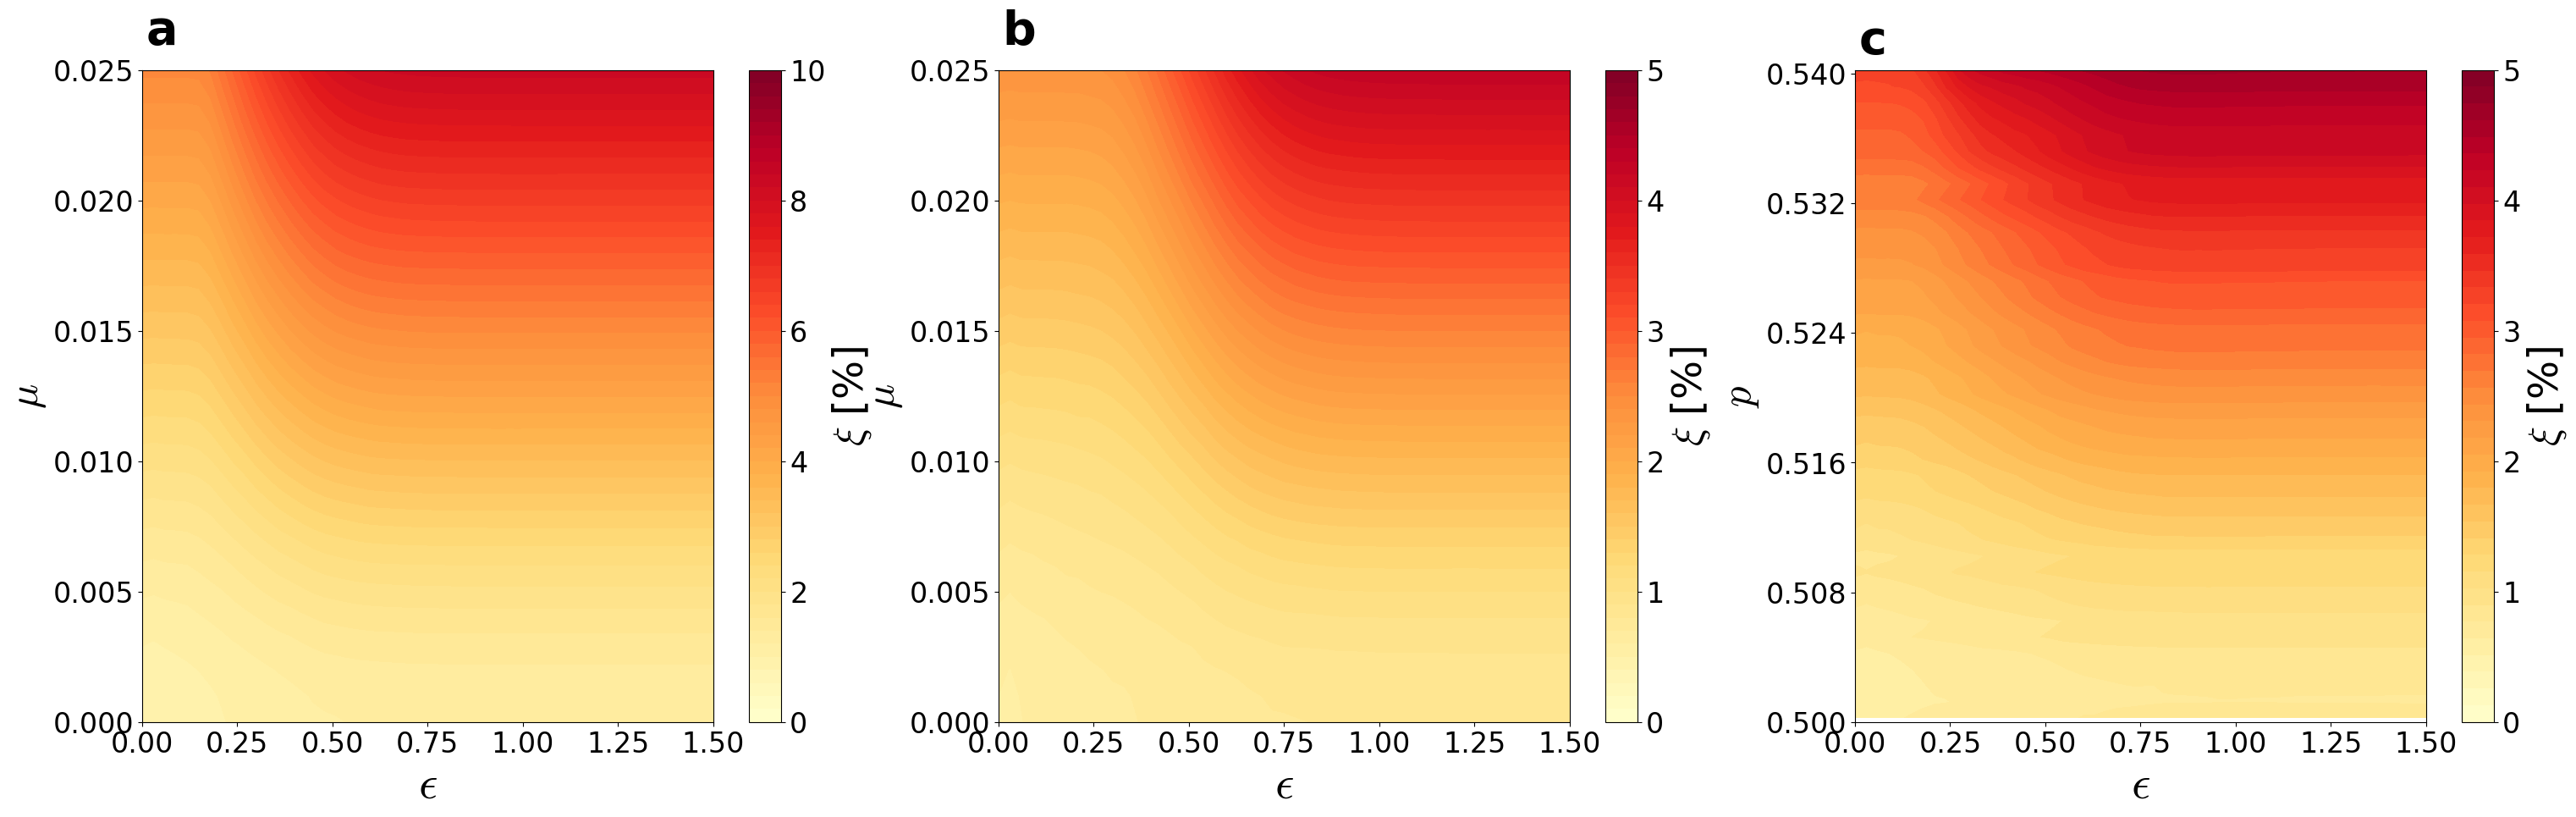

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 24})

fig,axes=plt.subplots(1,3,figsize=(37,10))

data=np.load(Main_path+'VAR_FILES/Mean_variation.npz')
Num_ppl=data['Num_ppl']
e_range=data['e_range']
DELTA_vals=data['DELTA_vals']
MEAN_vals=(data['MEAN_vals'][0:26])
NUM_AGENTS_INFLUENCED=data['NUM_AGENTS_INFLUENCED']

vmin=0
vmax=10
xlist=e_range
ylist=MEAN_vals
X, Y = np.meshgrid(xlist, ylist)
Z=((np.mean(NUM_AGENTS_INFLUENCED,axis=2)[0]/Num_ppl)*100)[0:26]
cp = axes[0].contourf(X, Y, Z,np.linspace(vmin,vmax,len(data['MEAN_vals'])),cmap='YlOrRd')
axes[0].set_ylabel('$\mu$',fontsize='35')
axes[0].set_xlabel('$\epsilon$',fontsize='40')
#axes[0].tick_params(axis='both',labelsize=11)
axes[0].text(0.01+min(axes[0].get_xlim()),0.001+max(axes[0].get_ylim()), 'a',fontsize=40, weight="bold")
#axes[0].set_yticks(np.linspace(0,10,5))
cbar1 = fig.colorbar(cp,ax=axes[0],ticks=range(vmin,vmax+1,2))
#cbar1.set_ticklabels(range(vmin,vmax+1,2),fontsize='11')
cbar1.set_label('$\\xi$ [%]',size='35') 
#cbar1.ax.set_title('%') 
axes[0].set_xlim(right=1.5)

vmin=0
vmax=5
X, Y = np.meshgrid(xlist, ylist)
Z=((np.mean(NUM_AGENTS_INFLUENCED,axis=2)[1]/Num_ppl)*100)[0:26]
cp = axes[1].contourf(X, Y, Z, np.linspace(vmin,vmax,len(data['MEAN_vals'])),cmap='YlOrRd')
axes[1].set_ylabel('$\mu$',fontsize='35')
axes[1].set_xlabel('$\epsilon$',fontsize='40')
#axes[1].tick_params(axis='both',labelsize=11)
axes[1].text(0.01+min(axes[1].get_xlim()),0.001+max(axes[1].get_ylim()), 'b',fontsize=40, weight="bold")
cbar1 = fig.colorbar(cp,ax=axes[1],ticks=range(vmin,vmax+1,1))
#cbar1.set_ticklabels(range(vmin,vmax+1,1),fontsize='11')
cbar1.set_label('$\\xi$ [%]',size='35') 
#cbar1.ax.set_title('%') 
axes[1].set_xlim(right=1.5)

data=np.load(Main_path+'VAR_FILES/Proportion_variation.npz')
Num_ppl=data['Num_ppl']
e_range=data['e_range']
DELTA_vals=data['DELTA_vals']
MEAN_vals=data['MEAN_vals']
NUM_AGENTS_INFLUENCED=data['NUM_AGENTS_INFLUENCED']
Array_pos=data['Array_pos']

xlist=e_range
ylist=(Array_pos/Num_ppl)[0:41]
X, Y = np.meshgrid(xlist, ylist)
Z=((np.mean(NUM_AGENTS_INFLUENCED,axis=2)[0]/Num_ppl)*100)[0:41]
cp = axes[2].contourf(X, Y, Z,np.linspace(vmin,vmax,40),cmap='YlOrRd')
axes[2].set_ylabel('$p$',fontsize='35')
axes[2].set_yticks(np.linspace(0.5,0.54,6))
axes[2].set_xlabel(r'$\epsilon$',fontsize='40')
#axes[2].tick_params(axis='both',labelsize=11)
axes[2].text(0.01+min(axes[2].get_xlim()),0.001+max(axes[2].get_ylim()), 'c',fontsize=40, weight="bold")
cbar1 = fig.colorbar(cp,ax=axes[2],ticks=range(vmin,vmax+1,1))
#cbar1.set_ticklabels(range(vmin,vmax+1,1),fontsize='11')
cbar1.set_label('$\\xi$ [%]',size='35') 
axes[2].set_xlim(right=1.5)

#plt.savefig('/home/glory/Dropbox/Apps/Overleaf/PhD_thesis_1/Figures/'+'Variation.pdf', bbox_inches='tight')

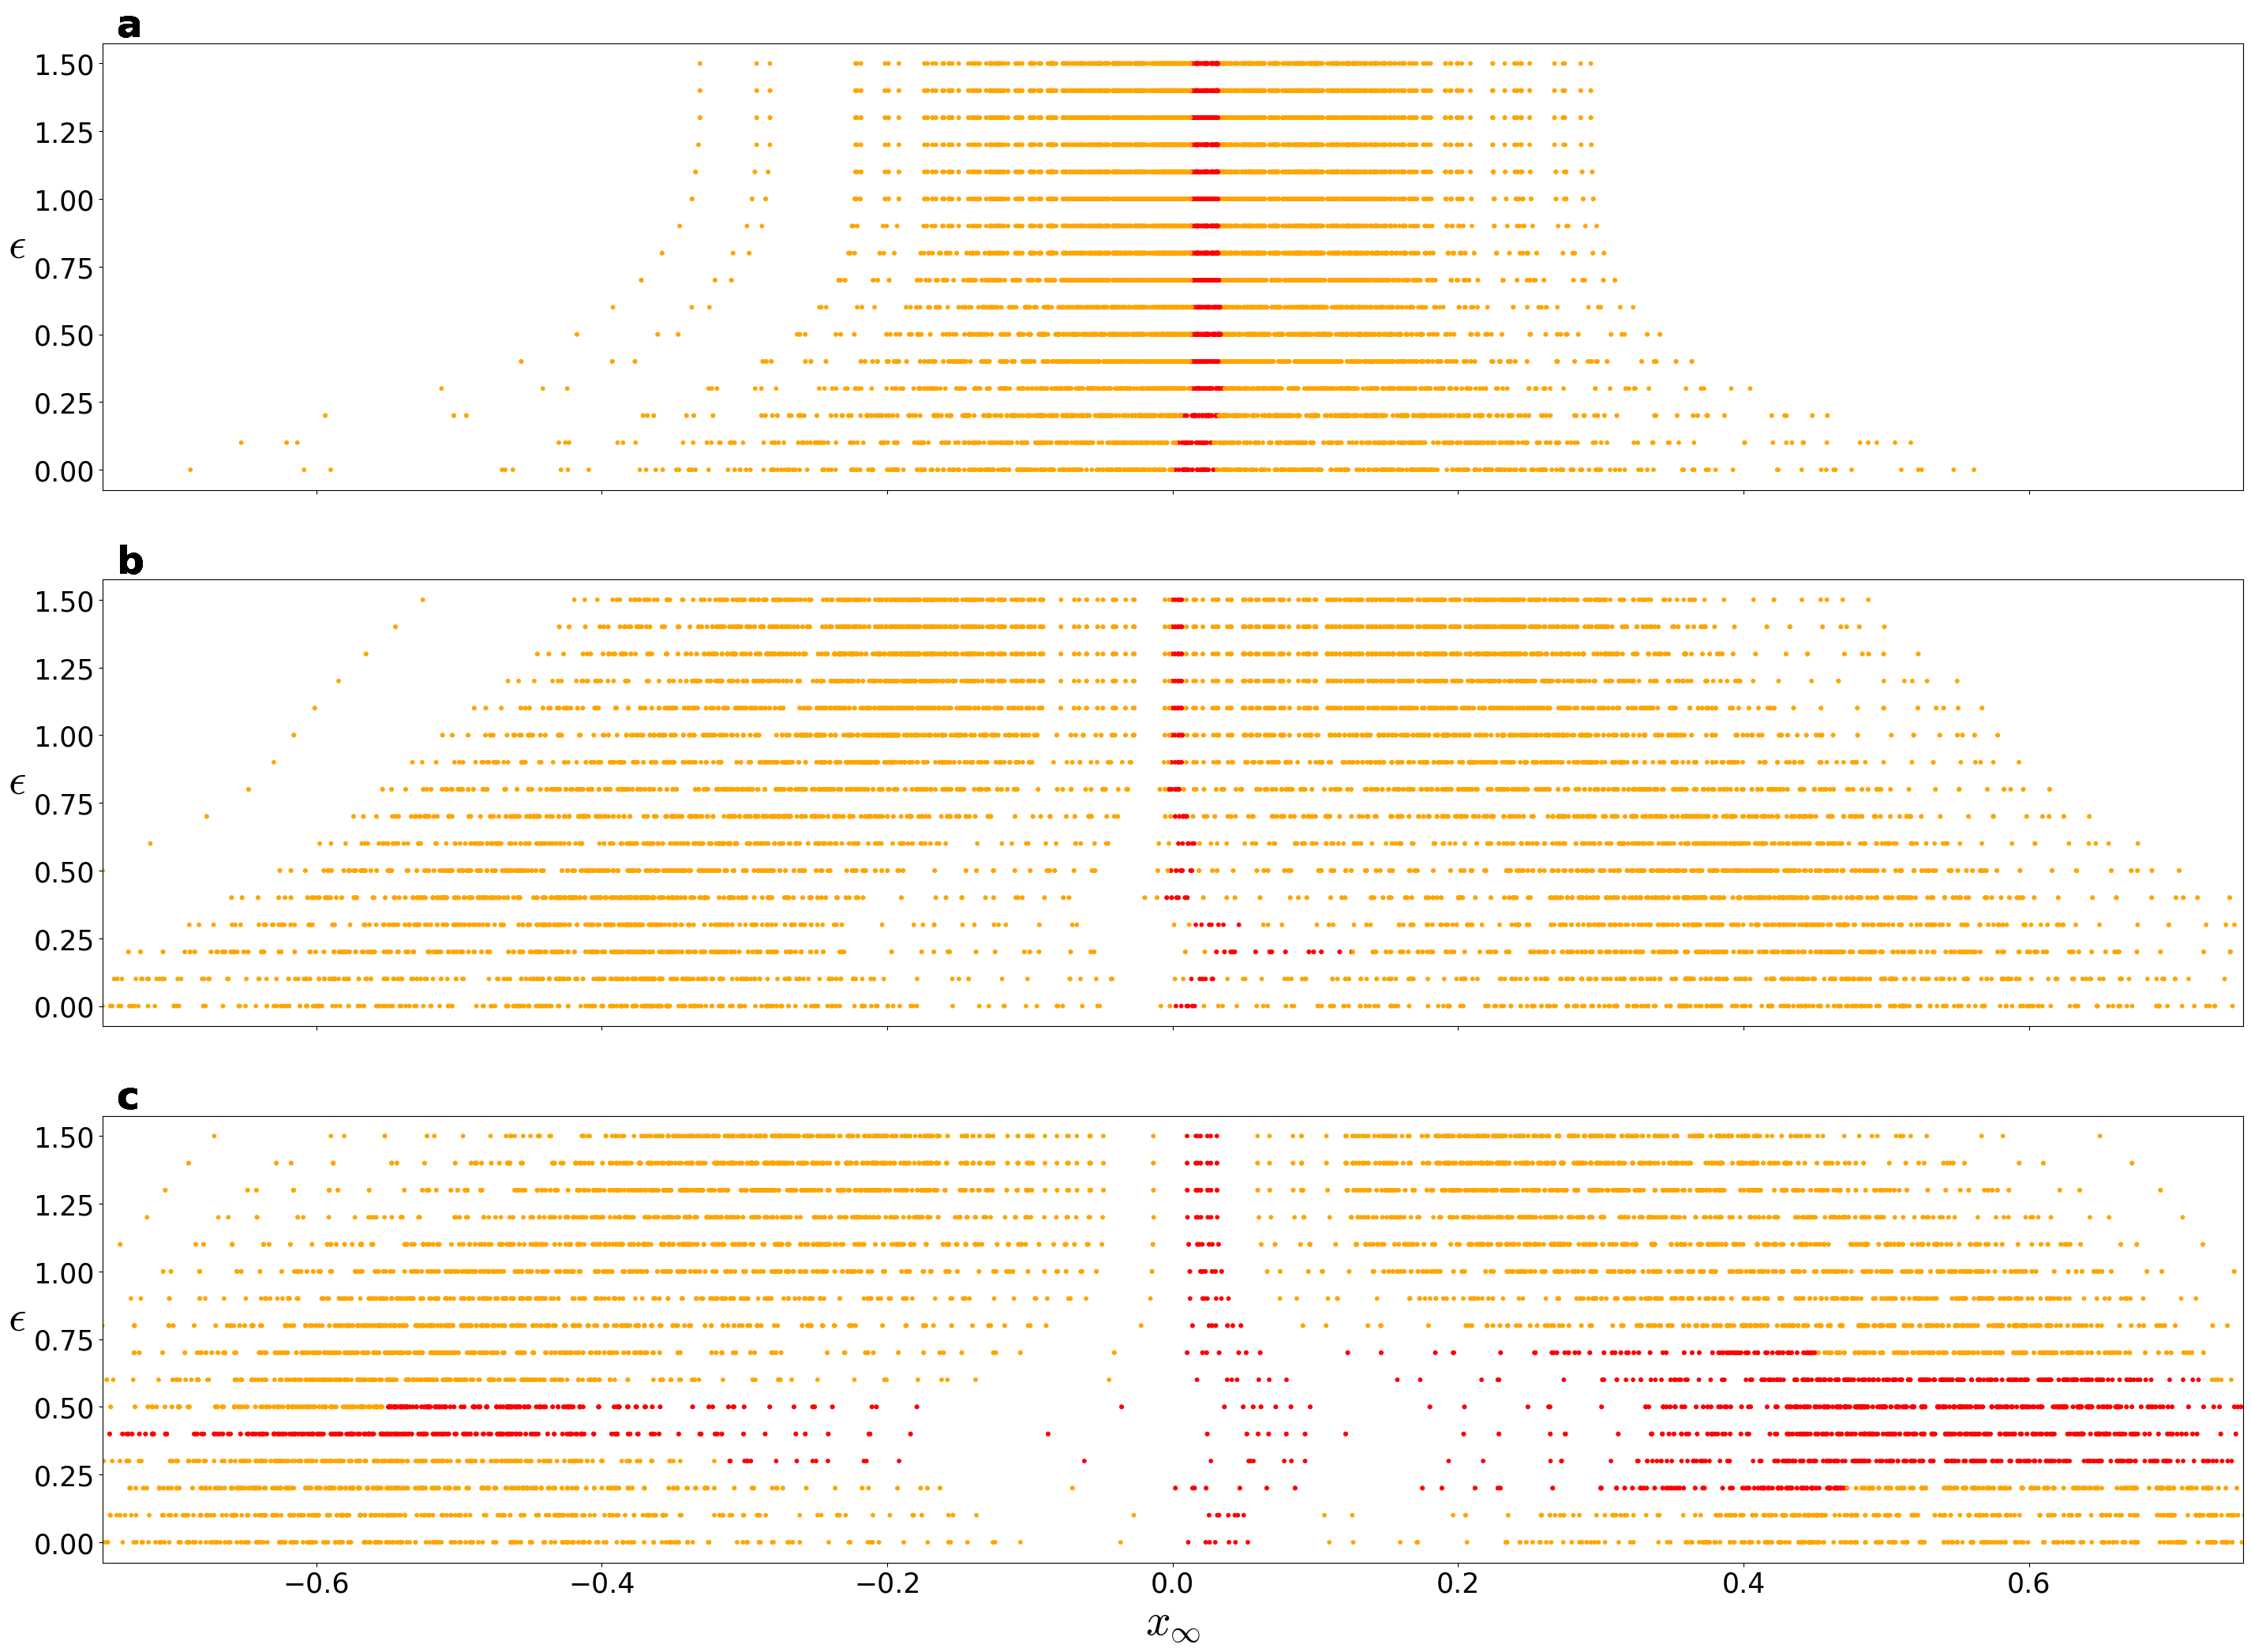

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 25})

fig,axes=plt.subplots(3,1,sharex='col',figsize=(35,25)) 

data=np.load(Main_path+'Delta_Variation/small_delta.npz',allow_pickle=True)
x_final=data['x_final']
e_range=data['e_range']
Agents_influenced_order=data['Agents_influenced_order']
NUM_agents_influenced=data['NUM_agents_influenced']
Num_ppl=data['Num_ppl']
bi_mean=data['bi_mean']
x0=x_final[:,0]
for eps in range(len(e_range)):
    color=[]
    for num in range(len(x0)):
        color.append('orange')
        
    temp=Agents_influenced_order[:,eps]
    if NUM_agents_influenced[eps]<Num_ppl:
        max_color=NUM_agents_influenced[eps]
    else:
        max_color=Num_ppl
        
    for num_agent in range(int(max_color)):
        color[int(temp[num_agent])]='r'
    
    axes[0].scatter(x_final[:,eps], np.zeros((len(x0)))+e_range[eps],color=color,s=10)
    #axes[0].set_xlabel('$x_{\infty}$',fontsize='25')
    axes[0].set_ylabel('$\epsilon$',fontsize='40',rotation=0, labelpad=15)
    axes[0].set_xlim([-0.75,0.75])
    axes[0].text(0.01+axes[0].get_xlim()[0], 1.6, 'a', fontsize='35',weight="bold")

data=np.load(Main_path+'Delta_Variation/medium_delta.npz',allow_pickle=True)
x_final=data['x_final']
e_range=data['e_range']
Agents_influenced_order=data['Agents_influenced_order']
NUM_agents_influenced=data['NUM_agents_influenced']
Num_ppl=data['Num_ppl']
bi_mean=data['bi_mean']
x0=x_final[:,0]
for eps in range(len(e_range)):
    color=[]
    for num in range(len(x0)):
        color.append('orange')
        
    temp=Agents_influenced_order[:,eps]
    if NUM_agents_influenced[eps]<Num_ppl:
        max_color=NUM_agents_influenced[eps]
    else:
        max_color=Num_ppl
        
    for num_agent in range(int(max_color)):
        color[int(temp[num_agent])]='r'
    
    axes[1].scatter(x_final[:,eps], np.zeros((len(x0)))+e_range[eps],color=color,s=10)
    #axes[1].set_xlabel('$x_{\infty}$',fontsize='25')
    axes[1].set_ylabel('$\epsilon$',fontsize='40',rotation=0, labelpad=15)
    axes[1].set_xlim([-0.75,0.75])
    axes[1].text(0.01+axes[1].get_xlim()[0], 1.6, 'b', fontsize='35',weight="bold")
    
data=np.load(Main_path+'Delta_Variation/large_delta.npz',allow_pickle=True)
x_final=data['x_final']
e_range=data['e_range']
Agents_influenced_order=data['Agents_influenced_order']
NUM_agents_influenced=data['NUM_agents_influenced']
Num_ppl=data['Num_ppl']
bi_mean=data['bi_mean']
x0=x_final[:,0]
for eps in range(len(e_range)):
    color=[]
    for num in range(len(x0)):
        color.append('orange')
        
    temp=Agents_influenced_order[:,eps]
    if NUM_agents_influenced[eps]<Num_ppl:
        max_color=NUM_agents_influenced[eps]
    else:
        max_color=Num_ppl
        
    for num_agent in range(int(max_color)):
        color[int(temp[num_agent])]='r'
    
    axes[2].scatter(x_final[:,eps], np.zeros((len(x0)))+e_range[eps],color=color,s=10)
    axes[2].set_xlabel('$x_{\infty}$',fontsize='40')
    axes[2].set_ylabel('$\epsilon$',fontsize='40',rotation=0, labelpad=15)
    axes[2].set_xlim([-0.75, 0.75])
    axes[2].text(0.01+axes[2].get_xlim()[0], 1.6, 'c', fontsize='35',weight="bold")

#plt.savefig('/home/glory/Documents/Thesis_Fig/Simulation_plot_delta.pdf',bbox_inches='tight')

Text(0, 0.5, '$\\xi_{rand}$ [%]')

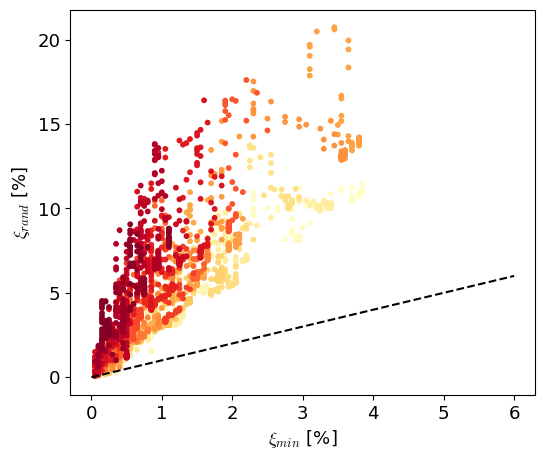

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

data=np.load(Main_path+'VAR_FILES_RAND/Polarization_delta.npz')

Num_ppl=data['Num_ppl']
e_range=data['e_range']
DELTA_vals=data['DELTA_vals']
MEAN_vals=data['MEAN_vals']
NUM_AGENTS_INFLUENCED=((data['EFFORT']*10)/2001)*100
NUM_AGENTS_INFLUENCED_RAND=((data['EFFORT_RAND']*10)/2001)*100
Tot_num=len(DELTA_vals)*len(MEAN_vals)*1*len(e_range)

Minimum=np.zeros((Tot_num))
Random=np.zeros((Tot_num))

pos=0
for num_delta in range(61):
    for num_mean in range(len(MEAN_vals)):
        for num_sim in range(1):
            for num_eps in range(len(e_range)):
                Minimum[pos]=NUM_AGENTS_INFLUENCED[num_delta, num_mean, num_sim, num_eps]
                Random[pos]=NUM_AGENTS_INFLUENCED_RAND[num_delta, num_mean, num_sim, num_eps]
                pos+=1

color=plt.get_cmap('YlOrRd', Tot_num)
plt.figure(figsize=(6,5))
plt.plot(np.arange(0,7,1), np.arange(0,7,1), '--', color='k')
plt.scatter(Minimum, Random, s=10,c=np.arange(Tot_num), cmap='YlOrRd')
plt.xlabel('$\\xi_{min}$ [%]')
plt.ylabel('$\\xi_{rand}$ [%]')

#plt.savefig('/home/glory/Documents/Thesis_Fig/Min_Rand.pdf', bbox_inches='tight')                

Text(0, 0.5, '$\\xi_{ppl}$ [%]')

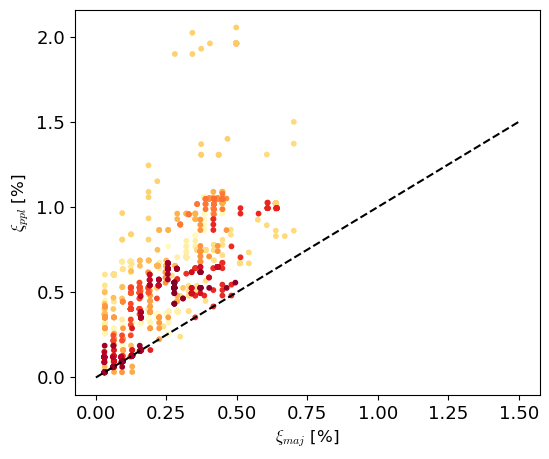

In [14]:

data=np.load(Main_path+'OD1/Comp_polarization_0.0.npz')

E_MM=data['PE_MM']
E_MP=data['PE_MP']
delta=data['delta']
e_range=data['e_range']
Tot_num=len(e_range)*len(delta)*10
color=plt.get_cmap('YlOrRd', Tot_num)

Min_maj=np.zeros((Tot_num))
Min_ppl=np.zeros((Tot_num))

pos=0
for num_delta in range(len(delta)):
    for num_sim in range(10):
        for num_eps in range(len(e_range)):
            Min_maj[pos]=E_MM[num_delta, num_sim, num_eps]
            Min_ppl[pos]=E_MP[num_delta, num_sim, num_eps]
            pos+=1

plt.figure(figsize=(6,5))
plt.scatter(Min_maj, Min_ppl, s=10,c=np.arange(Tot_num), cmap='YlOrRd')

x=np.linspace(0,1.5,20)
plt.plot(x,x,'--', color='k')

plt.xlabel('$\\xi_{maj}$ [%]',fontsize=12)
plt.ylabel('$\\xi_{ppl}$ [%]',fontsize=12)

#plt.savefig('/home/glory/Documents/Thesis_Fig/Maj_ppl.pdf', bbox_inches='tight')                

# Multiple Electoral Units on Bipartite System

## Aim:
<font size = "3">To evaluate the robustness of multiple electoral unit

## How:
<font size = "3">We have considered 15 synthetic countries with an average number of 9 seats per electoral unit with 16 to 20 states.

<font size = "3">The maximum difference in votes between any two parties is 10%.
     

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 18})

NP_district=101

data=np.load(Main_path+'Multi_States/Initial_considerations.npz', allow_pickle=True)
NUM_STATES=data['NUM_STATES']
NUM_SEATS_PER_STATE=data['NUM_SEATS_PER_STATE']
Num_simulation=data['Num_simulation']
Num_type=3

data=np.load(Main_path+'US/Assumptions.npz')
e_range=data['e_range']
neps=len(e_range)
EFF_SR=np.zeros((len(NUM_STATES),Num_type,Num_simulation,neps))
EFF_PR=np.zeros((len(NUM_STATES),Num_type,Num_simulation,neps))
EFF_WTAR=np.zeros((len(NUM_STATES),Num_type,Num_simulation,neps))

NEFF_SR=np.zeros((len(NUM_STATES),Num_type,Num_simulation,neps))
NEFF_PR=np.zeros((len(NUM_STATES),Num_type,Num_simulation,neps))
NEFF_WTAR=np.zeros((len(NUM_STATES),Num_type,Num_simulation,neps))

PEFF_SR=np.zeros((len(NUM_STATES),Num_type,Num_simulation,neps))
PEFF_PR=np.zeros((len(NUM_STATES),Num_type,Num_simulation,neps))
PEFF_WTAR=np.zeros((len(NUM_STATES),Num_type,Num_simulation,neps))

P_SR=np.zeros((len(NUM_STATES)*Num_simulation,Num_type,neps))
P_PR=np.zeros((len(NUM_STATES)*Num_simulation,Num_type,neps))
P_WTAR=np.zeros((len(NUM_STATES)*Num_simulation,Num_type,neps))


AGENTS=[]
Agents_distribution=[]

for N_S in range(len(NUM_STATES)):
    Num_districts_per_state=NUM_SEATS_PER_STATE[N_S]
    Agents=Num_districts_per_state*NP_district
    Agents[Agents%2==0]+=1
    Agents_distribution.append(Agents)
    Total_agents=np.sum(Agents)
    AGENTS.append(Total_agents)

for N_S in range(len(NUM_STATES)):
    Num_states=NUM_STATES[N_S]
    Num_districts_perstate=NUM_SEATS_PER_STATE[N_S]
    Num_districts=np.sum(Num_districts_perstate).astype('int')
    Agents=Num_districts_perstate*NP_district
    Agents[Agents%2==0]+=1
    Proportion=(Num_districts_perstate/Agents) 
    
    for num_type in range(Num_type):
        data=np.load(Main_path+'US/RealDout_'+str(num_type+1)+'_robustness_'+str(N_S)+'.npz')
        EFF_SR[N_S,num_type]=data['E_SR']
        EFF_PR[N_S,num_type]=data['E_PR']
        EFF_WTAR[N_S,num_type]=data['E_WTAR']
        
        NEFF_SR[N_S,num_type]=(data['E_SR']*0.1)/AGENTS[N_S]
        NEFF_PR[N_S,num_type]=(data['E_PR']*0.1)/AGENTS[N_S]
        NEFF_WTAR[N_S,num_type]=(data['E_WTAR']*0.1)/AGENTS[N_S]
        
        PEFF_SR[N_S,num_type]=(data['E_SR']/AGENTS[N_S])*100
        PEFF_PR[N_S,num_type]=(data['E_PR']/AGENTS[N_S])*100
        PEFF_WTAR[N_S,num_type]=(data['E_WTAR']/AGENTS[N_S])*100
        
        P_SR[N_S*Num_simulation:N_S*Num_simulation+Num_simulation,num_type]=(data['E_SR']/AGENTS[N_S])*100
        P_PR[N_S*Num_simulation:N_S*Num_simulation+Num_simulation,num_type]=(data['E_PR']/AGENTS[N_S])*100
        P_WTAR[N_S*Num_simulation:N_S*Num_simulation+Num_simulation,num_type]=(data['E_WTAR']/AGENTS[N_S])*100
        


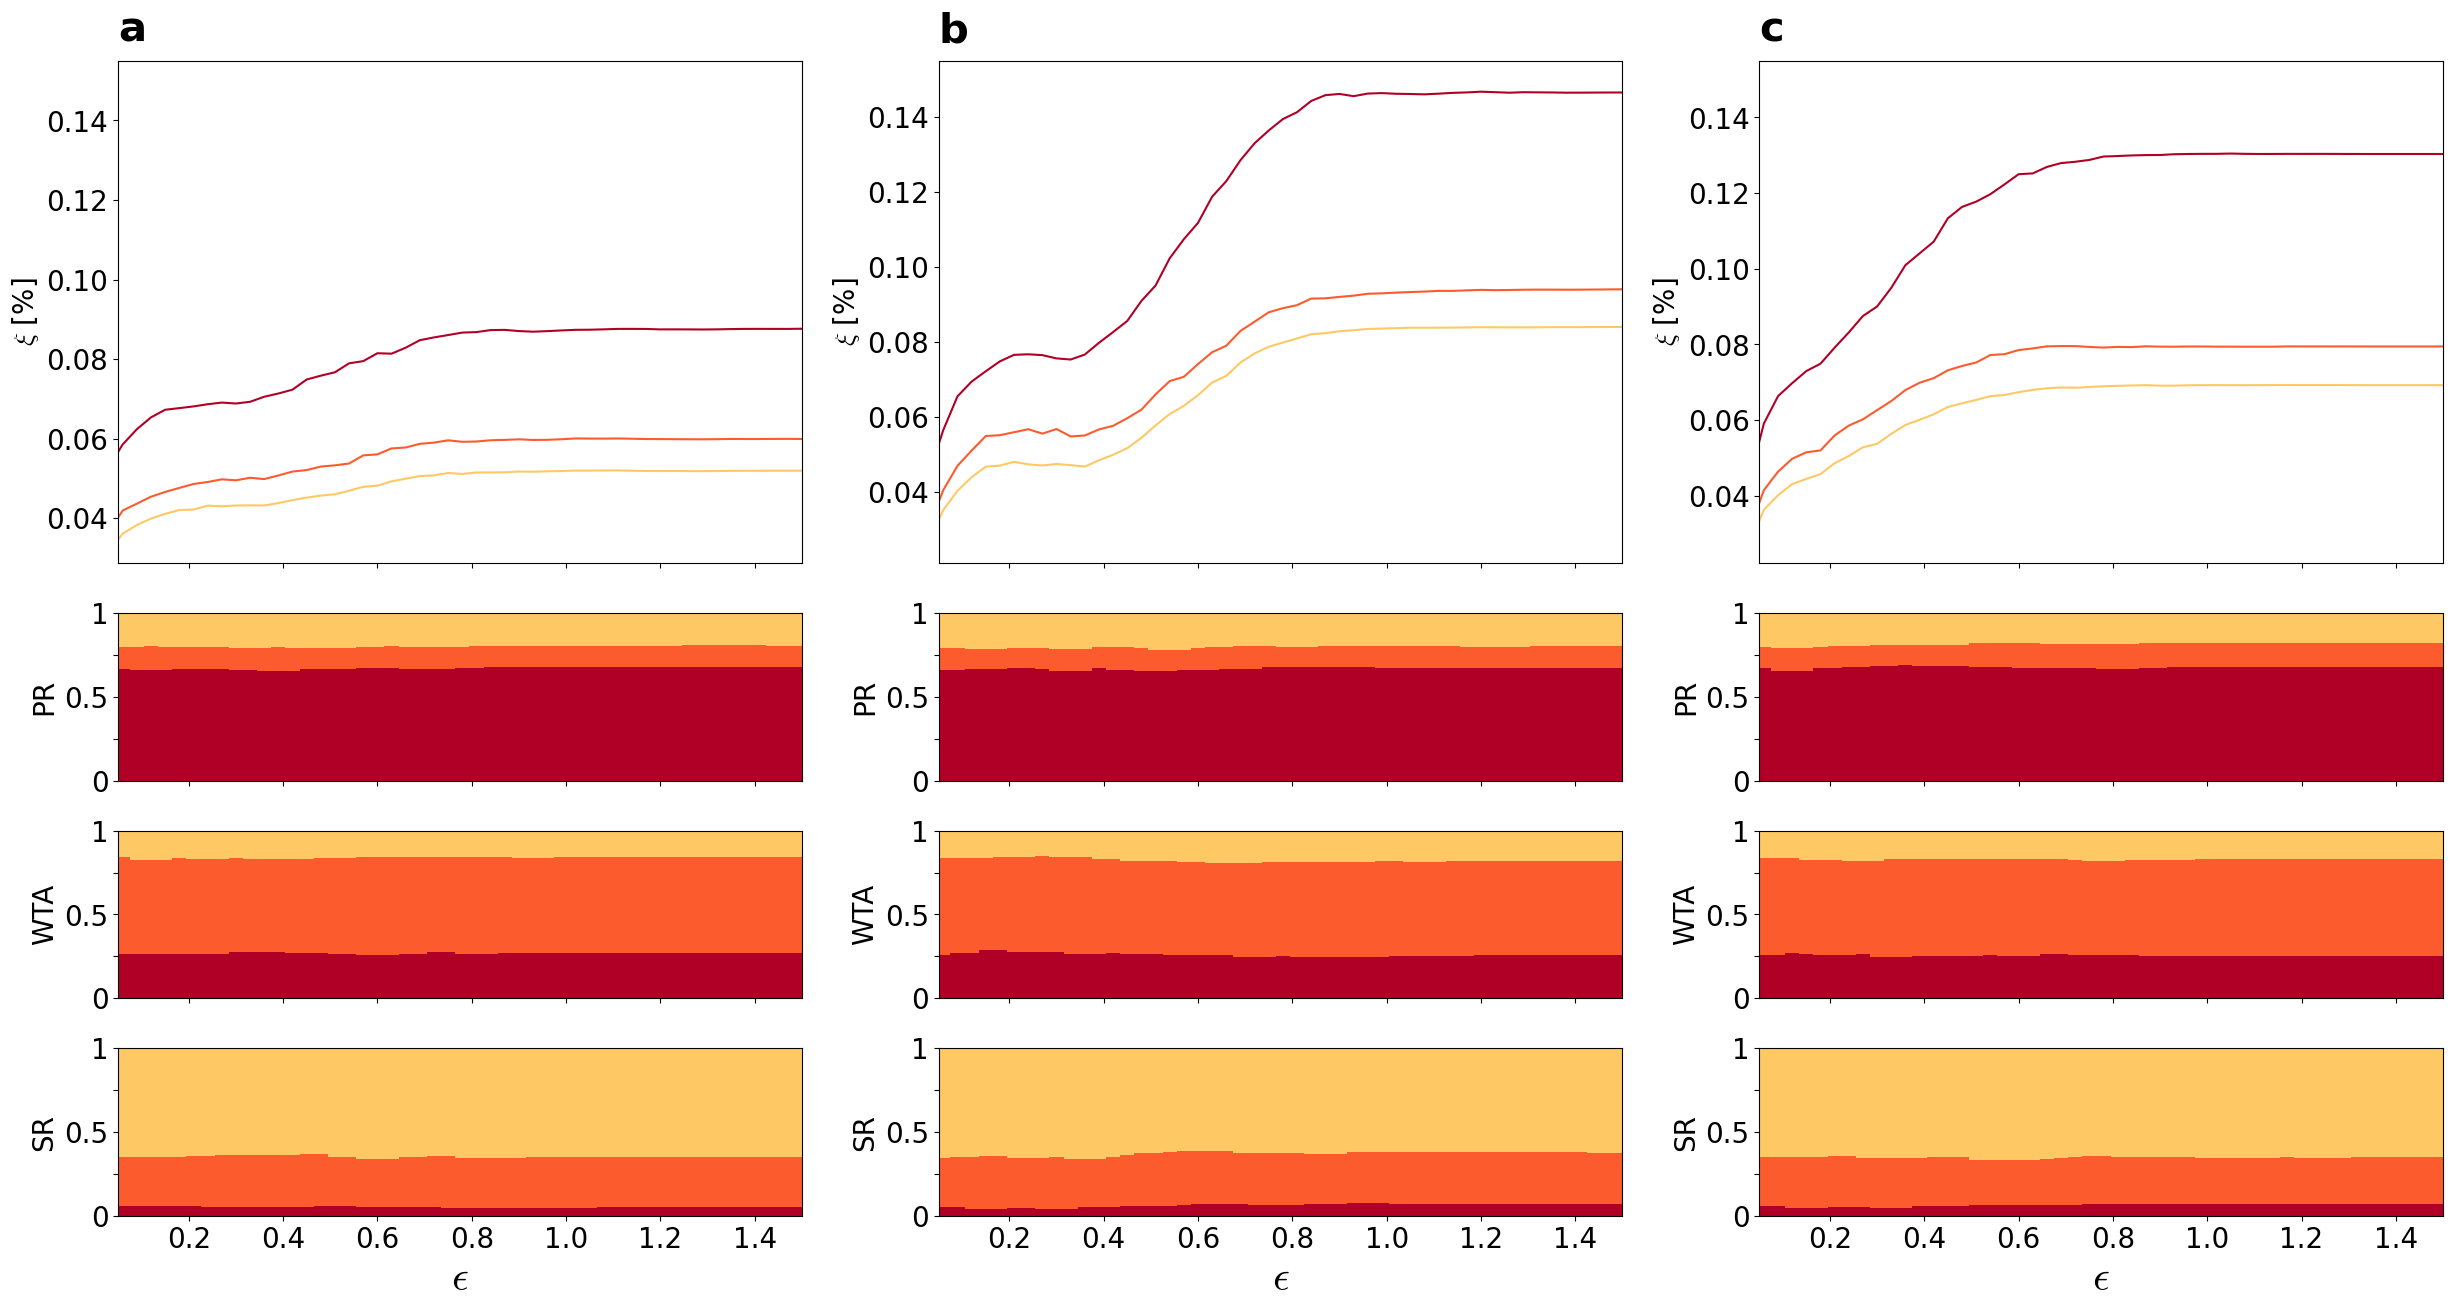

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 20})

width_stack_plot=0.09
fig, axes = plt.subplots(nrows=4, ncols=3, sharex='col',
                               gridspec_kw={'height_ratios': [3, 1, 1, 1]},
                               figsize=(30, 15))
ABC=['a','b','c']

for num_type in range(Num_type):
    color=plt.get_cmap("YlOrRd",11)
    
    axes[0,num_type].plot(e_range,np.mean(np.mean(PEFF_PR,axis=2),axis=0)[num_type],color=color(9))
    axes[0,num_type].plot(e_range,np.mean(np.mean(PEFF_WTAR,axis=2),axis=0)[num_type],color=color(6))
    axes[0,num_type].plot(e_range,np.mean(np.mean(PEFF_SR,axis=2),axis=0)[num_type],color=color(3))
    axes[0,num_type].set_ylabel('$\\xi$ [%]')
    axes[0,num_type].set_ylim(top=0.155)
    axes[0,num_type].set_xlim([0.05,1.5])
    #axes[0,num_type].tick_params(axis='both',labelsize=13)
    axes[0,num_type].text(0.05,0.005+max(axes[0,num_type].get_ylim()),ABC[num_type],fontsize='30',weight='bold')
    ELEC_SYS=np.zeros((3,1500,len(e_range)))

    ELEC_SYS[0]=P_PR[:,num_type,:]
    ELEC_SYS[1]=P_WTAR[:,num_type,:]
    ELEC_SYS[2]=P_SR[:,num_type,:]
    
    num=0
    pr1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/1500
    pr2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/1500
    pr3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/1500

    num=1
    wtar1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/1500
    wtar2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/1500
    wtar3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/1500

    num=2
    sr1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/1500
    sr2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/1500
    sr3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/1500


    bottom=0
    axes[1,num_type].bar(e_range, pr1, width=width_stack_plot,color=color(9))
    bottom=bottom+pr1
    axes[1,num_type].bar(e_range, pr2, width=width_stack_plot,bottom=bottom,color=color(6))
    bottom=bottom+pr2
    axes[1,num_type].bar(e_range, pr3, width=width_stack_plot,bottom=bottom,color=color(3))
    axes[1,num_type].set_ylabel('PR')
    axes[1,num_type].set_yticks(np.linspace(0,1,5))
    axes[1,num_type].set_yticklabels(['0','','0.5','','1'])
    axes[1,num_type].set_xlim([0.05,1.5])
    #axes[1,num_type].tick_params(axis='both',labelsize=13)
    axes[1,num_type].set_ylim([0,1])
    
    bottom=0
    axes[2,num_type].bar(e_range, wtar1, width=width_stack_plot,color=color(9))
    bottom=bottom+wtar1
    axes[2,num_type].bar(e_range, wtar2, width=width_stack_plot,bottom=bottom,color=color(6))
    bottom=bottom+wtar2
    axes[2,num_type].bar(e_range, wtar3, width=width_stack_plot,bottom=bottom,color=color(3))
    axes[2,num_type].set_ylabel('WTA')
    axes[2,num_type].set_yticks(np.linspace(0,1,5))
    axes[2,num_type].set_yticklabels(['0','','0.5','','1'])
    axes[2,num_type].set_xlim([0.05,1.5])
    #axes[2,num_type].tick_params(axis='both',labelsize=13)
    axes[2,num_type].set_ylim([0,1])
    
    bottom=0
    axes[3,num_type].bar(e_range, sr1, width=width_stack_plot,color=color(9))
    bottom=bottom+sr1
    axes[3,num_type].bar(e_range, sr2, width=width_stack_plot,bottom=bottom,color=color(6))
    bottom=bottom+sr2
    axes[3,num_type].bar(e_range, sr3, width=width_stack_plot,bottom=bottom,color=color(3))
    axes[3,num_type].set_ylabel('SR')
    axes[3,num_type].set_yticks(np.linspace(0,1,5))
    axes[3,num_type].set_yticklabels(['0','','0.5','','1'])
    axes[3,num_type].set_xlim([0.05,1.5])
    #axes[3,num_type].tick_params(axis='both',labelsize=13)
    axes[3,num_type].set_ylim([0,1])
    axes[3,num_type].set_xlabel('$\epsilon$',fontsize=30)
    
#plt.savefig('/home/glory/Dropbox/Apps/Overleaf/PhD_thesis_1/Figures/'+'Robustness_general_biparty.pdf', bbox_inches='tight')    

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 20})

Num_type=3
Num_years=5

data=np.load(Main_path+'US/Assumptions.npz')
e_range=data['e_range']
neps=len(e_range)
Num_simulation=data['Number_of_simulation']

SR=np.zeros((Num_years,Num_type,Num_simulation, neps))
PR=np.zeros((Num_years,Num_type,Num_simulation, neps))
WTAR=np.zeros((Num_years,Num_type,Num_simulation, neps))

P_SR=np.zeros((Num_years*Num_simulation,Num_type,neps))
P_PR=np.zeros((Num_years*Num_simulation,Num_type,neps))
P_WTAR=np.zeros((Num_years*Num_simulation,Num_type,neps))

N=43960

for num_type in range(Num_type):
    year=2012
    for num_year in range(Num_years):
        year=int(2012+num_year*2)
        data=np.load(Main_path+'US/RealDout_'+str(num_type+1)+'_robustness_'+str(year)+'.npz',allow_pickle=False)
        SR[num_year,num_type]=(data['E_SR']/N)*100
        PR[num_year,num_type]=(data['E_PR']/N)*100
        WTAR[num_year,num_type]=(data['E_WTAR']/N)*100
        
        P_SR[num_year*Num_simulation:num_year*Num_simulation+Num_simulation, num_type]=(data['E_SR']/N)*100
        P_PR[num_year*Num_simulation:num_year*Num_simulation+Num_simulation, num_type]=(data['E_PR']/N)*100
        P_WTAR[num_year*Num_simulation:num_year*Num_simulation+Num_simulation, num_type]=(data['E_WTAR']/N)*100
        
        
        
        

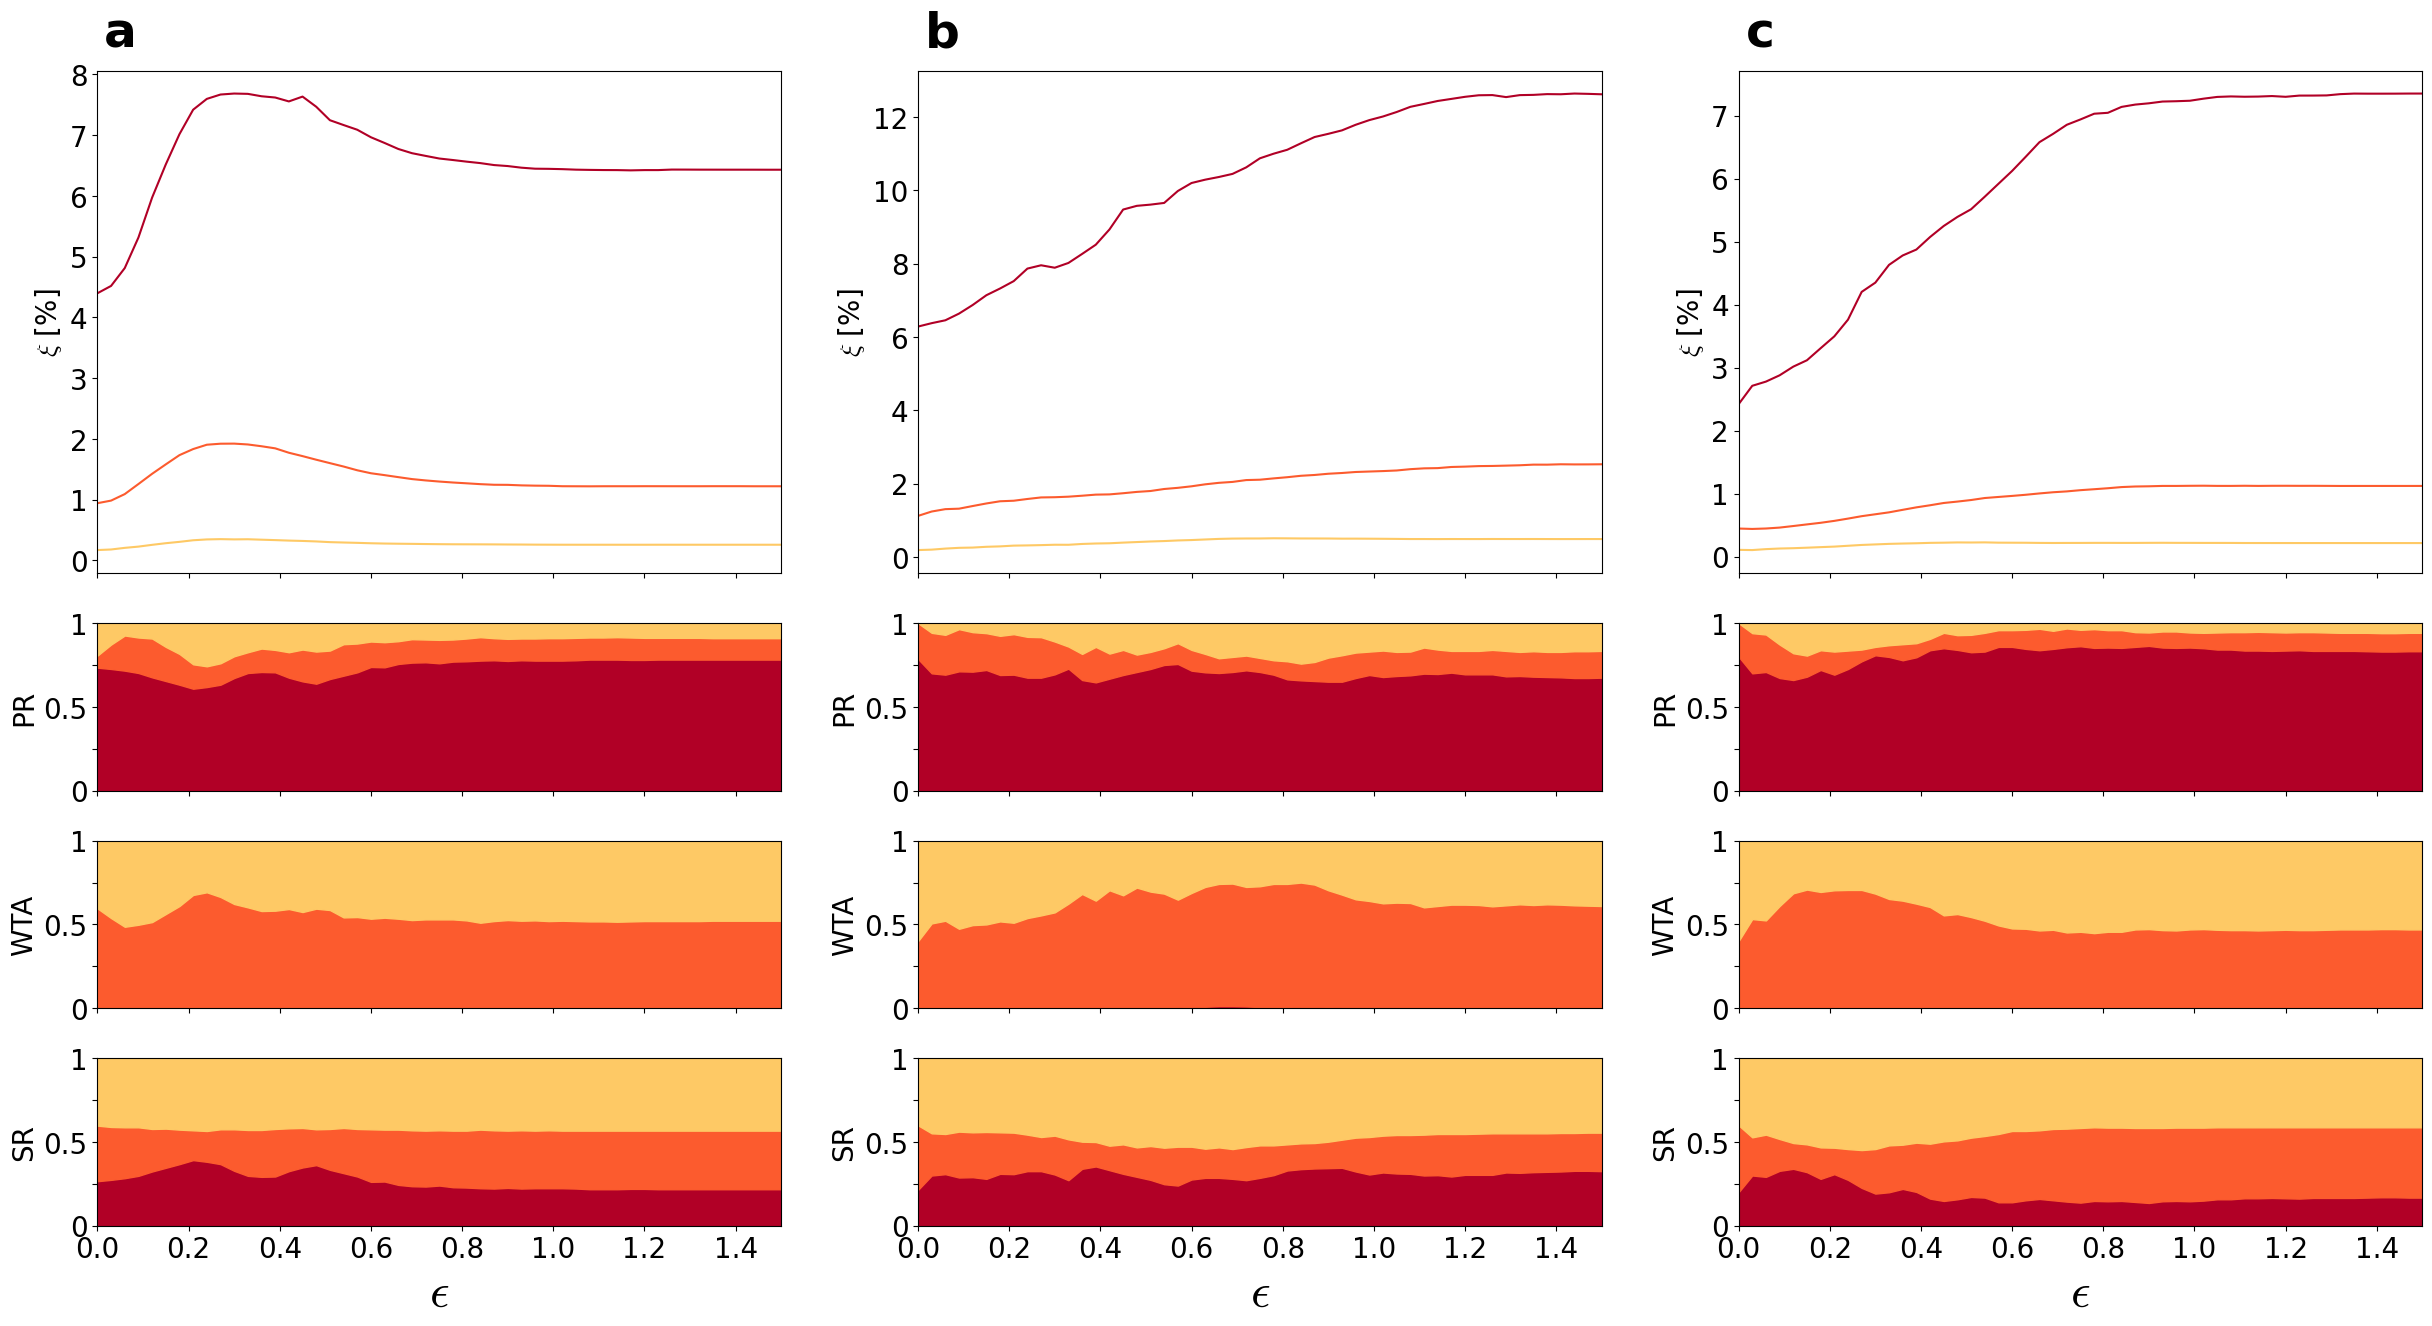

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 20})

width_stack_plot=0.09
fig, axes = plt.subplots(nrows=4, ncols=3, sharex='col',
                               gridspec_kw={'height_ratios': [3, 1, 1, 1]},
                               figsize=(30, 15))
ABC=['a','b','c']
for num_type in range(Num_type):
    color=plt.get_cmap("YlOrRd",11)
    
    axes[0,num_type].plot(e_range,np.mean(np.mean(PR,axis=2),axis=0)[num_type],color=color(9))
    axes[0,num_type].plot(e_range,np.mean(np.mean(WTAR,axis=2),axis=0)[num_type],color=color(6))
    axes[0,num_type].plot(e_range,np.mean(np.mean(SR,axis=2),axis=0)[num_type],color=color(3))
    axes[0,num_type].set_ylabel('$\\xi$ [%]')
    #axes[0,num_type].tick_params(axis='both',labelsize=12)
    #axes[0,num_type].set_ylim(top=0.14)
    axes[0,num_type].set_xlim([0.0,1.5])
    axes[0,num_type].text(0.015,max(axes[0,num_type].get_ylim())+0.05*max(axes[0,num_type].get_ylim()),ABC[num_type],fontsize='35',weight='bold')
    
    ELEC_SYS=np.zeros((3,500,len(e_range)))

    ELEC_SYS[0]=P_PR[:,num_type,:]
    ELEC_SYS[1]=P_WTAR[:,num_type,:]
    ELEC_SYS[2]=P_SR[:,num_type,:]
    
    num=0
    pr1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/500
    pr2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/500
    pr3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/500

    num=1
    wtar1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/500
    wtar2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/500
    wtar3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/500

    num=2
    sr1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/500
    sr2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/500
    sr3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/500


    bottom=0
    axes[1,num_type].fill_between(e_range, pr1,color=color(9))
    bottom=bottom+pr1
    axes[1,num_type].fill_between(e_range, bottom, bottom+pr2,color=color(6))
    bottom=bottom+pr2
    axes[1,num_type].fill_between(e_range, bottom, bottom+pr3, color=color(3))
    axes[1,num_type].set_ylabel('PR')
    axes[1,num_type].set_yticks(np.linspace(0,1,5))
    axes[1,num_type].set_yticklabels(['0','','0.5','','1'])
    axes[1,num_type].set_xlim([0.0,1.5])
    #axes[1,num_type].tick_params(axis='both',labelsize=13)
    axes[1,num_type].set_ylim([0,1])
    
    bottom=0
    axes[2,num_type].fill_between(e_range, wtar1, color=color(9))
    bottom=bottom+wtar1
    axes[2,num_type].fill_between(e_range, bottom, bottom+wtar2, color=color(6))
    bottom=bottom+wtar2
    axes[2,num_type].fill_between(e_range, bottom, bottom+wtar3,color=color(3))
    axes[2,num_type].set_ylabel('WTA')
    axes[2,num_type].set_yticks(np.linspace(0,1,5))
    axes[2,num_type].set_yticklabels(['0','','0.5','','1'])
    axes[2,num_type].set_xlim([0.0,1.5])
    #axes[2,num_type].set_xlim([0,1.25])
    axes[2,num_type].set_ylim([0,1])
    
    bottom=0
    axes[3,num_type].fill_between(e_range, sr1,color=color(9))
    bottom=bottom+sr1
    axes[3,num_type].fill_between(e_range,bottom, bottom+ sr2,color=color(6))
    bottom=bottom+sr2
    axes[3,num_type].fill_between(e_range, bottom, bottom+sr3,color=color(3))
    axes[3,num_type].set_ylabel('SR')
    #axes[3,num_type].set_xlim([0,1.25])
    axes[3,num_type].set_yticks(np.linspace(0,1,5))
    axes[3,num_type].set_yticklabels(['0','','0.5','','1'])
    #axes[3,num_type].tick_params(axis='both',labelsize=13)
    axes[3,num_type].set_ylim([0,1])
    axes[3,num_type].set_xlim([0.0,1.5])
    axes[3,num_type].set_xlabel('$\epsilon$',fontsize=35)

#plt.savefig( '/home/glory/Dropbox/Apps/Overleaf/PhD_thesis_1/Figures/'+'Robustness_US_biparty.pdf', bbox_inches='tight')        

# Multi-party system: Single electoral unit

1. Evaluating the system with just ordering (left-right political spectrum)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"

In [20]:
def load_fun(Num_party):
    
    Num_simulation=1000
    neps=201

    Total_agents=2001

    EFFORT=np.zeros((Num_simulation, neps, Num_party-1))
    NUM_VOTES=np.zeros((Num_simulation,neps,Num_party))
    PP=np.zeros((neps,Num_party))
    NPP=np.zeros((neps,Num_party))
    PP_2=np.zeros((neps,Num_party))
    NPP_2=np.zeros((neps,Num_party))
    N_VOTES=np.zeros((Num_simulation,neps,Num_party))
    NUM_AGENTS_INFLUENCED=np.zeros((Num_simulation,neps,Num_party-1))
    
    E_POS=np.zeros((neps,Num_party))
    N_AG_POS=np.zeros((neps,Num_party))
    NE_POS=np.zeros((neps,Num_party))
    
    E_POS_grp=np.zeros((neps,int(np.ceil(Num_party/2))))
    N_AG_POS_grp=np.zeros((neps,int(np.ceil(Num_party/2))))
    NE_POS_grp=np.zeros((neps,int(np.ceil(Num_party/2))))
    
    #data=np.load(path+'M/Ord_all_with_eq_area_'+str(1)+'_'+str(Num_party)+'.npz')
    data=np.load(Main_path+'MULT_ORD/Multiparty_ordering_'+str(Num_party)+'.npz')
    e_range=data['e_range']

    eps_critical=0
    NUM_VOTES=data['NUM_VOTES']
    EFFORT=data['Effort']
    NUM_AGENTS_INFLUENCED=data['NUM_AGENTS_INFLUENCED']
    PP=((np.sum((np.argsort(data['NUM_VOTES']).argsort()==Num_party-1)*1,axis=0))/Num_simulation)*100 
    NPP=(np.sum((np.argsort(data['NUM_VOTES']).argsort()==Num_party-1)*1,axis=0))
    PP_2=((np.sum((np.argsort(data['NUM_VOTES']).argsort()==Num_party-2)*1,axis=0))/Num_simulation)*100 
    NPP_2=(np.sum((np.argsort(data['NUM_VOTES']).argsort()==Num_party-2)*1,axis=0))

    for num in range(Num_simulation):
        for eps in range(len(e_range)):
            Num_votes=NUM_VOTES[num,eps]
            WParg=np.argsort(Num_votes)
            party=Num_party-2
            winner=Num_party-1
            win=int(WParg[winner])
            N_VOTES[num,eps,0]=Num_votes[win]

            wp=int(WParg[party])
            E_POS[eps, wp]+=EFFORT[num,eps,0]
            N_AG_POS[eps, wp]+=NUM_AGENTS_INFLUENCED[num,eps,0]
            NE_POS[eps, wp]+=1
            
            for j in range(Num_party-1):  
                wp=int(WParg[party])
                N_VOTES[num,eps,j+1]=Num_votes[wp]
                party=party-1
                
    if Num_party%2==0:               
        for num_party in range(int(Num_party/2)):

            A=E_POS[:,num_party]+E_POS[:,Num_party-1-num_party]
            B=NE_POS[:,num_party]+NE_POS[:,Num_party-1-num_party]
            E_POS_grp[:,num_party][B!=0]=A[B!=0]/B[B!=0]
            
            A=N_AG_POS[:,num_party]+N_AG_POS[:,Num_party-1-num_party]
            B=N_AG_POS[:,num_party]+N_AG_POS[:,Num_party-1-num_party]
            N_AG_POS_grp[:,num_party][B!=0]=A[B!=0]/B[B!=0]

            NE_POS_grp[:,num_party]=NE_POS[:,num_party]+NE_POS[:,Num_party-1-num_party]
    else:
        for num_party in range(int(Num_party/2)):
            A=E_POS[:,num_party]+E_POS[:,Num_party-1-num_party]
            B=NE_POS[:,num_party]+NE_POS[:,Num_party-1-num_party]
            E_POS_grp[:,num_party][B!=0]=A[B!=0]/B[B!=0]
            
            A=N_AG_POS[:,num_party]+N_AG_POS[:,Num_party-1-num_party]
            B=N_AG_POS[:,num_party]+N_AG_POS[:,Num_party-1-num_party]
            N_AG_POS_grp[:,num_party][B!=0]=A[B!=0]/B[B!=0]

            NE_POS_grp[:,num_party]=NE_POS[:,num_party]+NE_POS[:,Num_party-1-num_party]
            
        num_party=int(Num_party/2)
        A=E_POS[:,num_party]
        B=NE_POS[:,num_party]
        E_POS_grp[:,num_party][B!=0]=A[B!=0]/B[B!=0] 

        A=N_AG_POS[:,num_party]
        B=N_AG_POS[:,num_party]
        N_AG_POS_grp[:,num_party][B!=0]=A[B!=0]/B[B!=0]      
        
        NE_POS_grp[:,num_party]=NE_POS[:,num_party]
    
    for num_party in range(Num_party):
        A=E_POS[:,num_party]
        B=NE_POS[:,num_party]
        E_POS[:,num_party][B!=0]=A[B!=0]/B[B!=0]  

        A=N_AG_POS[:,num_party]
        B=NE_POS[:,num_party]
        N_AG_POS[:,num_party][B!=0]=((A[B!=0]/B[B!=0])/Total_agents)*100
    
    for eps in range(len(e_range)):
        if NPP_2[eps,0]+NPP_2[eps,Num_party-1]==0:
            eps_critical=e_range[eps-1]    
            break
    
    return e_range,EFFORT, NUM_VOTES, PP, N_VOTES, PP_2, E_POS, NE_POS,eps_critical,E_POS_grp, N_AG_POS, NUM_AGENTS_INFLUENCED, N_AG_POS_grp, NE_POS_grp, Num_simulation, Total_agents

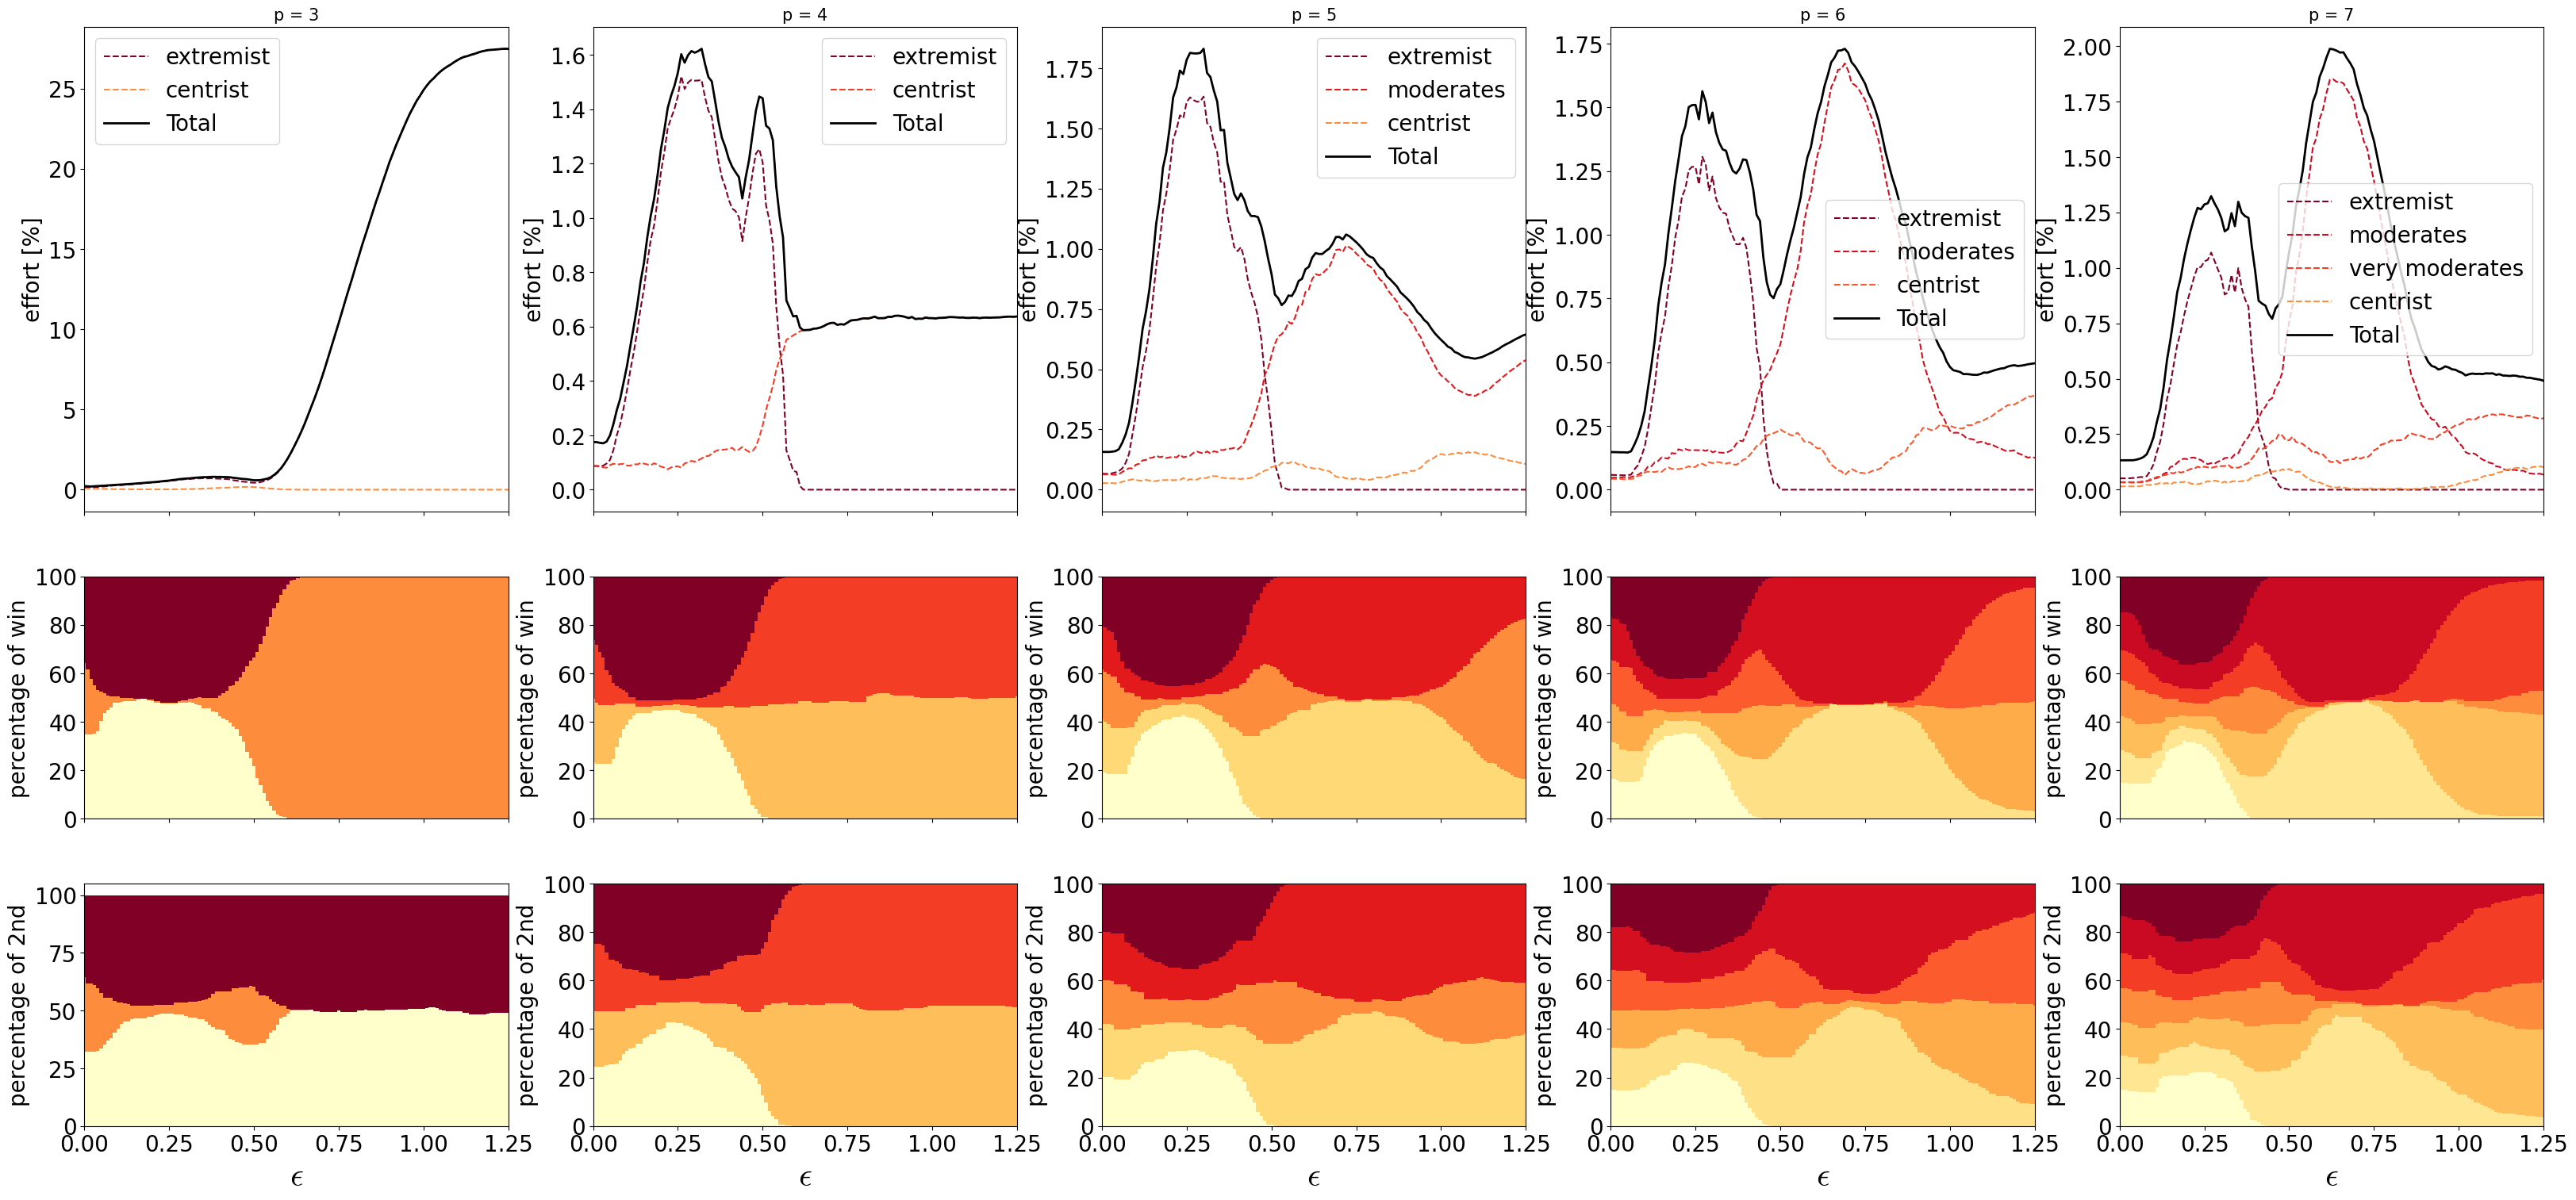

In [21]:

plt.rcParams.update({'font.size': 20})

NAMES=['extremist', 'moderates','very moderates', 'centrist']
Parties=np.array((3,4,5,6,7))

fig, axes = plt.subplots(nrows=3, ncols=5, sharex='col',
                               gridspec_kw={'height_ratios': [2, 1, 1]},
                               figsize=(40, 18))
pos=0

for num_par in range(len(Parties)):
    Num_party=Parties[num_par]
    width_stack_plot=0.05
    color=plt.get_cmap("YlOrRd",Num_party)
    
    e_range,EFFORT, NUM_VOTES, PP, N_VOTES, PP_2, E_POS, NE_POS,eps_critical, E_POS_grp, N_AG_POS, NUM_AGENTS_INFLUENCED, N_AG_POS_grp, NE_POS_grp, Num_simulation, Total_agents = load_fun(Num_party)
        
    NEW_NAME=[]
    for num_party in range(int(np.ceil(Num_party/2))-1):
        NEW_NAME.append(NAMES[num_party])
    NEW_NAME.append(NAMES[3])

    if Num_party%2==0:
        for num_party in range(int(Num_party/2)):
            y_vec=N_AG_POS[:,num_party]*(NE_POS[:,num_party]/Num_simulation)+N_AG_POS[:,Num_party-1-num_party]*(NE_POS[:,Num_party-1-num_party]/Num_simulation)
            axes[0,pos].plot(e_range,y_vec,linestyle='--',color=color(Num_party-1-num_party),label=NEW_NAME[num_party])
    else:
        for num_party in range(int(Num_party/2)):   
            y_vec=N_AG_POS[:,num_party]*(NE_POS[:,num_party]/Num_simulation)+N_AG_POS[:,Num_party-1-num_party]*(NE_POS[:,Num_party-1-num_party]/Num_simulation)
            axes[0,pos].plot(e_range,y_vec,linestyle='--',color=color(Num_party-1-num_party),label=NEW_NAME[num_party])
        y_vec=(N_AG_POS[:,int(Num_party/2)])*(NE_POS[:,int(Num_party/2)]/Num_simulation)
        axes[0,pos].plot(e_range,y_vec,linestyle='--',color=color(int(Num_party/2)),label= NEW_NAME[int(Num_party/2)])
    
    axes[0,pos].plot(e_range,100*(np.mean(NUM_AGENTS_INFLUENCED,axis=0)[:,0]/Total_agents),color='k',label='Total',linewidth=2)
    axes[0,pos].legend()
    axes[0,pos].set_xlim([0,1.25])
    axes[0,pos].set_title('p = '+str(Parties[num_par]),fontsize='15')
    axes[0,pos].set_ylabel('effort [%]')
    
    bottom=0
    axes[1,pos].bar(e_range,PP[:,0],width=width_stack_plot,label='P '+str(0),color=color(0))
    for num in range(Num_party-1):
        bottom=bottom+PP[:,num]
        axes[1,pos].bar(e_range,PP[:,num+1],width=width_stack_plot,bottom=bottom,label='P '+str(num+1),color=color(num+1))
    axes[1,pos].set_ylabel('percentage of win')
    axes[1,pos].set_xlim([0,1.25])
    
    bottom=0
    axes[2,pos].bar(e_range,PP_2[:,0],width=width_stack_plot,label='P '+str(0),color=color(0))
    for num in range(Num_party-1):
        bottom=bottom+PP_2[:,num]
        axes[2,pos].bar(e_range,PP_2[:,num+1],width=width_stack_plot,bottom=bottom,label='P '+str(num+1),color=color(num+1))
    axes[2,pos].set_ylabel('percentage of 2nd')
    axes[2,pos].set_xlim([0,1.25])
    axes[2,pos].set_xlabel('$\epsilon$',fontsize='30')
    
    pos+=1

Text(0.02, 105.0, 'e')

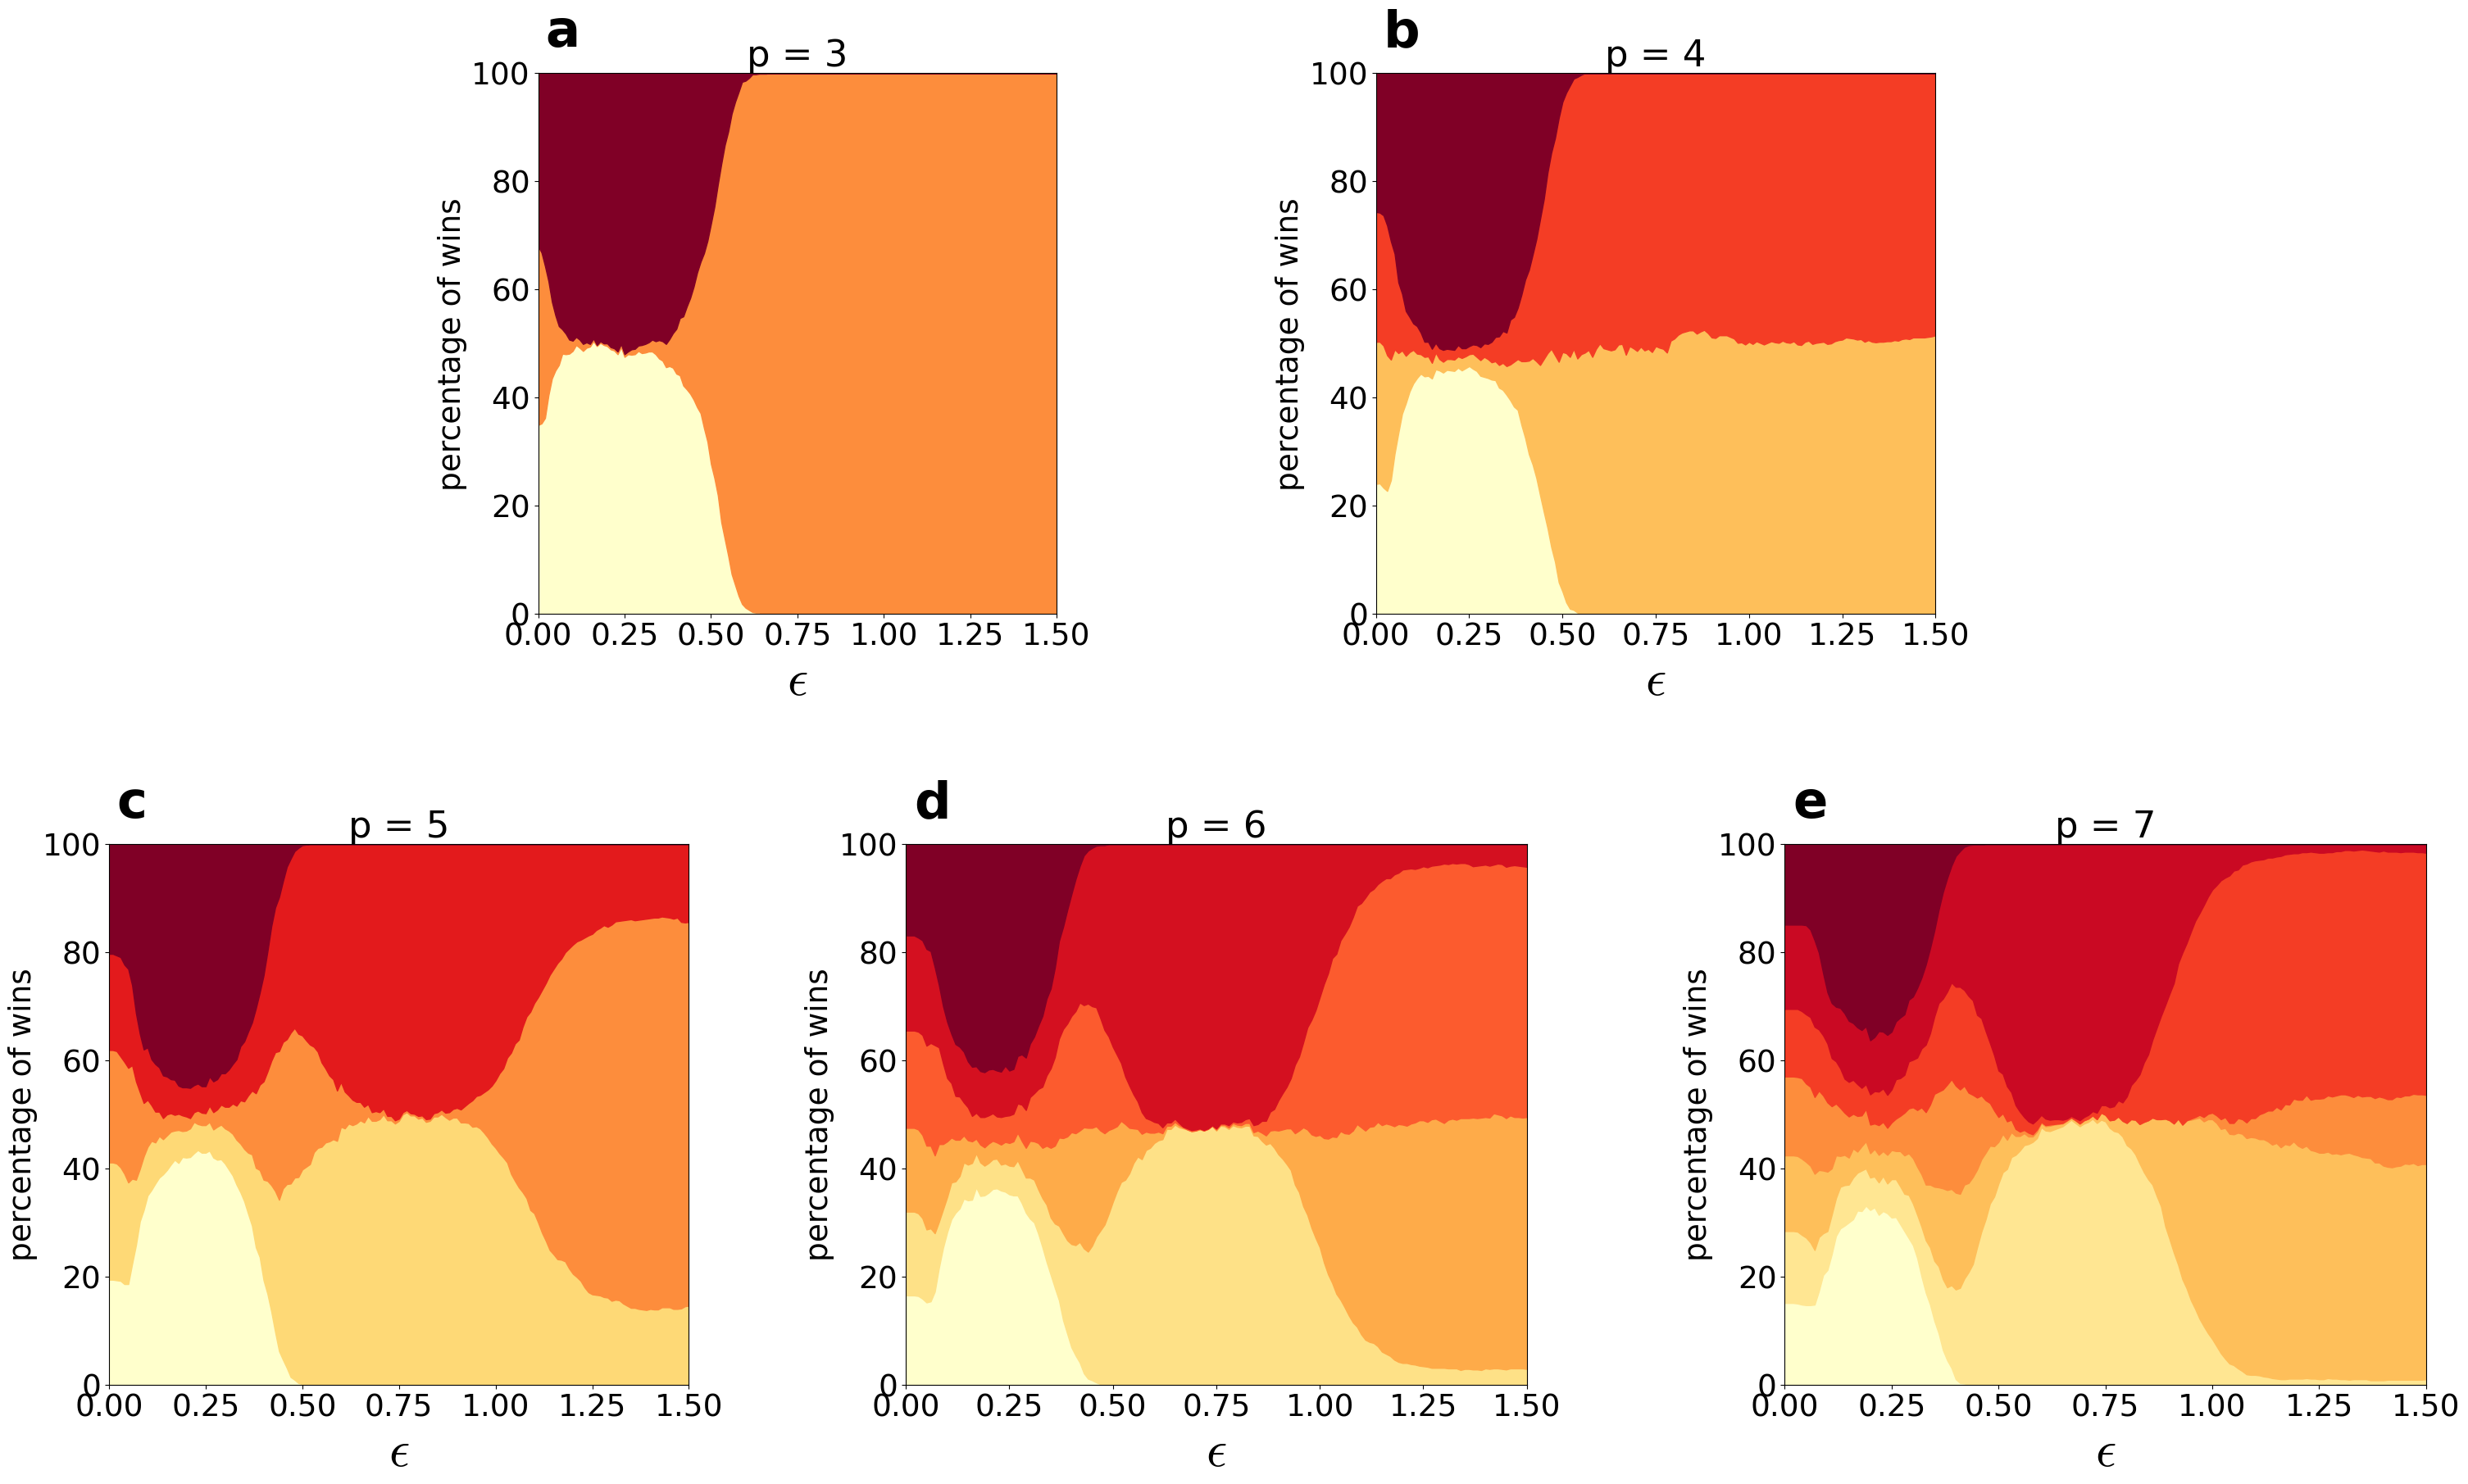

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 27})

NAMES=['extremist', 'moderates','very moderates', 'centrist']
Parties=np.array((3,4,5,6,7))
b_val=0
fig = plt.figure(figsize=(30,18),constrained_layout=True)

grid = fig.add_gridspec(ncols=6, nrows=2, wspace=0.1, hspace=0.1)
    
ax1=plt.subplot(grid[0, 1:3])
Num_party=3
color=plt.get_cmap("YlOrRd",Num_party)
e_range,EFFORT, NUM_VOTES, PP, N_VOTES, PP_2, E_POS, NE_POS,eps_critical, E_POS_grp, N_AG_POS, NUM_AGENTS_INFLUENCED, N_AG_POS_grp, NE_POS_grp, Num_simulation, Total_agents = load_fun(Num_party)
bottom=0
ax1.fill_between(e_range,PP[:,0],label='P '+str(0),color=color(0))
for num in range(Num_party-1):
    bottom=bottom+PP[:,num]
    ax1.fill_between(e_range,bottom, bottom+PP[:,num+1],label='P '+str(num+1),color=color(num+1))
ax1.set_ylabel('percentage of wins')
ax1.set_xlim([0,1.5])
ax1.set_ylim([0,100])
ax1.set_xticks(np.linspace(0,1.5,7))
ax1.set_title('p = '+str(Num_party))
ax1.set_xlabel('$\epsilon$',fontsize='45')
ax1.text(0.02, 0.05*max(ax1.get_ylim())+max(ax1.get_ylim()), 'a', weight='bold',fontsize='45')

ax2=plt.subplot(grid[0, 3:5])
Num_party=4
color=plt.get_cmap("YlOrRd",Num_party)
e_range,EFFORT, NUM_VOTES, PP, N_VOTES, PP_2, E_POS, NE_POS,eps_critical, E_POS_grp, N_AG_POS, NUM_AGENTS_INFLUENCED, N_AG_POS_grp, NE_POS_grp, Num_simulation, Total_agents = load_fun(Num_party)
bottom=0
ax2.fill_between(e_range,PP[:,0],label='P '+str(0),color=color(0))
for num in range(Num_party-1):
    bottom=bottom+PP[:,num]
    ax2.fill_between(e_range,bottom, bottom+PP[:,num+1],label='P '+str(num+1),color=color(num+1))
ax2.set_ylabel('percentage of wins')
ax2.set_xlim([0,1.5])
ax2.set_ylim([0,100])
ax2.set_xticks(np.linspace(0,1.5,7))
ax2.set_title('p = '+str(Num_party))
ax2.set_xlabel('$\epsilon$',fontsize='45')
ax2.text(0.02, 0.05*max(ax2.get_ylim())+max(ax2.get_ylim()), 'b', weight='bold',fontsize='45')

ax3=plt.subplot(grid[1, 0:2])
Num_party=5
color=plt.get_cmap("YlOrRd",Num_party)
e_range,EFFORT, NUM_VOTES, PP, N_VOTES, PP_2, E_POS, NE_POS,eps_critical, E_POS_grp, N_AG_POS, NUM_AGENTS_INFLUENCED, N_AG_POS_grp, NE_POS_grp, Num_simulation, Total_agents = load_fun(Num_party)
bottom=0
ax3.fill_between(e_range,PP[:,0],label='P '+str(0),color=color(0))
for num in range(Num_party-1):
    bottom=bottom+PP[:,num]
    ax3.fill_between(e_range,bottom, bottom+PP[:,num+1],label='P '+str(num+1),color=color(num+1))
ax3.set_ylabel('percentage of wins')
ax3.set_xlim([0,1.5])
ax3.set_ylim([0,100])
ax3.set_xticks(np.linspace(0,1.5,7))
ax3.set_title('p = '+str(Num_party))
ax3.set_xlabel('$\epsilon$',fontsize='45')
ax3.text(0.02, 0.05*max(ax3.get_ylim())+max(ax3.get_ylim()), 'c', weight='bold',fontsize='45')

ax4=plt.subplot(grid[1, 2:4])
Num_party=6
color=plt.get_cmap("YlOrRd",Num_party)
e_range,EFFORT, NUM_VOTES, PP, N_VOTES, PP_2, E_POS, NE_POS,eps_critical, E_POS_grp, N_AG_POS, NUM_AGENTS_INFLUENCED, N_AG_POS_grp, NE_POS_grp, Num_simulation, Total_agents = load_fun(Num_party)
bottom=0
ax4.fill_between(e_range,PP[:,0],label='P '+str(0),color=color(0))
for num in range(Num_party-1):
    bottom=bottom+PP[:,num]
    ax4.fill_between(e_range,bottom, bottom+PP[:,num+1],label='P '+str(num+1),color=color(num+1))
ax4.set_ylabel('percentage of wins')
ax4.set_xlim([0,1.5])
ax4.set_ylim([0,100])
ax4.set_xticks(np.linspace(0,1.5,7))
ax4.set_title('p = '+str(Num_party))
ax4.set_xlabel('$\epsilon$',fontsize='45')
ax4.text(0.02, 0.05*max(ax4.get_ylim())+max(ax4.get_ylim()), 'd', weight='bold',fontsize='45')

ax5=plt.subplot(grid[1, 4:6])
Num_party=7
color=plt.get_cmap("YlOrRd",Num_party)
e_range,EFFORT, NUM_VOTES, PP, N_VOTES, PP_2, E_POS, NE_POS,eps_critical, E_POS_grp, N_AG_POS, NUM_AGENTS_INFLUENCED, N_AG_POS_grp, NE_POS_grp, Num_simulation, Total_agents = load_fun(Num_party)
bottom=0
ax5.fill_between(e_range,PP[:,0],label='P '+str(0),color=color(0))
for num in range(Num_party-1):
    bottom=bottom+PP[:,num]
    ax5.fill_between(e_range,bottom, bottom+PP[:,num+1],label='P '+str(num+1),color=color(num+1))
ax5.set_ylabel('percentage of wins')
ax5.set_xlim([0,1.5])
ax5.set_ylim([0,100])
ax5.set_xticks(np.linspace(0,1.5,7))
ax5.set_title('p = '+str(Num_party))
ax5.set_xlabel('$\epsilon$',fontsize='45')
ax5.text(0.02, 0.05*max(ax5.get_ylim())+max(ax5.get_ylim()), 'e', weight='bold',fontsize='45')


# Different types of electoral system on single electoral unit

 1. Plurality system
 2. Ranked Choice Voting system
 3. Two-Round system
 
Number of parties: three to seven

Natural opinions are generated as described in the paper

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"


In [24]:
def load_func_DES_optimized(Num_party):
    NAMES=['PLURALITY', 'RCV', 'TRS']

    Num_simulation=500
    
    data=np.load(path+'Ord_all_with_eq_area_'+str(Num_party)+'.npz')
    e_range=data['e_range']
    neps=len(e_range)
    Total_agents=2001
    Electoral_systems=3
    
    PRIORITY_VOTES_PAR=np.zeros((Num_simulation,neps,Num_party,Num_party,Num_party))
    
    NUM_VOTES=np.zeros((Electoral_systems,Num_simulation,neps,Num_party))
    
    NUM_AGENTS_INFLUENCED=np.zeros((Electoral_systems,Num_simulation,neps,Num_party-1))

    E_POS=np.zeros((Electoral_systems,neps,Num_party))
    N_AG_POS=np.zeros((Electoral_systems,neps,Num_party))
    NE_POS=np.zeros((Electoral_systems,neps,Num_party))
    eps_critical=np.zeros((Electoral_systems))
    
    NUM_NV=np.zeros((Num_simulation,neps, Num_party-1, Num_party))
    
    Percentage_positions=np.zeros((Num_party,Electoral_systems,neps,Num_party))
    Num_percentage_positions=np.zeros((Num_party,Electoral_systems,neps,Num_party))
    
    for num_elec in range(Electoral_systems):
        data=np.load(path+'Ord_all_with_eq_area_'+str(Num_party)+'.npz')
        e_range=data['e_range']

        PRIORITY_VOTES_PAR=data['PRIORITY_VOTES_PAR']
        
        NUM_VOTES[num_elec]=data['NUM_VOTES_'+NAMES[num_elec]]
        
        NUM_AGENTS_INFLUENCED[num_elec]=data['NUM_AGENTS_INFLUENCED_'+NAMES[num_elec]]
        
        for num_party in range(Num_party):
            Percentage_positions[num_party,num_elec]=((np.sum((np.argsort(data['NUM_VOTES_'+NAMES[num_elec]]).argsort()==Num_party-1-num_party)*1,axis=0))/Num_simulation)*100 
            Num_percentage_positions[num_party,num_elec]=(np.sum((np.argsort(data['NUM_VOTES_'+NAMES[num_elec]]).argsort()==Num_party-1-num_party)*1,axis=0))

        for num in range(Num_simulation):
            for eps in range(len(e_range)):
                Num_votes=NUM_VOTES[num_elec,num,eps]
                WParg=np.argsort(Num_votes)
                party=Num_party-2
                winner=Num_party-1
                win=int(WParg[winner])
                #N_VOTES[num_elec,num,eps,0]=Num_votes[win]
                wp=int(WParg[party])
                #E_POS[num_elec, eps, wp]+=EFFORT[num_elec,num,eps,0]
                N_AG_POS[num_elec,eps, wp]+=NUM_AGENTS_INFLUENCED[num_elec,num,eps,0]
                NE_POS[num_elec, eps, wp]+=1

        for num_party in range(Num_party):
            A=E_POS[num_elec,:,num_party]
            B=NE_POS[num_elec,:,num_party]
            E_POS[num_elec,:,num_party][B!=0]=A[B!=0]/B[B!=0]
            A=N_AG_POS[num_elec,:,num_party]
            B=NE_POS[num_elec,:,num_party]
            N_AG_POS[num_elec,:,num_party][B!=0]=((A[B!=0]/B[B!=0])/Total_agents)*100

        for eps in range(len(e_range)):
            if Num_percentage_positions[1,num_elec,eps,0]+Num_percentage_positions[1,num_elec,eps,Num_party-1]==0:
                eps_critical[num_elec]=e_range[eps-1]    
                break
                 
                
    return e_range,NUM_AGENTS_INFLUENCED, NE_POS, N_AG_POS, eps_critical, Total_agents, Num_simulation, PRIORITY_VOTES_PAR, Percentage_positions,NUM_VOTES
            


In [25]:
def plot_all_one_party_elec_sys_change_necc(Num_party, num_elec,label_name, fig_name):
    
    fig = plt.figure(figsize=(23,8),constrained_layout=True)
    grid = fig.add_gridspec(ncols=3, nrows=6, wspace=0.1, hspace=0.1)
    
    NAMES=['extremist', 'moderates','very moderates', 'centrist']
    
    color=plt.get_cmap("YlOrRd",Num_party)

    #e_range,EFFORT,NUM_AGENTS_INFLUENCED, NUM_VOTES, PP, N_VOTES, PP_2, E_POS, NE_POS, N_AG_POS, eps_critical, Total_agents, Num_simulation, NUM_NV, Num_elemination, Pos_elem, Percentage_positions,Num_percentage_positions, INTER_NEIGHBOURS,MAX_NEIGHBOURS, AGENTS_TRANSITION,PRIORITY_VOTES_PAR=load_func_DES_optimized(Num_party)

    e_range,NUM_AGENTS_INFLUENCED, NE_POS, N_AG_POS, eps_critical, Total_agents, Num_simulation, PRIORITY_VOTES_PAR, Percentage_positions,NUM_VOTES=load_func_DES_optimized(Num_party)
        
    NEW_NAME=[]
    for num_party in range(int(np.ceil(Num_party/2))-1):
        NEW_NAME.append(NAMES[num_party])
    NEW_NAME.append(NAMES[3])

    ax1=plt.subplot(grid[:6, 1])

    if Num_party%2==0:
        for num_party in range(int(Num_party/2)):
            #y_vec=E_POS[num_elec,b_val,:,num_party]+E_POS[num_elec,b_val,:,Num_party-1-num_party]
            y_vec=N_AG_POS[num_elec,:,num_party]*(NE_POS[num_elec,:,num_party]/Num_simulation) + N_AG_POS[num_elec,:,Num_party-1-num_party]*(NE_POS[num_elec,:,Num_party-1-num_party]/Num_simulation)
            ax1.plot(e_range,y_vec,linestyle='--',color=color(Num_party-1-num_party),label=NEW_NAME[num_party])
    else:
        for num_party in range(int(Num_party/2)):
            y_vec=N_AG_POS[num_elec,:,num_party]*(NE_POS[num_elec,:,num_party]/Num_simulation) + N_AG_POS[num_elec,:,Num_party-1-num_party]*(NE_POS[num_elec,:,Num_party-1-num_party]/Num_simulation)
            ax1.plot(e_range,y_vec,linestyle='--',color=color(Num_party-1-num_party),label=NEW_NAME[num_party])
            
        y_vec=(N_AG_POS[num_elec,:,int(Num_party/2)])*(NE_POS[num_elec,:,int(Num_party/2)]/Num_simulation)
        ax1.plot(e_range,y_vec,linestyle='--',color=color(Num_party-1-num_party),label= NEW_NAME[int(Num_party/2)])
        
    ax1.plot(e_range,100*(np.mean(NUM_AGENTS_INFLUENCED[num_elec],axis=0)[:,0]/Total_agents),color='k',linewidth=2,label='total')
    
    if labels_name==1:
        ax1.axvline(e_range[np.argmax(100*(np.mean(NUM_AGENTS_INFLUENCED[num_elec],axis=0)[:,0]/Total_agents))],color='k')
        ax1.axvline(eps_critical[num_elec],linestyle='--',color=color(Num_party-1))
    
        ax1.text(e_range[np.argmax(100*(np.mean(NUM_AGENTS_INFLUENCED[num_elec],axis=0)[:,0]/Total_agents))], np.max(100*(np.mean(NUM_AGENTS_INFLUENCED[num_elec],axis=0)[:,0]/Total_agents)),'$\epsilon_m$',color='k',fontsize=25)
        y_vec=(N_AG_POS[num_elec,:,0]+N_AG_POS[num_elec,:,Num_party-1])*((NE_POS[num_elec,:,0]+NE_POS[num_elec,:,Num_party-1])/Num_simulation)
     
        ax1.axvline(e_range[np.argmax(y_vec)],color=color(Num_party-1),linewidth=2,linestyle='--')
        ax1.text(0.23,0.2*np.max(y_vec),'$\epsilon_{ext}$', color=color(Num_party-1),fontsize=25)
      
        ax1.text(0.01+eps_critical[num_elec], 0.75*np.max(100*(np.mean(NUM_AGENTS_INFLUENCED[num_elec],axis=0)[:,0]/Total_agents)), '$\epsilon_c$',fontsize=25,color=color(Num_party-1))

    ax1.set_xlabel('$\epsilon$',fontsize='25')
    ax1.set_ylabel('$\\xi$ [%]')
    ax1.legend()
    ax1.set_xlim([0,1.5])
    ax1.text(0.02, 0.02*max(ax1.get_ylim())+max(ax1.get_ylim()), 'b', weight='bold',fontsize=25)
    
    ax2=plt.subplot(grid[0:3,0])
    bottom=0
    position_party=0
    
    ax2.fill_between(e_range,Percentage_positions[position_party,num_elec,:,0],label='P '+str(0),color=color(0))
    for num in range(Num_party-1):
        bottom=bottom+Percentage_positions[position_party,num_elec,:,num]
        ax2.fill_between(e_range,bottom, bottom+Percentage_positions[position_party,num_elec,:,num+1],label='P '+str(num+1),color=color(num+1))
    
    ax2.set_xlim([0,1.5])
    ax2.set_ylim([0,100])
    ax2.set_ylabel('percentage of wins')
    ax2.text(0.02, 0.05*max(ax2.get_ylim())+max(ax2.get_ylim()), 'a', weight='bold',fontsize='25')
    plt.tick_params('x', labelbottom=False)
    
    ax3=plt.subplot(grid[3:6,0])
    bottom=0
    position_party=1
    
    ax3.fill_between(e_range,Percentage_positions[position_party,num_elec,:,0],label='P '+str(0),color=color(0))
    for num in range(Num_party-1):
        bottom=bottom+Percentage_positions[position_party,num_elec,:,num]
        ax3.fill_between(e_range,bottom, bottom+Percentage_positions[position_party,num_elec,:,num+1],label='P '+str(num+1),color=color(num+1))

    ax3.set_xlim([0,1.5])
    ax3.set_ylim([0,100])
    ax3.set_ylabel('percentage of 2nd')
    ax3.set_xlabel('$\epsilon$',fontsize='25')
    
    #plt.savefig(fig_name+'.pdf', bbox_inches='tight')    




In [26]:
def general_all_plot(num_elec,labels_name,fig_name):
    
    fig = plt.figure(figsize=(30,23),constrained_layout=True)

    NAMES=['extremists', 'moderates','very moderates', 'centrist']

    spec = fig.add_gridspec(ncols=4, nrows=6, wspace=0.1, hspace=0.1)

    NUM_PARTY=np.array((3,4,5,7))

    pos=0
    for num in range(len(NUM_PARTY)):
        Num_party=NUM_PARTY[num]
    
        width_stack_plot=0.015

        color=plt.get_cmap("YlOrRd",Num_party)

        #e_range,EFFORT,NUM_AGENTS_INFLUENCED, NUM_VOTES, PP, N_VOTES, PP_2, E_POS, NE_POS, N_AG_POS, eps_critical, Total_agents, Num_simulation, NUM_NV, Num_elemination, Pos_elem, Percentage_positions,Num_percentage_positions, INTER_NEIGHBOURS,MAX_NEIGHBOURS, AGENTS_TRANSITION,PRIORITY_VOTES_PAR=load_func_DES_optimized(Num_party)

        e_range,NUM_AGENTS_INFLUENCED, NE_POS, N_AG_POS, eps_critical, Total_agents, Num_simulation, PRIORITY_VOTES_PAR, Percentage_positions,NUM_VOTES=load_func_DES_optimized(Num_party)

        NEW_NAME=[]
        for num_party in range(int(np.ceil(Num_party/2))-1):
            NEW_NAME.append(NAMES[num_party])
        NEW_NAME.append(NAMES[3])

        ax1=plt.subplot(spec[2:4, pos])

        if Num_party%2==0:
            for num_party in range(int(Num_party/2)):
                #y_vec=E_POS[num_elec,b_val,:,num_party]+E_POS[num_elec,b_val,:,Num_party-1-num_party]
                y_vec=N_AG_POS[num_elec,:,num_party]*(NE_POS[num_elec,:,num_party]/Num_simulation) + N_AG_POS[num_elec,:,Num_party-1-num_party]*(NE_POS[num_elec,:,Num_party-1-num_party]/Num_simulation)
                ax1.plot(e_range,y_vec,linestyle='--',color=color(Num_party-1-num_party),label=NEW_NAME[num_party])
        else:
            for num_party in range(int(Num_party/2)):
                y_vec=N_AG_POS[num_elec,:,num_party]*(NE_POS[num_elec,:,num_party]/Num_simulation) + N_AG_POS[num_elec,:,Num_party-1-num_party]*(NE_POS[num_elec,:,Num_party-1-num_party]/Num_simulation)
                ax1.plot(e_range,y_vec,linestyle='--',color=color(Num_party-1-num_party),label=NEW_NAME[num_party])

            y_vec=(N_AG_POS[num_elec,:,int(Num_party/2)])*(NE_POS[num_elec,:,int(Num_party/2)]/Num_simulation)
            ax1.plot(e_range,y_vec,linestyle='--',color=color(int(Num_party/2)),label= NEW_NAME[int(Num_party/2)])

        ax1.plot(e_range,100*(np.mean(NUM_AGENTS_INFLUENCED[num_elec],axis=0)[:,0]/Total_agents),color='k',linewidth=2,label='total')
        
        if labels_name==1:
            ax1.axvline(e_range[np.argmax(100*(np.mean(NUM_AGENTS_INFLUENCED[num_elec],axis=0)[:,0]/Total_agents))],color='k')
            ax1.axvline(eps_critical[num_elec],linestyle='--',color=color(Num_party-1))

            ax1.text(e_range[np.argmax(100*(np.mean(NUM_AGENTS_INFLUENCED[num_elec],axis=0)[:,0]/Total_agents))], np.max(100*(np.mean(NUM_AGENTS_INFLUENCED[num_elec],axis=0)[:,0]/Total_agents)),'$\epsilon_m$',color='k', fontsize='35')
            y_vec=(N_AG_POS[num_elec,:,0]+N_AG_POS[num_elec,:,Num_party-1])*((NE_POS[num_elec,:,0]+NE_POS[num_elec,:,Num_party-1])/Num_simulation)

            ax1.axvline(e_range[np.argmax(y_vec)],color=color(Num_party-1),linewidth=2,linestyle='--')
            ax1.text(e_range[np.argmax(y_vec)],0.2*np.max(y_vec),'$\epsilon_{ext}$', color=color(Num_party-1), fontsize='35')

            ax1.text(eps_critical[num_elec], 0.65*np.max(100*(np.mean(NUM_AGENTS_INFLUENCED[num_elec],axis=0)[:,0]/Total_agents)), '$\epsilon_c$',color=color(Num_party-1), fontsize='35')

        ax1.set_xlabel('$\epsilon$',fontsize='45')
        ax1.set_ylabel('$\\xi$ [%]')
        ax1.legend()
        ax1.set_xlim([0,1.5])

        ax2=plt.subplot(spec[0:1,pos],sharex=ax1)
        bottom=0
        position_party=0

        ax2.fill_between(e_range,Percentage_positions[position_party,num_elec,:,0],label='P '+str(0),color=color(1))
        for num in range(Num_party-1):
            bottom=bottom+Percentage_positions[position_party,num_elec,:,num]
            ax2.fill_between(e_range,bottom, bottom+Percentage_positions[position_party,num_elec,:,num+1],label='P '+str(num+1),color=color(num+1))
        ax2.set_xlim([0,1.5])
        ax2.set_ylim([0,100])
        ax2.set_ylabel('percentage of wins')
        ax2.set_title('p = '+str(NUM_PARTY[pos]))
        #ax2.text(0.02, 0.05*max(ax2.get_ylim())+max(ax2.get_ylim()), 'a', weight='bold',fontsize='15')
        plt.tick_params('x', labelbottom=False)

        ax3=plt.subplot(spec[1:2,pos],sharex=ax2)
        bottom=0
        position_party=1

        ax3.fill_between(e_range,Percentage_positions[position_party,num_elec,:,0],label='P '+str(0),color=color(0))
        for num in range(Num_party-1):
            bottom=bottom+Percentage_positions[position_party,num_elec,:,num]
            ax3.fill_between(e_range,bottom, bottom+Percentage_positions[position_party,num_elec,:,num+1],label='P '+str(num+1),color=color(num+1))
        ax3.set_xlim([0,1.5])
        ax3.set_ylim([0,100])
        ax3.set_ylabel('percentage of 2nd')
        #ax3.set_xlabel('$\epsilon$',fontsize='10')
        plt.tick_params('x', labelbottom=False)
        pos+=1

    #plt.savefig(fig_name+'.pdf', bbox_inches='tight')



# 1. Plurality system

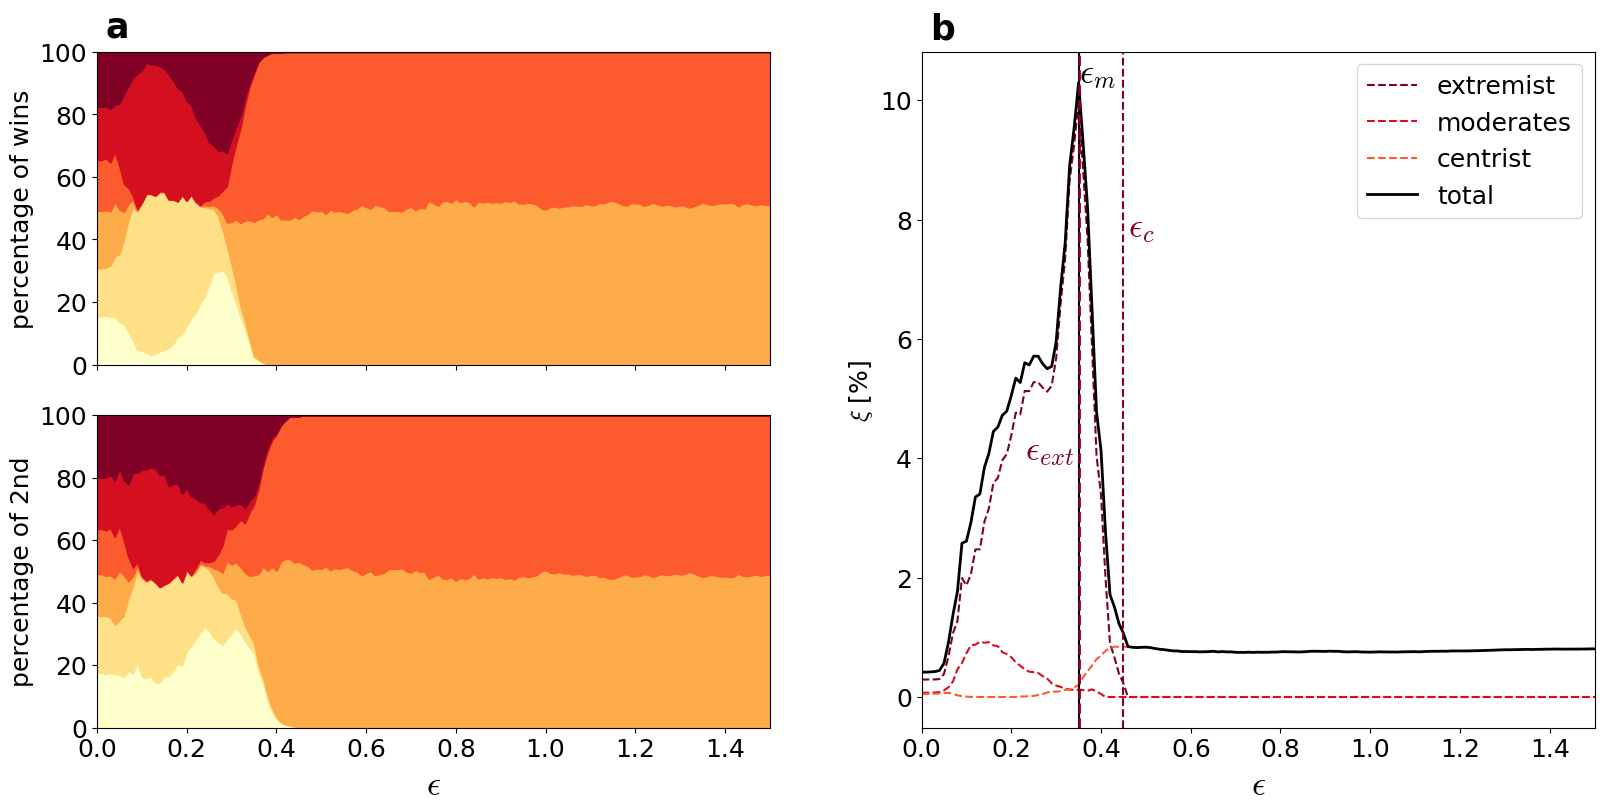

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 18})


path=Main_path+'EPS_CRITICAL/'

Num_party=6
num_elec=0
labels_name=1
fig_name='/home/glory/Dropbox/Apps/Overleaf/PhD_thesis_1/Figures/'+'Multiparty_six'
plot_all_one_party_elec_sys_change_necc(Num_party,num_elec,labels_name, fig_name)

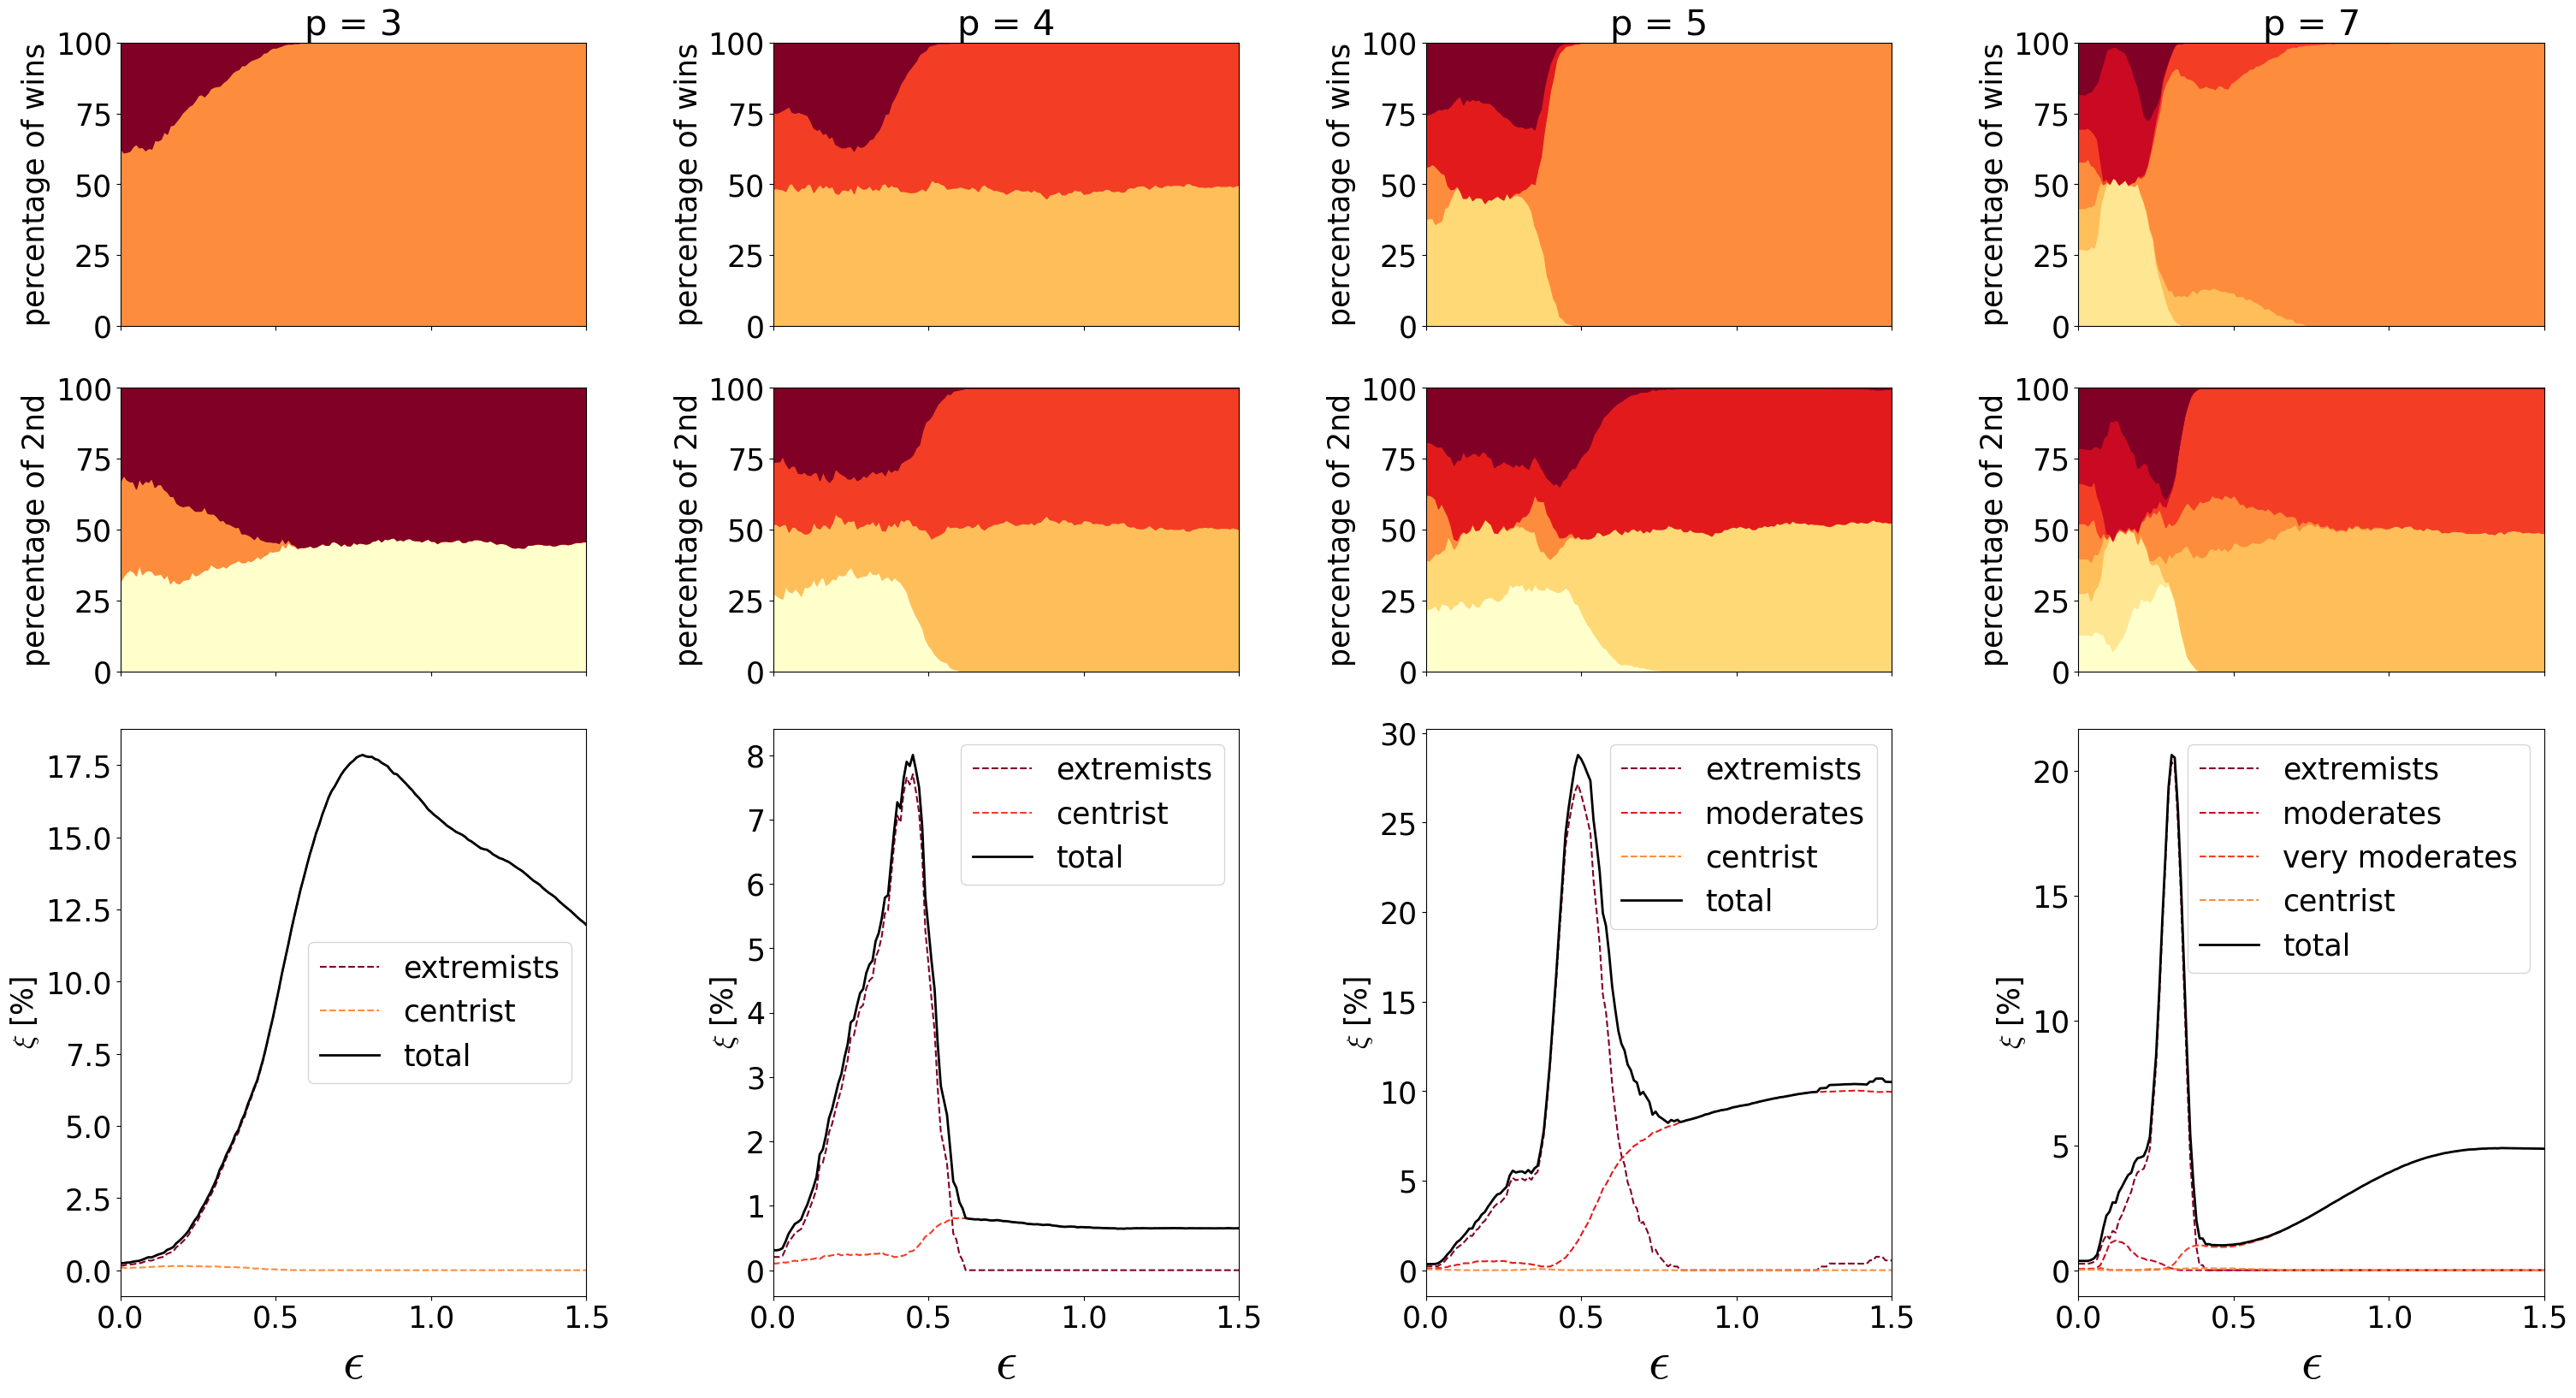

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 25})

num_elec=0
labels_name=0
fig_name='/home/glory/Dropbox/Apps/Overleaf/PhD_thesis_1/Figures/'+'Mult_single_all'
general_all_plot(num_elec,labels_name,fig_name)

# 2. Ranked Choice Voting System

In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 15})


(0.0, 1.5)

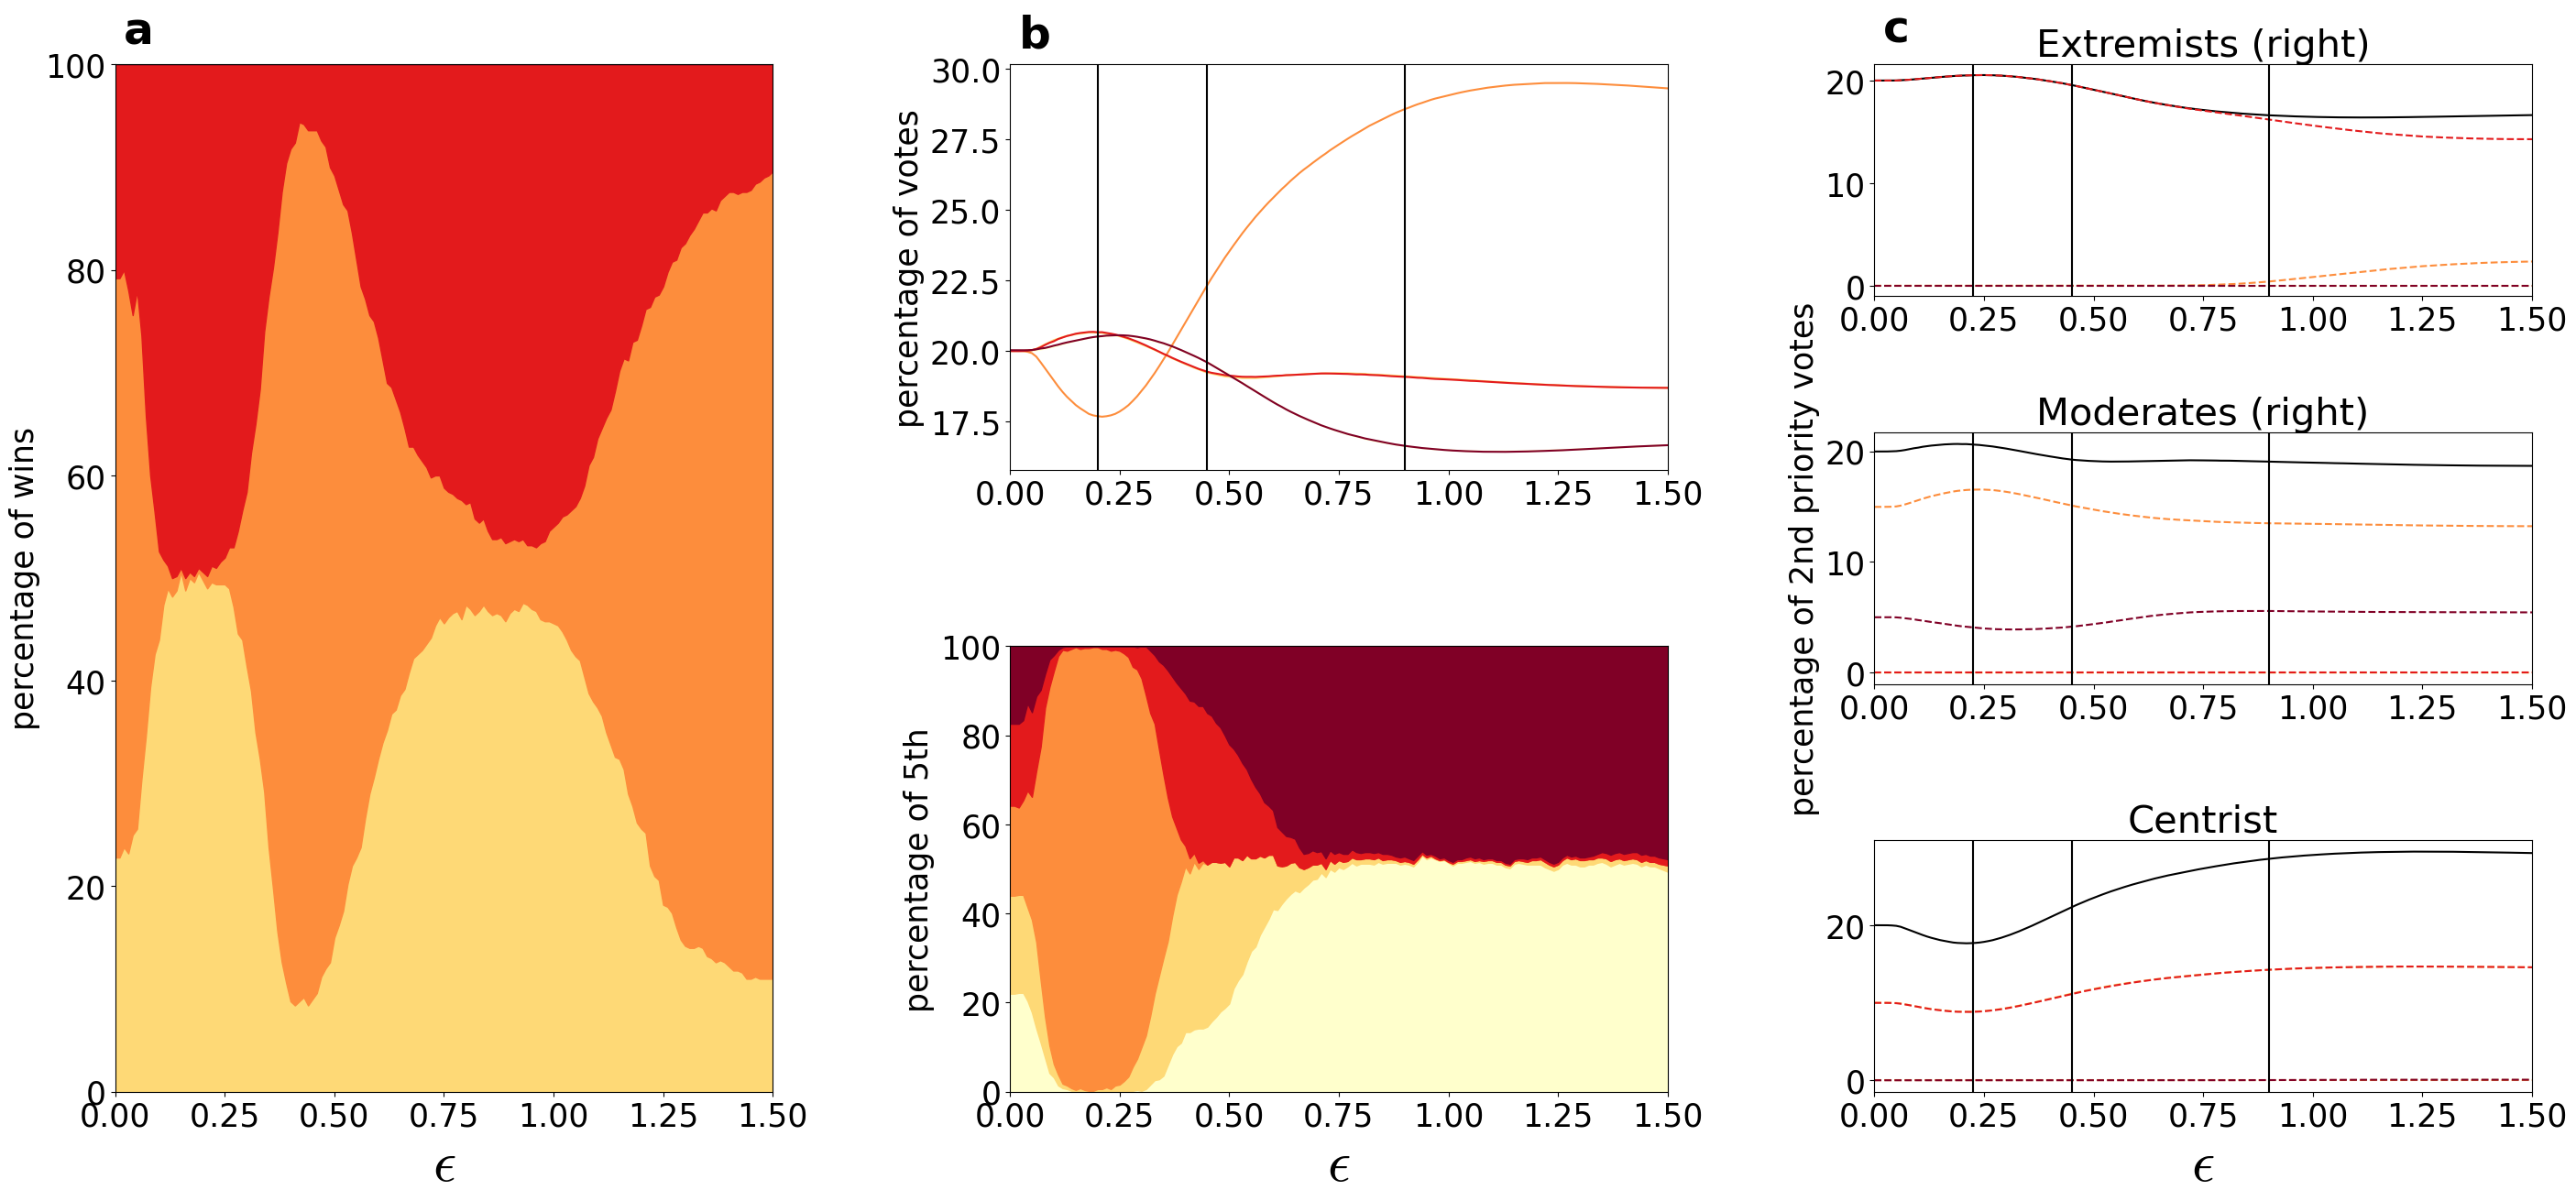

In [30]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 25})

Num_party=5

#e_range,EFFORT,NUM_AGENTS_INFLUENCED, NUM_VOTES, PP, N_VOTES, PP_2, E_POS, NE_POS, N_AG_POS, eps_critical, Total_agents, Num_simulation, NUM_NV, Num_elemination, Pos_elem, Percentage_positions,Num_percentage_positions, INTER_NEIGHBOURS,MAX_NEIGHBOURS, AGENTS_TRANSITION,PRIORITY_VOTES_PAR=load_func_DES_optimized(Num_party)
            
e_range,NUM_AGENTS_INFLUENCED, NE_POS, N_AG_POS, eps_critical, Total_agents, Num_simulation, PRIORITY_VOTES_PAR, Percentage_positions,NUM_VOTES=load_func_DES_optimized(Num_party)

Priority_votes=np.mean(PRIORITY_VOTES_PAR[0],axis=0)

color=plt.get_cmap("YlOrRd",Num_party)
fig = plt.figure(figsize=(28,13),constrained_layout=True)
grid = fig.add_gridspec(ncols=3, nrows=6, wspace=0.1, hspace=0.1)

width_stack_plot=0.011
ax1=plt.subplot(grid[:6, 0])
num_elec=1
bottom=0
position_par=1
num_elec=1
position_party=0
ax1.fill_between(e_range,Percentage_positions[position_party,num_elec,:,0],label='P '+str(0),color=color(0))
for num in range(Num_party-1):
    bottom=bottom+Percentage_positions[position_party,num_elec,:,num]
    ax1.fill_between(e_range,bottom, bottom+Percentage_positions[position_party,num_elec,:,num+1],label='P '+str(num+1),color=color(num+1))
ax1.set_xlabel('$\epsilon$',fontsize='45')
ax1.set_ylabel('percentage of wins')
ax1.set_xlim([0,1.5])
ax1.set_ylim([0,100])
ax1.text(0.02, 2+ max(ax1.get_ylim()), 'a', weight='bold',fontsize='35')

num_elec=0
ax2=plt.subplot(grid[:3,1])
Temp=(np.mean(NUM_VOTES[num_elec],axis=0)/2001)*100
for num in range(Num_party):
    ax2.plot(e_range,Temp[:,num],color=color(num), label='P '+str(num))
ax2.axvline(0.2,color='k')
ax2.axvline(0.45,color='k')
ax2.axvline(0.9,color='k')
#ax2.axvline(1.25,color='k')
#ax2.set_xlabel('$\epsilon$',fontsize='15')
ax2.set_ylabel('percentage of votes')
ax2.text(0.02, 0.02*max(ax2.get_ylim())+max(ax2.get_ylim()), 'b', weight='bold',fontsize='35')
ax2.set_xlim([0,1.5])


ax3=plt.subplot(grid[3:6,1])
num_elec=0
bottom=0
position_party=Num_party-1
ax3.fill_between(e_range,Percentage_positions[position_party,num_elec,:,0],label='P '+str(0),color=color(0))
for num in range(Num_party-1):
    bottom=bottom+Percentage_positions[position_party,num_elec,:,num]
    ax3.fill_between(e_range,bottom, bottom+Percentage_positions[position_party,num_elec,:,num+1],label='P '+str(num+1),color=color(num+1))
ax3.set_xlabel('$\epsilon$',fontsize='45')
ax3.set_ylabel('percentage of 5th')
ax3.set_xlim([0,1.5])
ax3.set_ylim([0,100])

ax4=plt.subplot(grid[:2,2])
Priority_votes=np.mean(PRIORITY_VOTES_PAR,axis=0)
num_par_2=4
ax4.plot(e_range,100*(Priority_votes[:,0,num_par_2,num_par_2]/2001),color='k')
ax4.set_title('Extremists (right)')

for num_par_1 in range(Num_party):
    ax4.plot(e_range,100*(Priority_votes[:,1,num_par_2,num_par_1]/2001),'--',label=str(num_par_1+1),color=color(num_par_1))
    #professionalax4.legend()
#ax4.set_ylabel('% of 2nd priority votes', fontsize='15')
ax4.text(0.02, 0.1*max(ax4.get_ylim())+max(ax4.get_ylim()), 'c', weight='bold',fontsize='35')
ax4.axvline(0.225,color='k')
ax4.axvline(0.45,color='k')
ax4.axvline(0.9,color='k')
#ax4.axvline(1.25,color='k')
ax4.set_xlim([0,1.5])

ax5=plt.subplot(grid[2:4,2])
num_par_2=3
ax5.plot(e_range,100*(Priority_votes[:,0,num_par_2,num_par_2]/2001),color='k')
ax5.set_title('Moderates (right)')

for num_par_1 in range(Num_party):
    ax5.plot(e_range,100*(Priority_votes[:,1,num_par_2,num_par_1]/2001),'--',label=str(num_par_1+1),color=color(num_par_1))
    #ax5.legend()
ax5.set_ylabel('percentage of 2nd priority votes')
ax5.axvline(0.225,color='k')
ax5.axvline(0.45,color='k')
ax5.axvline(0.9,color='k')
#ax5.axvline(1.25,color='k')
ax5.set_xlim([0,1.5])

ax6=plt.subplot(grid[4:6,2])
num_par_2=2
ax6.plot(e_range,100*(Priority_votes[:,0,num_par_2,num_par_2]/2001),color='k')
ax6.set_title('Centrist')

for num_par_1 in range(Num_party):
    ax6.plot(e_range,100*(Priority_votes[:,1,num_par_2,num_par_1]/2001),'--',label=str(num_par_1+1),color=color(num_par_1))
    #ax6.legend()
ax6.set_xlabel('$\epsilon$',fontsize='45')
#ax6.set_ylabel('% of 2nd priority votes', fontsize='15')
ax6.axvline(0.225,color='k')
ax6.axvline(0.45,color='k')
ax6.axvline(0.9,color='k')
#ax6.axvline(1.25,color='k')
ax6.set_xlim([0,1.5])

#plt.savefig('/home/glory/Dropbox/Apps/Overleaf/PhD_thesis_1/Figures/'+'Ranked_choice_voting_exp.pdf',bbox_inches='tight')



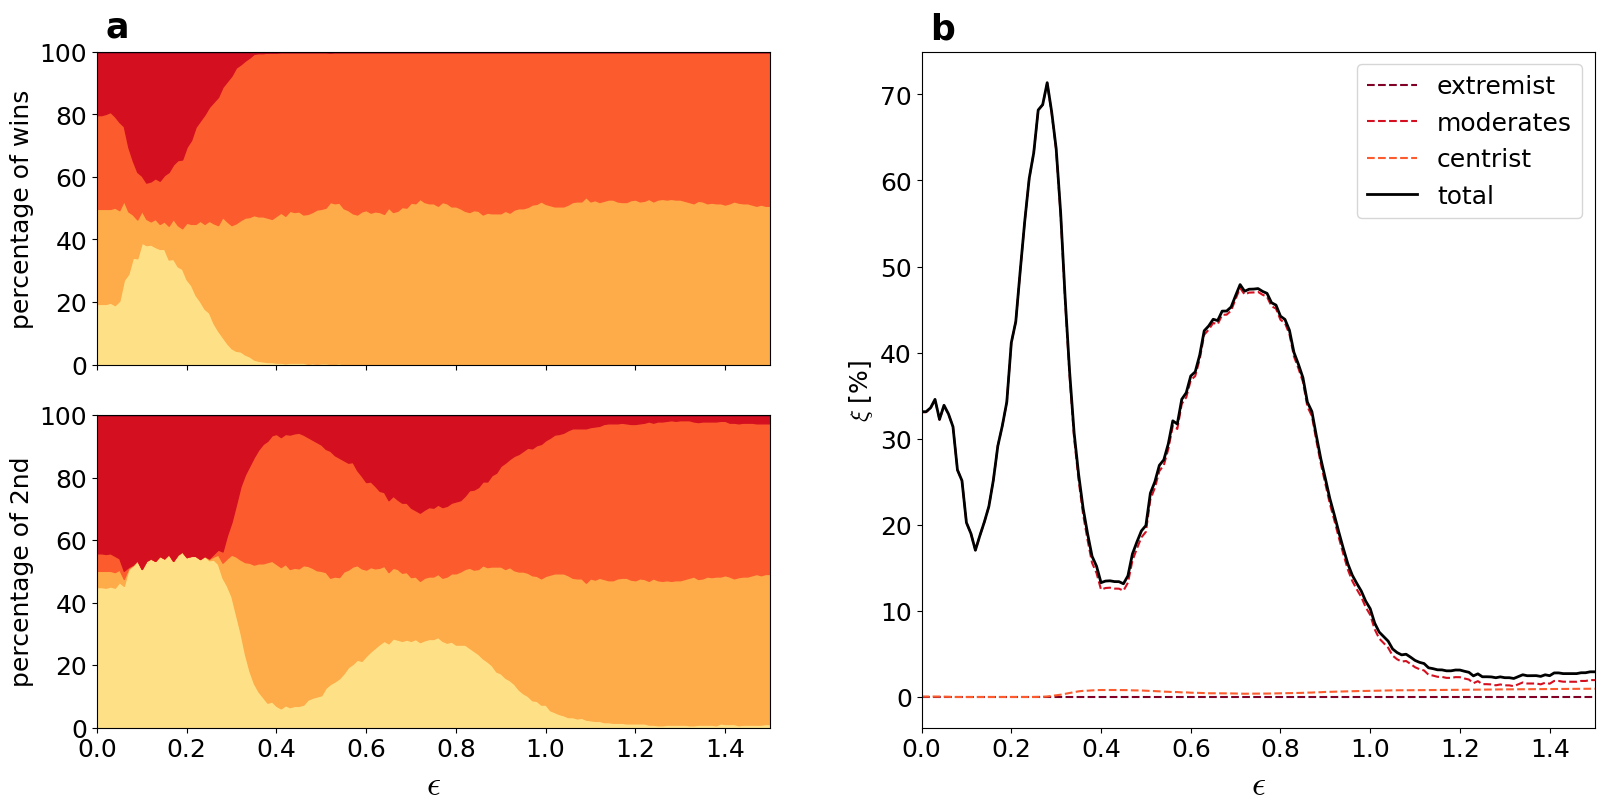

In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 18})

Num_party=6
num_elec=1
labels_name=0
fig_name='/home/glory/Dropbox/Apps/Overleaf/PhD_thesis_1/Figures/'+'Multiparty_six_rcv'
plot_all_one_party_elec_sys_change_necc(Num_party,num_elec,labels_name,fig_name)

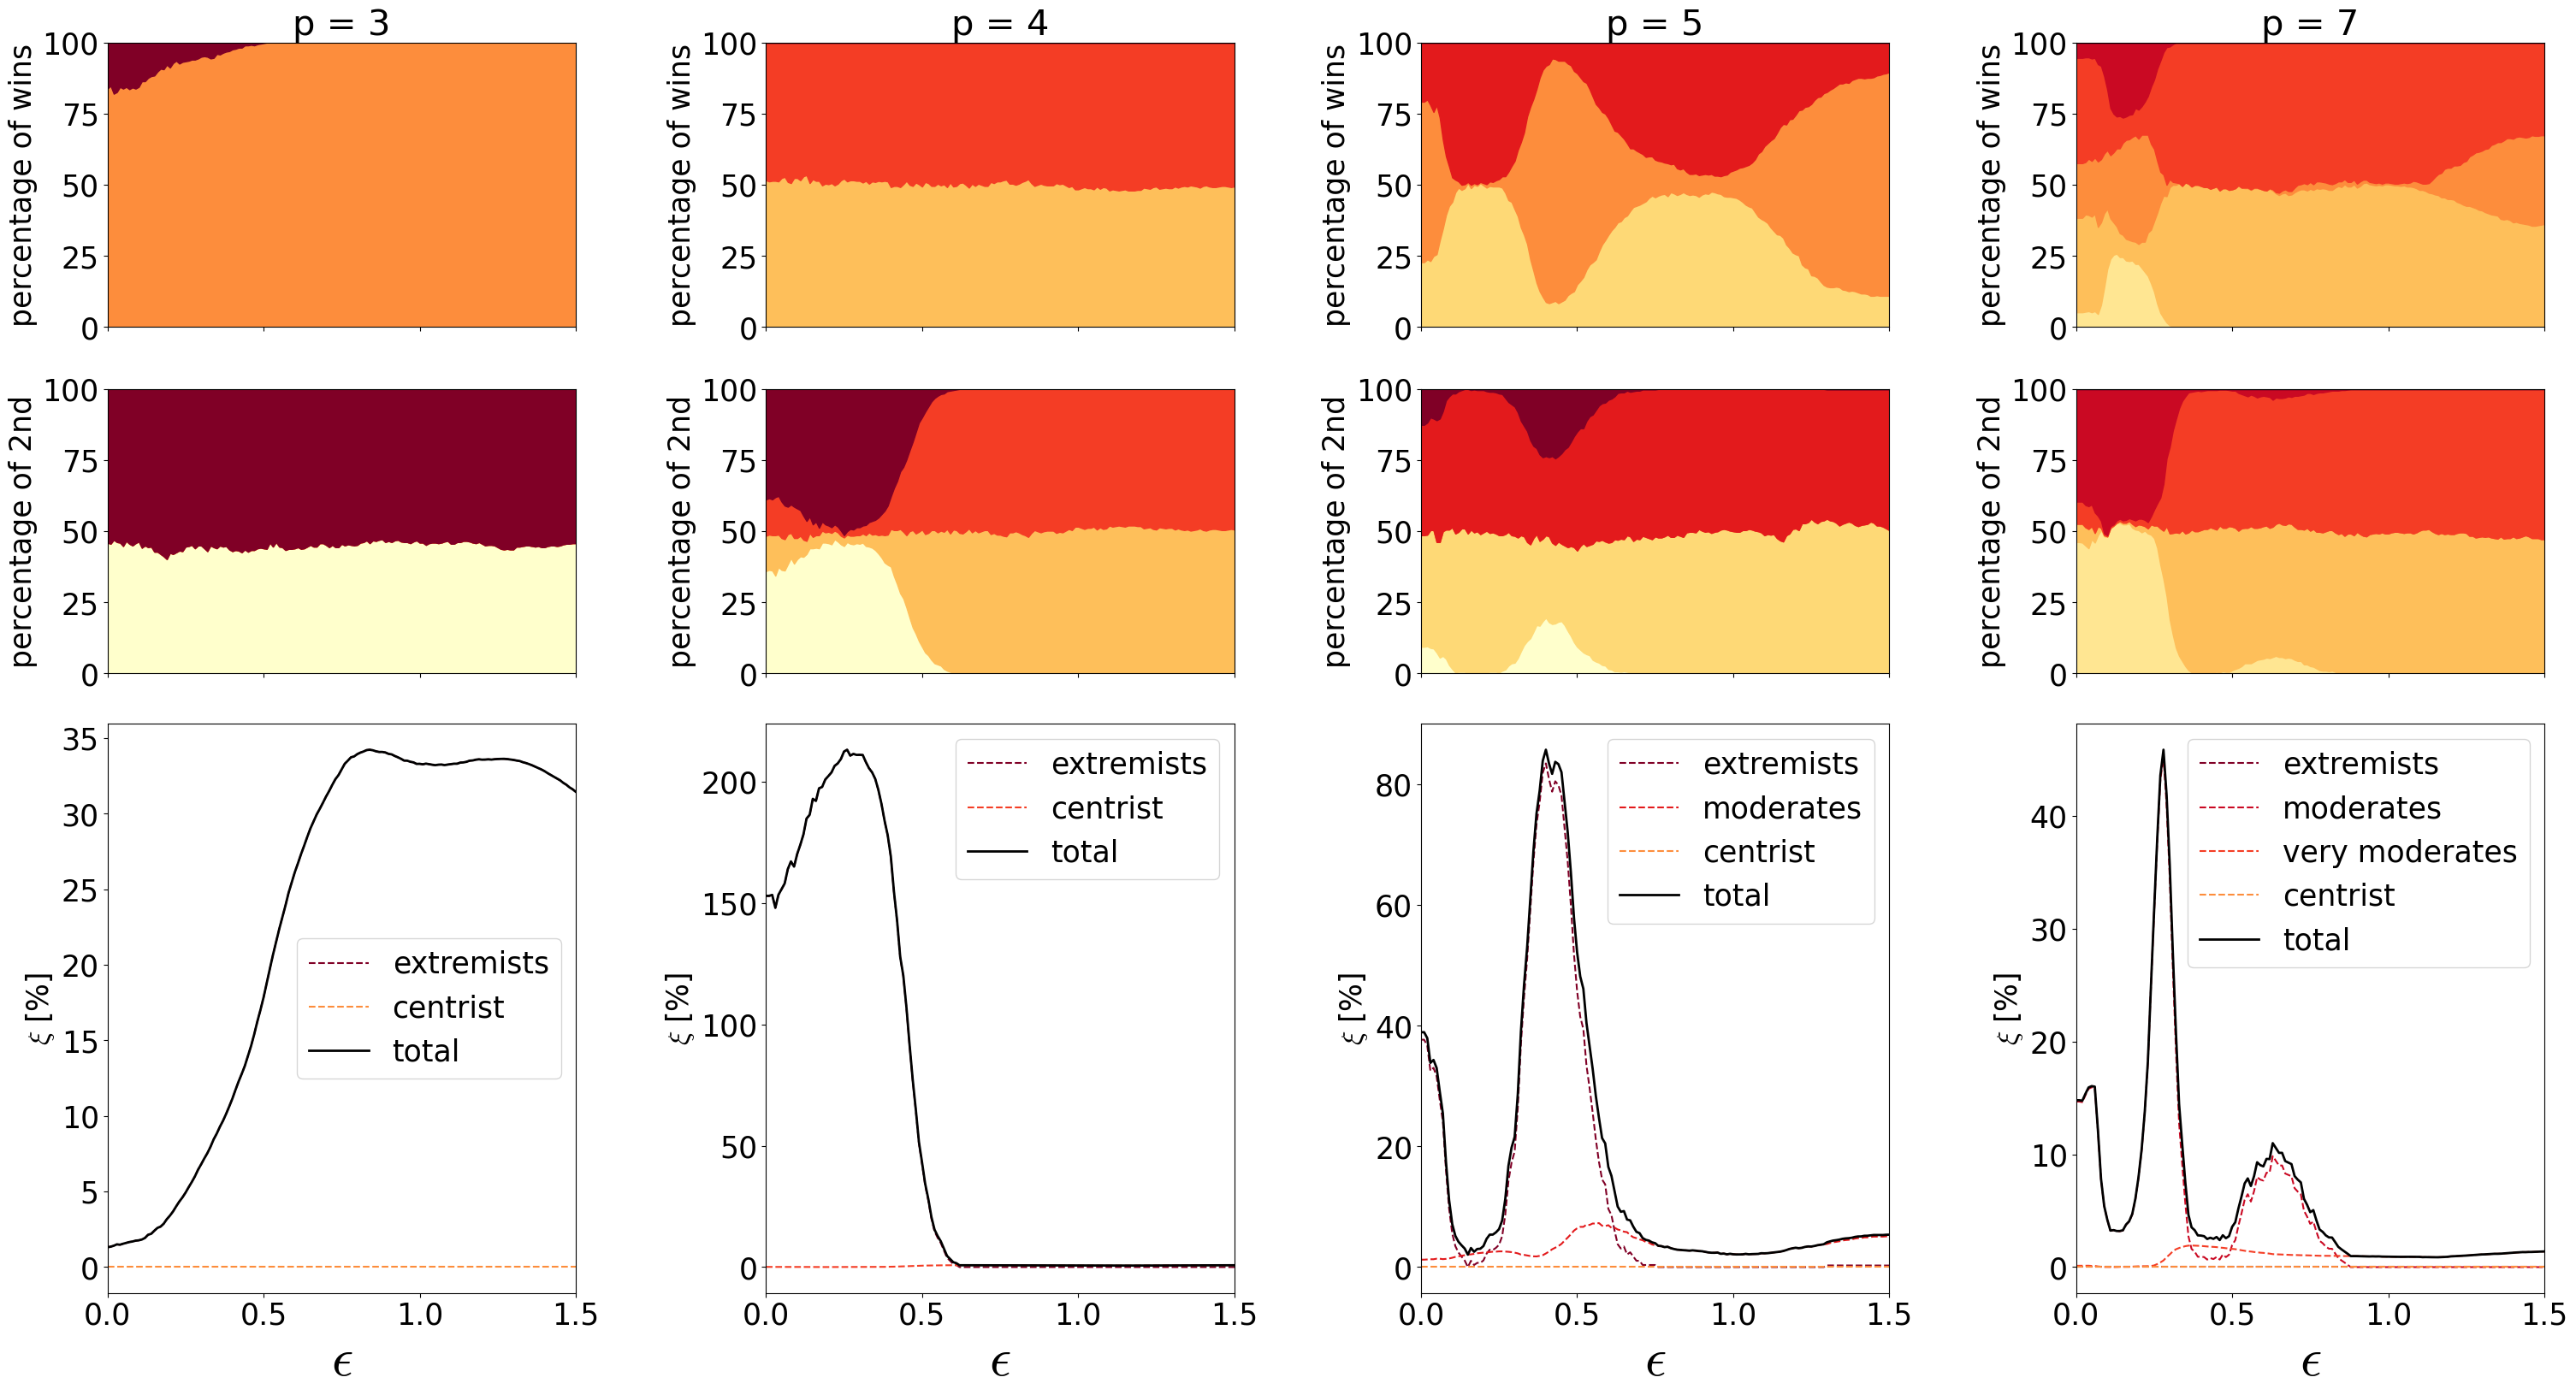

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 25})

num_elec=1
labels_name=0
fig_name='/home/glory/Dropbox/Apps/Overleaf/PhD_thesis_1/Figures/'+'Ranked_choice_voting_all'
general_all_plot(num_elec,labels_name,fig_name)

# 3. Two-Round System

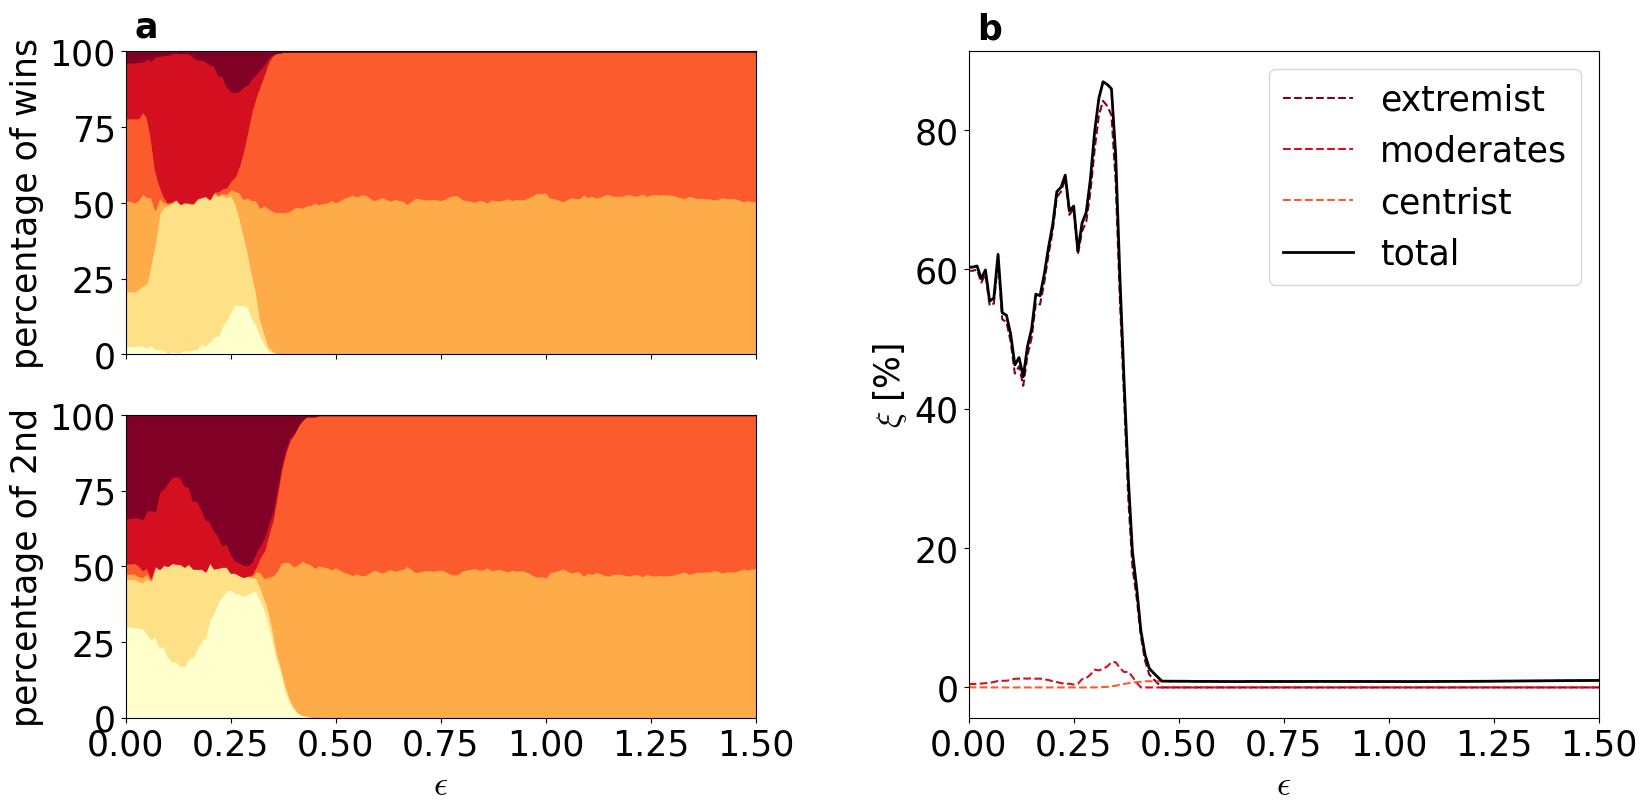

In [33]:
Num_party=6
num_elec=2
labels_name=0
fig_name='/home/glory/Dropbox/Apps/Overleaf/PhD_thesis_1/Figures/'+'Multiparty_six_trs'
plot_all_one_party_elec_sys_change_necc(Num_party,num_elec,labels_name,fig_name)

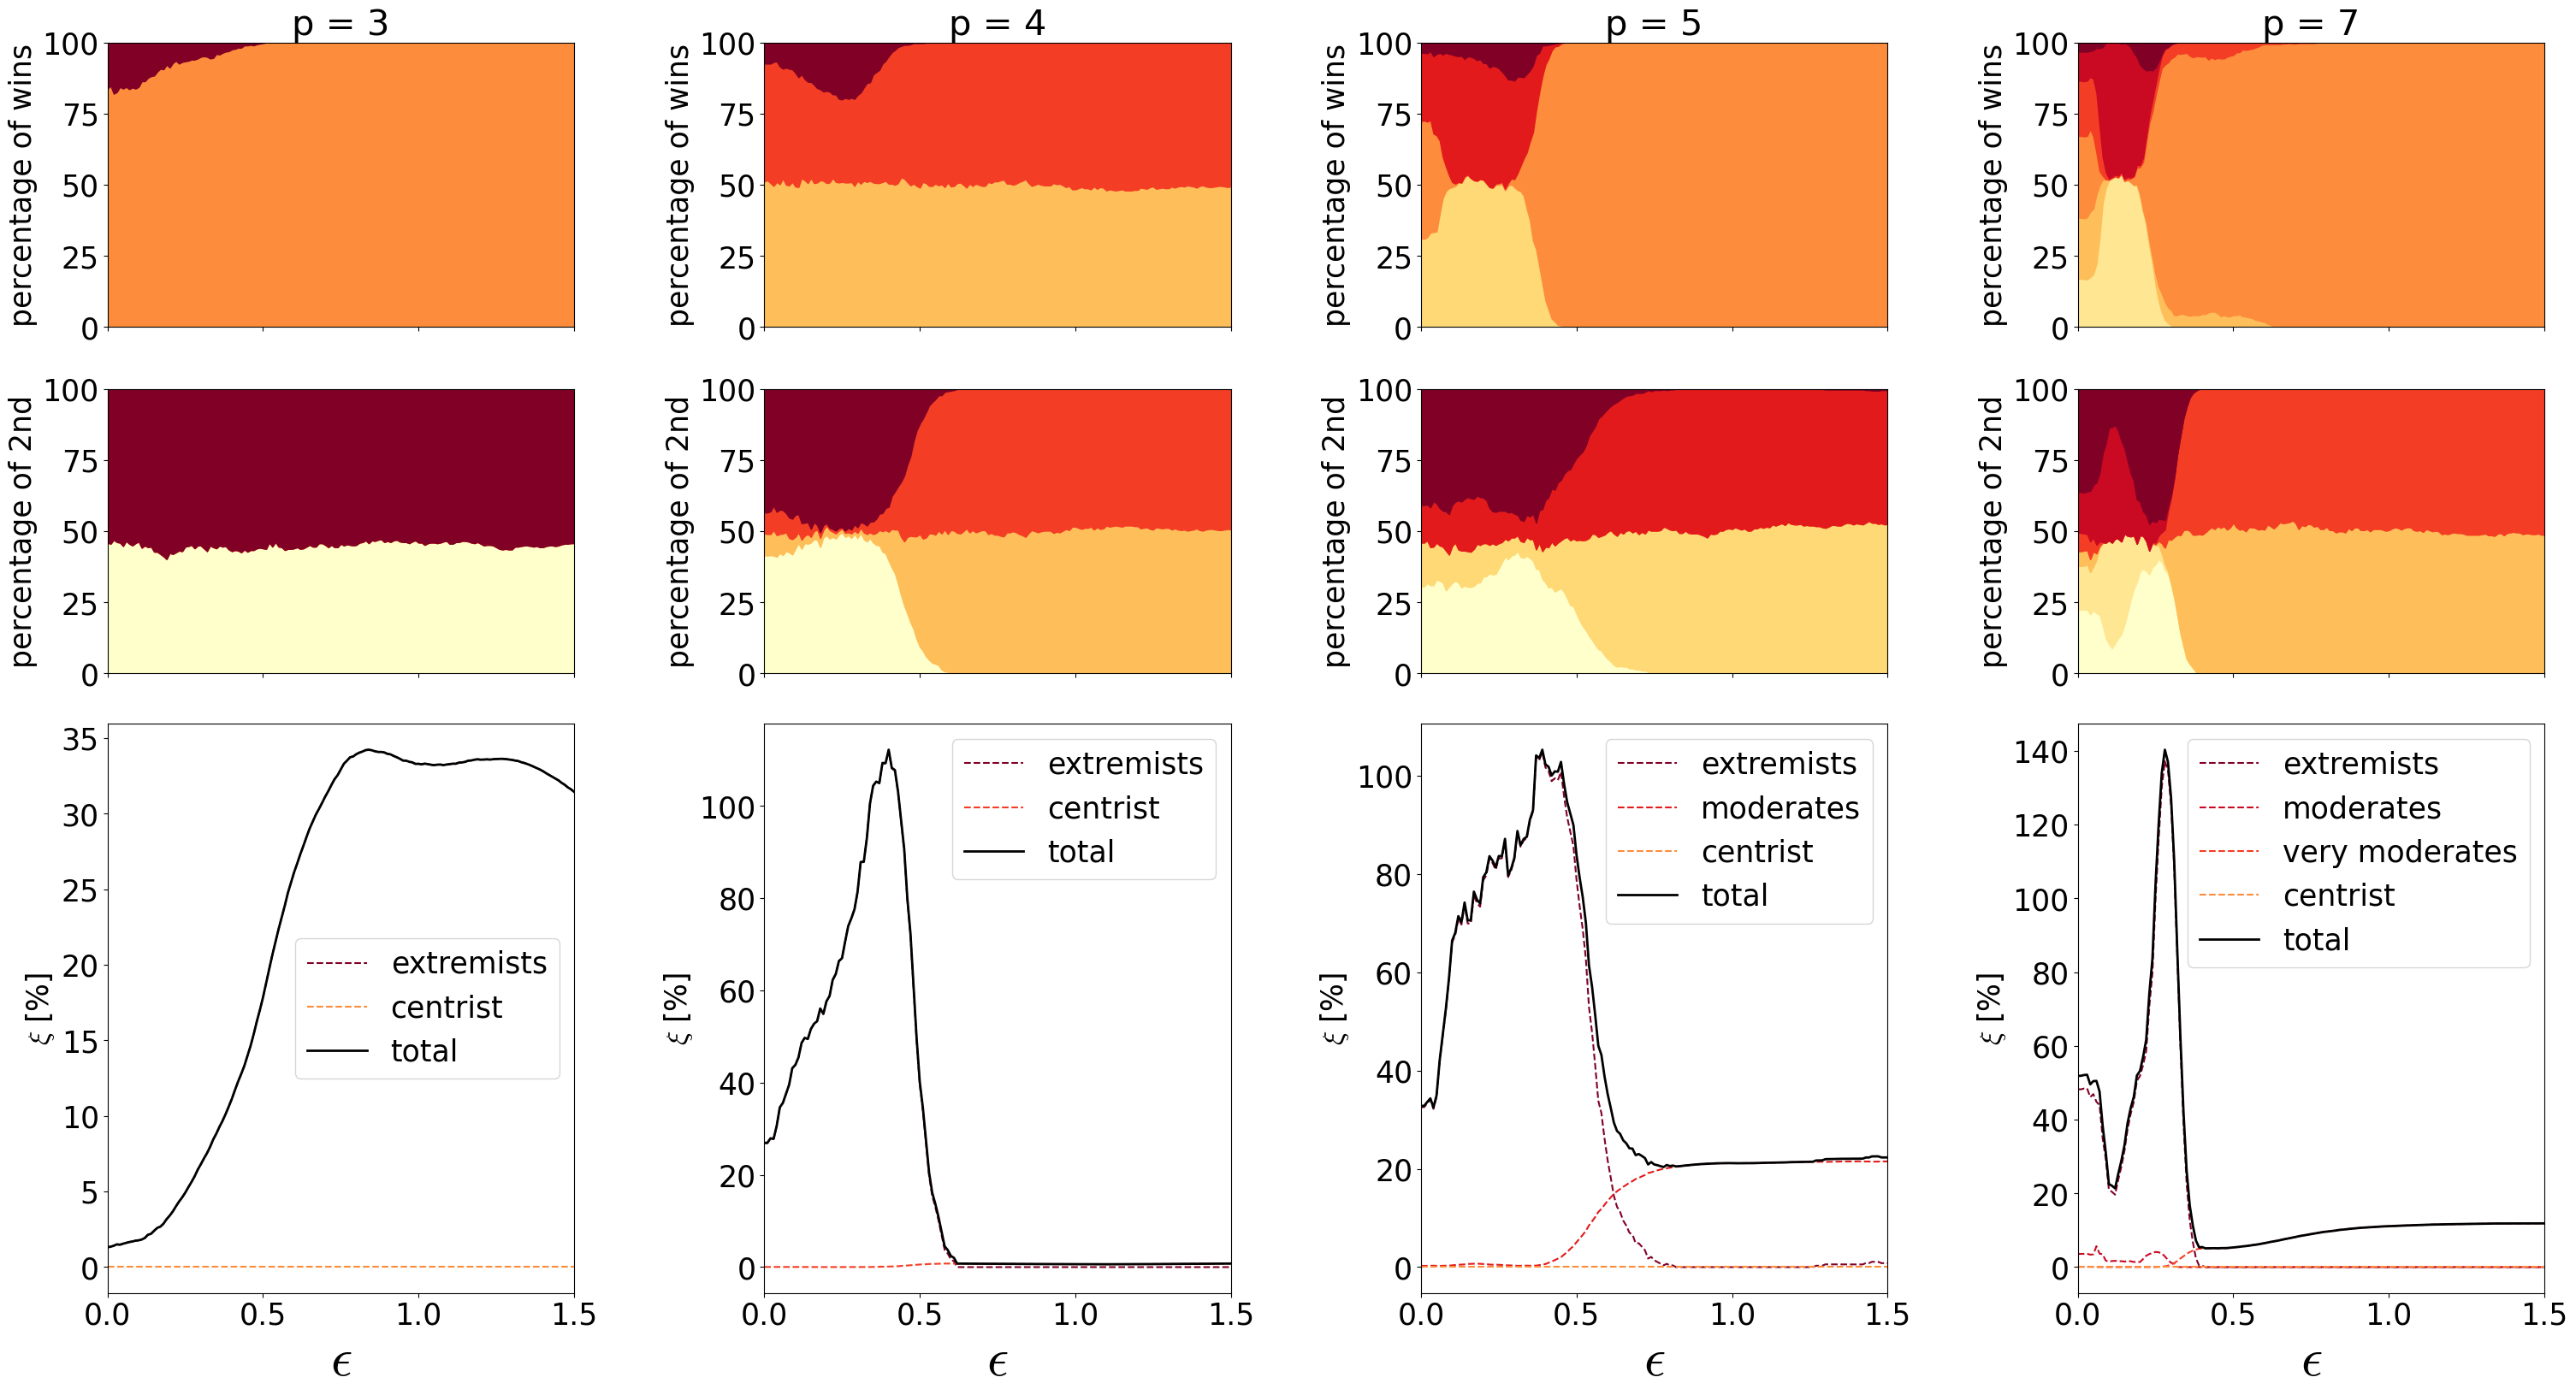

In [34]:
num_elec=2
labels_name=0
fig_name='/home/glory/Dropbox/Apps/Overleaf/PhD_thesis_1/Figures/'+'Two_round_system_all'
general_all_plot(num_elec,labels_name,fig_name)

# Multi-party: Multiple electoral units 

## Different Electoral systems

    1.Proportional representation (PR)
    2. Winner-Takes-All (WTA)
    3. Single representative (SR)
    4. Proportional Ranked Choice Voting (PRCV)

In [35]:
def load_ELEC_SYS(Num_party):
    BIAS_VAL=np.linspace(0,5,11)*0.05
    BIAS_VAL=BIAS_VAL[0:1]
    data=np.load(path+'Initial_considerations.npz',allow_pickle=True)
    val_1=0
    NUM_STATES_ORIGINAL=data['NUM_STATES']
    val_2=len(NUM_STATES_ORIGINAL)
    change=1
    NUM_STATES=data['NUM_STATES'][val_1:val_2:change]
    NUM_STATES_PER_STATE=data['NUM_SEATS_PER_STATE'][val_1:val_2:change]
    #NUM_STATES_PER_STATE=data['NUM_PPL_RATIO_PER_STATE']
    Electoral_systems=3
    Num_simulation=100
    
    data=np.load(path+'Pol_Multiparty_diff_elec_sys_'+str(Num_party)+'_'+str(0)+'.npz',allow_pickle=True)
    e_range=data['e_range']
    E_SR=np.zeros((len(BIAS_VAL),len(NUM_STATES),Num_simulation,len(e_range)))
    E_PR=np.zeros((len(BIAS_VAL),len(NUM_STATES),Num_simulation,len(e_range)))
    E_WTAR=np.zeros((len(BIAS_VAL),len(NUM_STATES),Num_simulation,len(e_range)))
    E_RCV=np.zeros((len(BIAS_VAL),len(NUM_STATES),Num_simulation,len(e_range)))
    
    PE_SR=np.zeros((len(BIAS_VAL),len(NUM_STATES),Num_simulation,len(e_range)))
    PE_PR=np.zeros((len(BIAS_VAL),len(NUM_STATES),Num_simulation,len(e_range)))
    PE_WTAR=np.zeros((len(BIAS_VAL),len(NUM_STATES),Num_simulation,len(e_range)))
    PE_RCV=np.zeros((len(BIAS_VAL),len(NUM_STATES),Num_simulation,len(e_range)))

    Em=np.zeros((len(NUM_STATES)*Num_simulation, len(e_range), Electoral_systems))
    
    Em_SR=np.zeros((len(NUM_STATES)*Num_simulation, len(e_range)))
    Em_PR=np.zeros((len(NUM_STATES)*Num_simulation, len(e_range)))
    Em_WTAR=np.zeros((len(NUM_STATES)*Num_simulation, len(e_range)))
    Em_RCV=np.zeros((len(NUM_STATES)*Num_simulation,len(e_range)))

    NUM_Eff=np.zeros((len(e_range),Electoral_systems))
    
    for b_val in range(len(BIAS_VAL)):
        num=0
        for num_state in range(val_1,val_2,change):
            data=np.load(path+'Pol_Multiparty_diff_elec_sys_'+str(Num_party)+'_'+str(num_state)+'.npz',allow_pickle=True)
            e_range=data['e_range']
            Agents=NUM_STATES_PER_STATE[num]*101
            Agents[Agents%2==0]+=1
            Total_agents=np.sum(Agents)
            E_SR[b_val,num]=data['EFF_SR']/Total_agents
            E_PR[b_val,num]=data['EFF_PR']/Total_agents
            E_WTAR[b_val,num]=data['EFF_WTAR']/Total_agents
            E_RCV[b_val,num]=data['EFF_RCV']/Total_agents
            
            PE_SR[b_val,num]=(data['NUM_AGENTS_INFLUENCED_SR']/Total_agents)*100
            PE_PR[b_val,num]=(data['NUM_AGENTS_INFLUENCED_PR']/Total_agents)*100
            PE_WTAR[b_val,num]=(data['NUM_AGENTS_INFLUENCED_WTAR']/Total_agents)*100 
            PE_RCV[b_val,num]=(data['NUM_AGENTS_INFLUENCED_RCV']/Total_agents)*100 
            
            num+=1
            
    for num_state in range(len(NUM_STATES)):
        Em_SR[num_state*Num_simulation:num_state*Num_simulation+Num_simulation]=PE_SR[0,num_state,:,:]
        Em_WTAR[num_state*Num_simulation:num_state*Num_simulation+Num_simulation]=PE_WTAR[0,num_state,:,:]
        Em_PR[num_state*Num_simulation:num_state*Num_simulation+Num_simulation]=PE_PR[0,num_state,:,:]
        Em_RCV[num_state*Num_simulation:num_state*Num_simulation+Num_simulation]=PE_RCV[0,num_state,:,:]
    
    Em[:,:,0]=Em_PR
    Em[:,:,1]=Em_WTAR
    Em[:,:,2]=Em_SR
    
    for eps in range(len(e_range)):
        NUM_Eff[eps,0]=np.sum(np.argmax(Em[:,eps],axis=1)==0)
        NUM_Eff[eps,1]=np.sum(np.argmax(Em[:,eps],axis=1)==1)
        NUM_Eff[eps,2]=np.sum(np.argmax(Em[:,eps],axis=1)==2)


    return e_range, E_SR, E_WTAR, E_PR, PE_SR, PE_WTAR, PE_PR, NUM_Eff, Em_PR, Em_WTAR, Em_SR, Em_RCV

Text(0.02, 1.02, 'd')

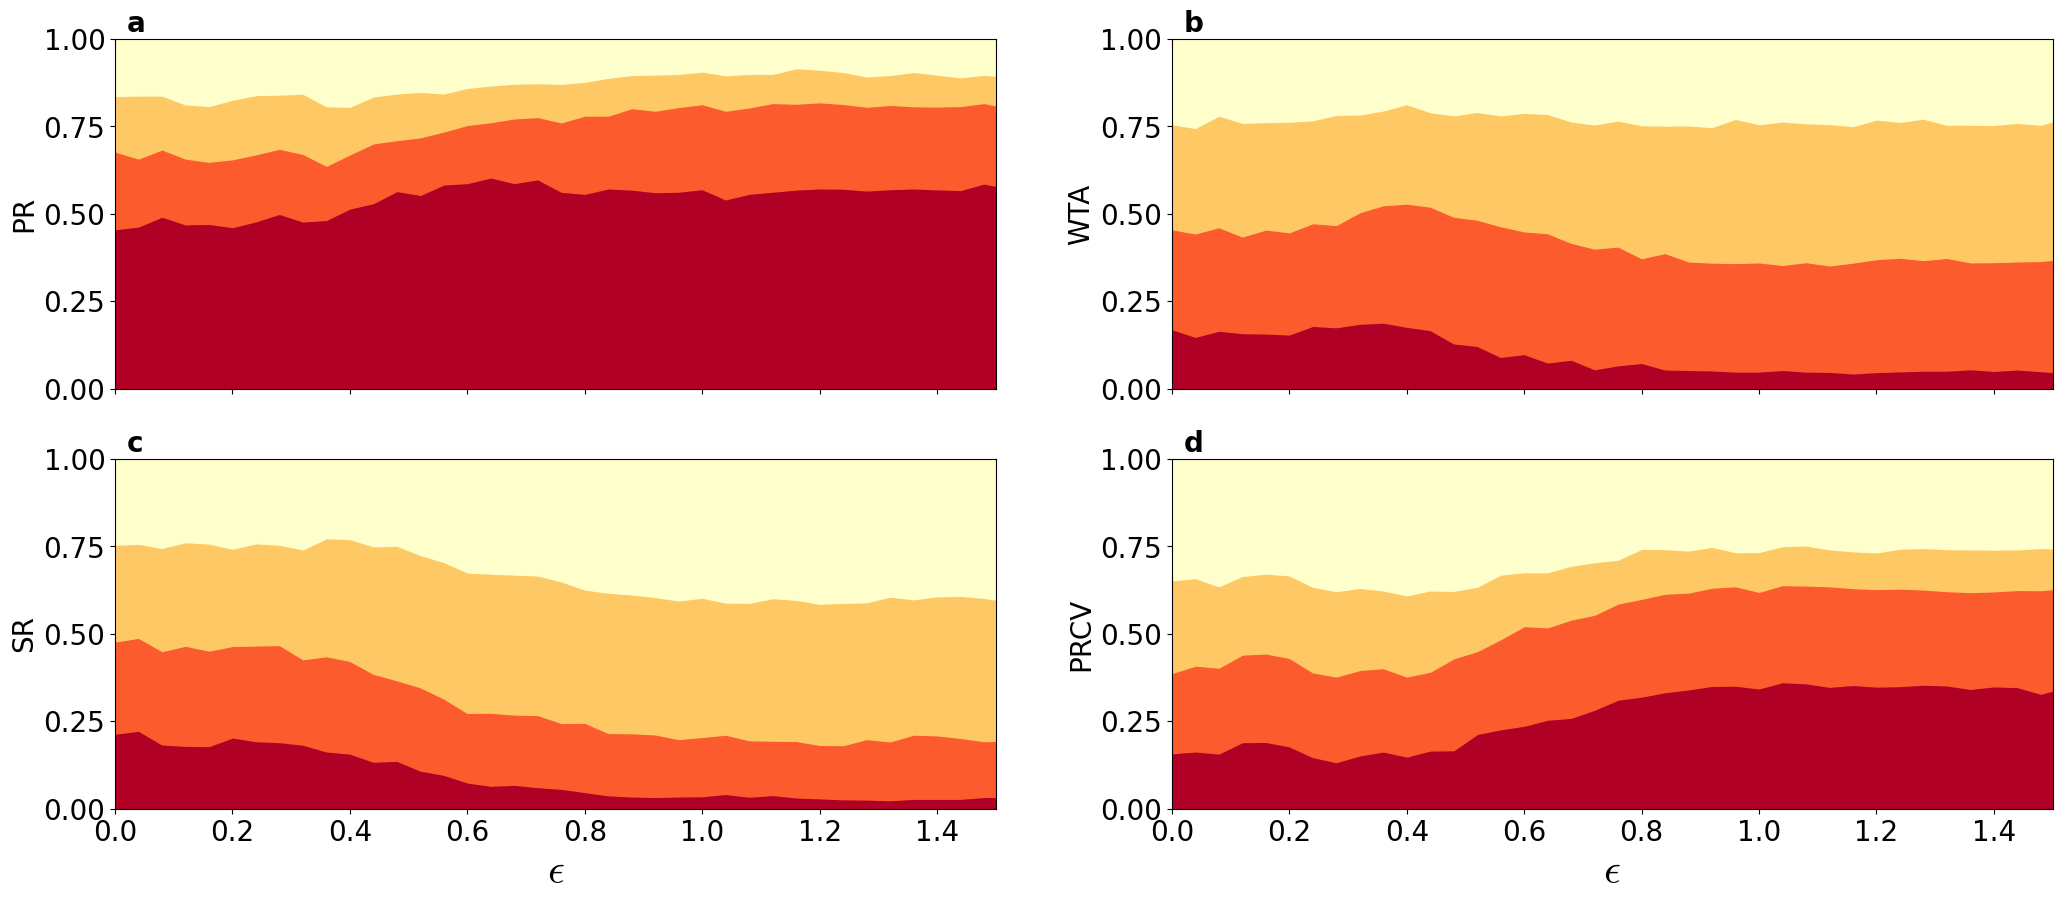

In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({'font.size': 20})

path=Main_path+'Multi_States/'

Num_party=6
fig, axes=plt.subplots(2,2,figsize=(25,10))
color=plt.get_cmap("YlOrRd",11)

e_range, E_SR, E_WTAR, E_PR, PE_SR, PE_WTAR, PE_PR, NUM_Eff, Em_PR, Em_WTAR, Em_SR , Em_RCV= load_ELEC_SYS(Num_party)
Total_num=1500
ELEC_SYS=np.zeros((4,Total_num,len(e_range)))

ELEC_SYS[0]=Em_PR
ELEC_SYS[1]=Em_WTAR
ELEC_SYS[2]=Em_SR
ELEC_SYS[3]=Em_RCV

num=0
pr1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/Total_num
pr2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/Total_num
pr3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/Total_num
pr4=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==3,axis=0)/Total_num

num=1
wtar1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/Total_num
wtar2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/Total_num
wtar3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/Total_num
wtar4=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==3,axis=0)/Total_num

num=2
sr1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/Total_num
sr2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/Total_num
sr3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/Total_num
sr4=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==3,axis=0)/Total_num

num=3
rcv1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/Total_num
rcv2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/Total_num
rcv3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/Total_num
rcv4=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==3,axis=0)/Total_num

width_stack_plot=0.04
bottom=0
row,col=0,0
axes[row,col].fill_between(e_range, pr1,color=color(9))
bottom=bottom+pr1
axes[row,col].fill_between(e_range, bottom,bottom+pr2,color=color(6))
bottom=bottom+pr2
axes[row,col].fill_between(e_range,bottom,bottom+pr3, color=color(3))
bottom=bottom+pr3
axes[row,col].fill_between(e_range,bottom,bottom+pr4,color=color(0))
axes[row,col].set_ylabel('PR')
axes[row,col].set_xlim([0,1.5])
axes[row,col].set_ylim([0,1])
axes[row,col].set_yticks(np.linspace(0,1,5))
axes[row,col].tick_params('x', labelbottom=False)
#axes[row,col].set_xlabel('$\epsilon$',fontsize='20')
axes[row,col].text(0.02, 0.02+max(axes[row,col].get_ylim()), 'a', weight='bold', fontsize='20')

bottom=0
row,col=0,1
axes[row,col].fill_between(e_range, wtar1,color=color(9))
bottom=bottom+wtar1
axes[row,col].fill_between(e_range,bottom,bottom+wtar2,color=color(6))
bottom=bottom+wtar2
axes[row,col].fill_between(e_range,bottom,bottom+wtar3,color=color(3))
bottom=bottom+wtar3
axes[row,col].fill_between(e_range,bottom,bottom+wtar4,color=color(0))
axes[row,col].set_ylabel('WTA')
axes[row,col].set_xlim([0,1.5])
axes[row,col].set_ylim([0,1])
axes[row,col].set_yticks(np.linspace(0,1,5))
axes[row,col].tick_params('x', labelbottom=False)
#axes[row,col].set_xlabel('$\epsilon$',fontsize='20')
axes[row,col].text(0.02, 0.02+max(axes[row,col].get_ylim()), 'b', weight='bold', fontsize='20')

bottom=0
row,col=1,0
axes[row,col].fill_between(e_range, sr1,color=color(9))
bottom=bottom+sr1
axes[row,col].fill_between(e_range,bottom,bottom+sr2,color=color(6))
bottom=bottom+sr2
axes[row,col].fill_between(e_range,bottom,bottom+sr3,color=color(3))
bottom=bottom+sr3
axes[row,col].fill_between(e_range,bottom,bottom+sr4,color=color(0))
axes[row,col].set_ylabel('SR')
axes[row,col].set_xlim([0,1.5])
axes[row,col].set_ylim([0,1])
axes[row,col].set_yticks(np.linspace(0,1,5))
axes[row,col].set_xlabel('$\epsilon$',fontsize='30')
axes[row,col].text(0.02, 0.02+max(axes[row,col].get_ylim()), 'c', weight='bold', fontsize='20')


bottom=0
row,col=1,1
axes[row,col].fill_between(e_range, rcv1,color=color(9))
bottom=bottom+rcv1
axes[row,col].fill_between(e_range, bottom, bottom+rcv2,color=color(6))
bottom=bottom+rcv2
axes[row,col].fill_between(e_range, bottom, bottom+rcv3, color=color(3))
bottom=bottom+rcv3
axes[row,col].fill_between(e_range,bottom, bottom+ rcv4,color=color(0))
axes[row,col].set_ylabel('PRCV')
axes[row,col].set_xlim([0,1.5])
axes[row,col].set_ylim([0,1])
axes[row,col].set_yticks(np.linspace(0,1,5))
axes[row,col].set_xlabel('$\epsilon$',fontsize='30')
axes[row,col].text(0.02, 0.02+max(axes[row,col].get_ylim()), 'd', weight='bold', fontsize='20')

#plt.savefig('/home/glory/Dropbox/Apps/Overleaf/PhD_thesis_1/Figures/'+'Multiparty_robustness_six1.pdf',bbox_inches='tight')

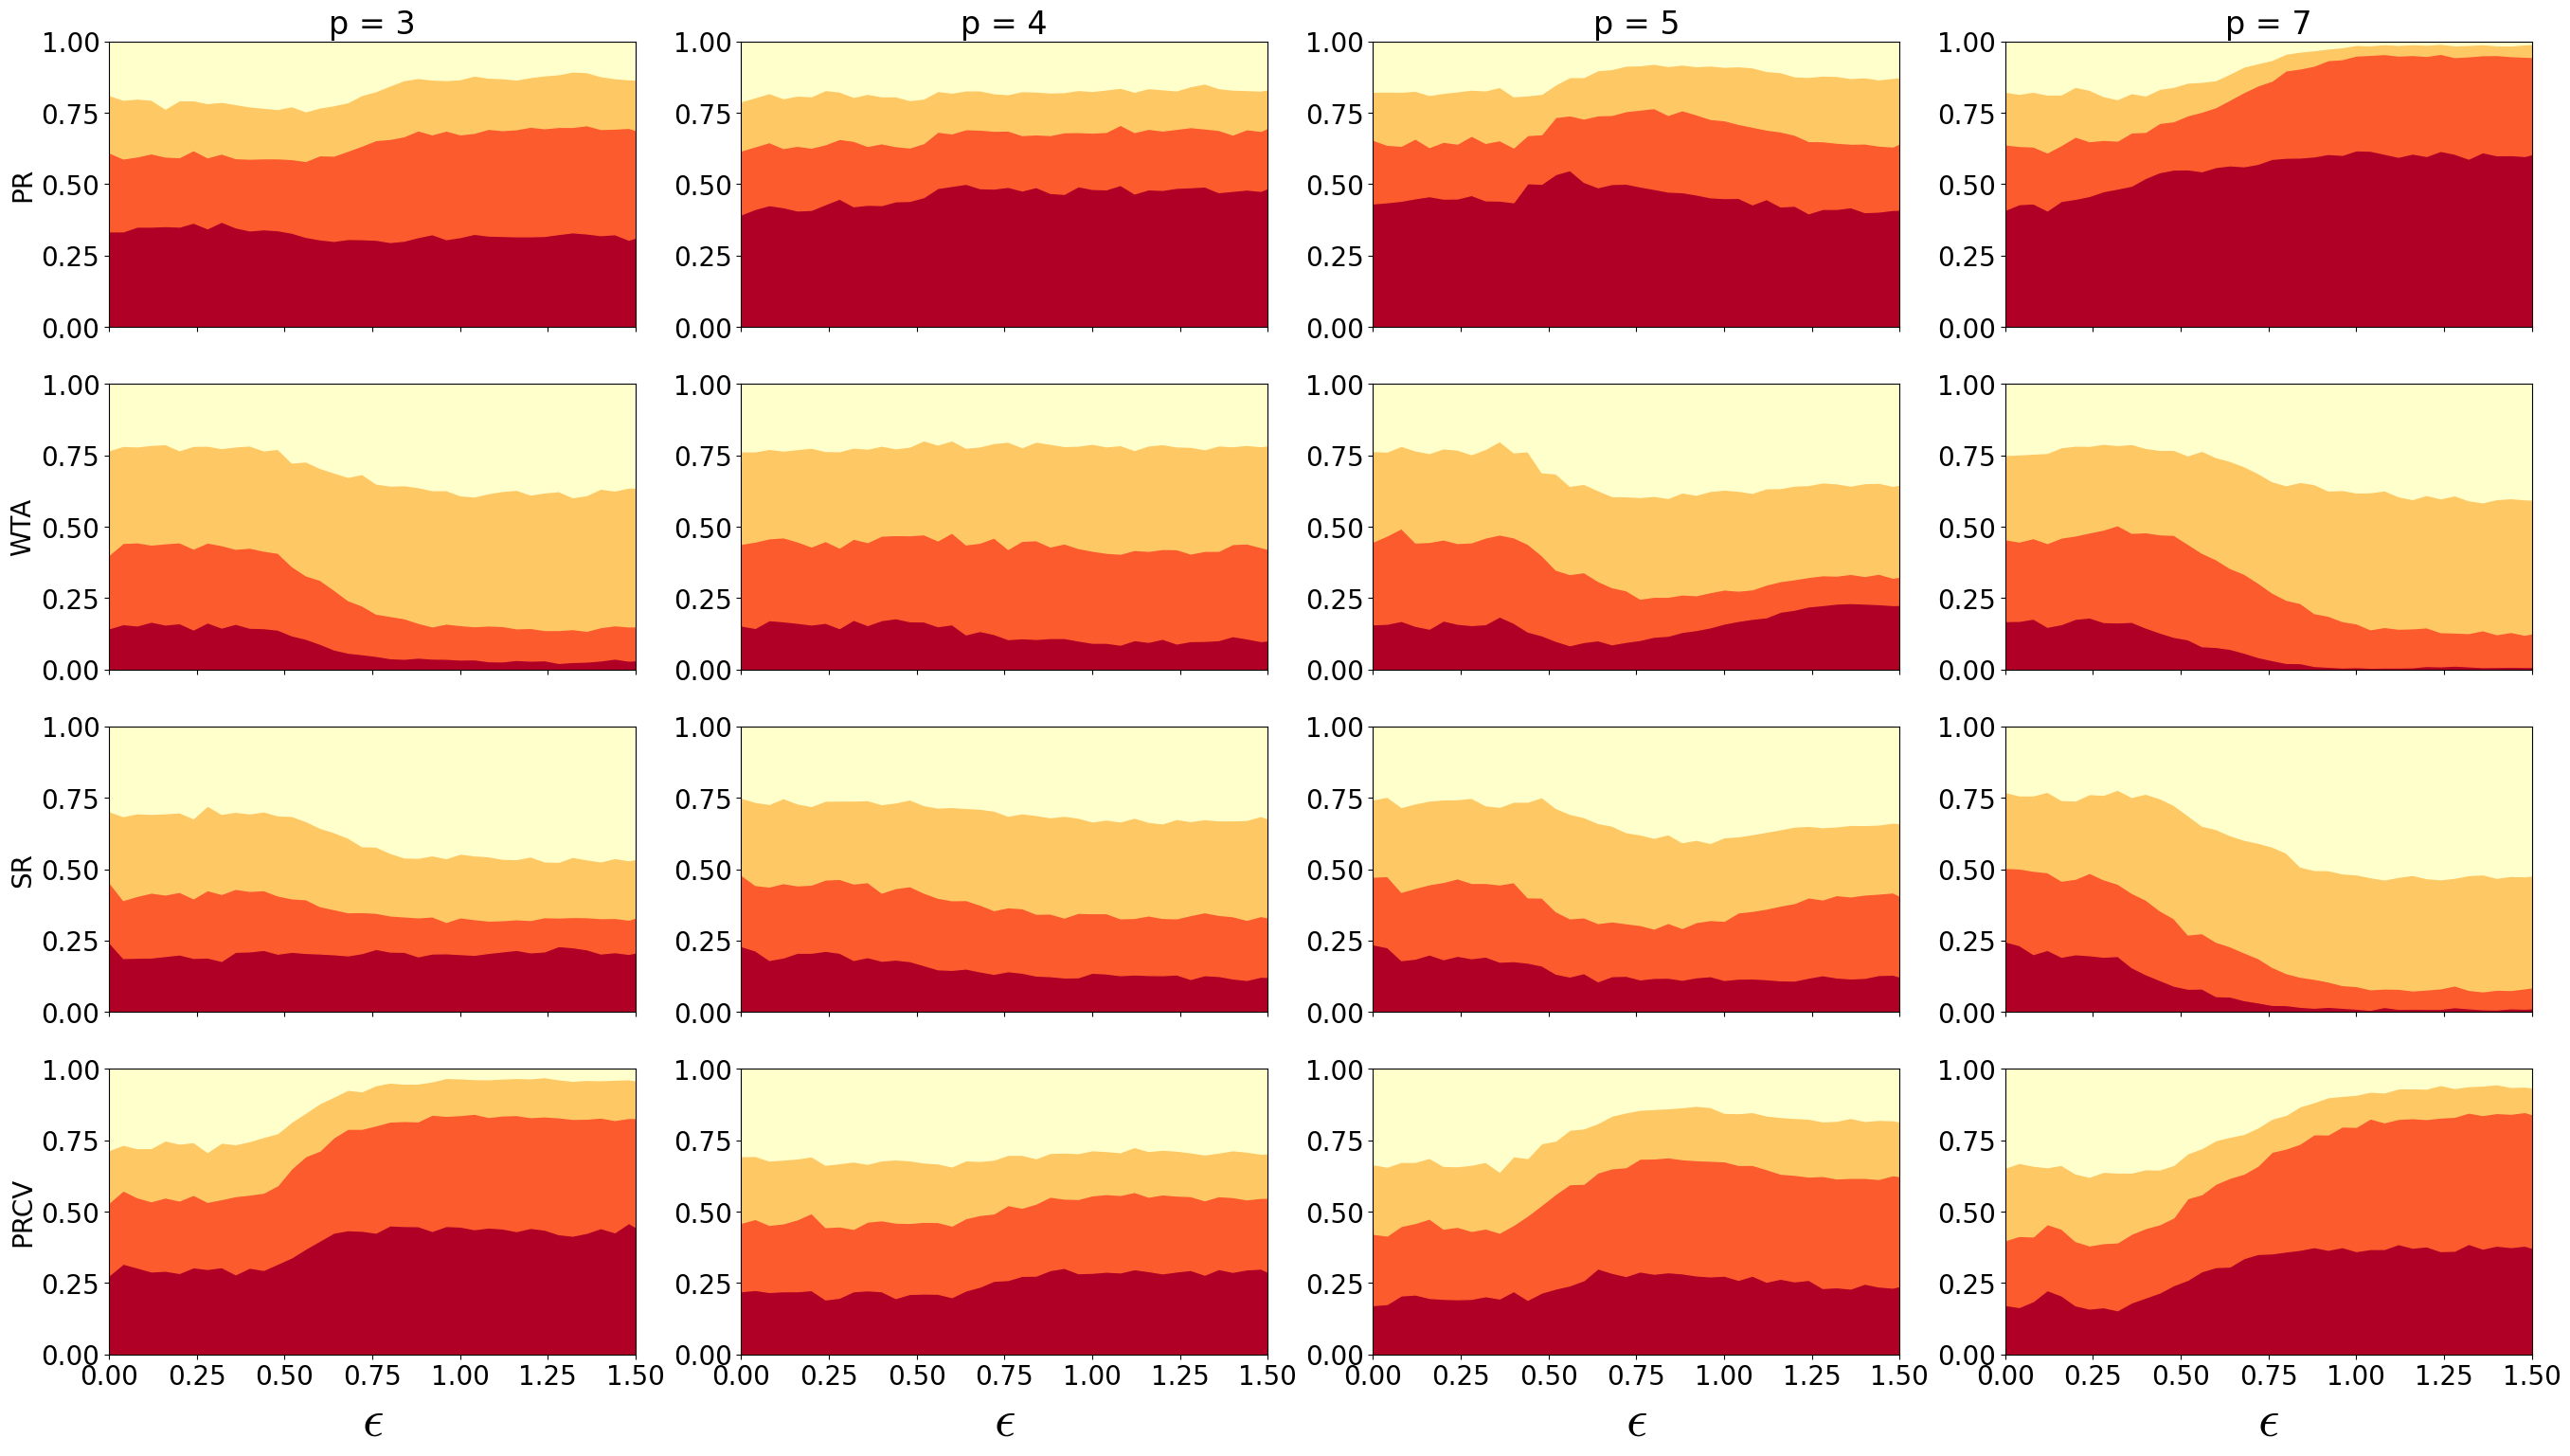

In [37]:
plt.rcParams.update({'font.size': 20})

fig,axes=plt.subplots(4,4,figsize=(33,18))

NUM_PARTY=np.array((3,4,5,7))

for num_par in range(len(NUM_PARTY)):
    Num_party=NUM_PARTY[num_par]
    e_range, E_SR, E_WTAR, E_PR, PE_SR, PE_WTAR, PE_PR, NUM_Eff, Em_PR, Em_WTAR, Em_SR , Em_RCV= load_ELEC_SYS(Num_party)
    Total_num=1500
    ELEC_SYS=np.zeros((4,Total_num,len(e_range)))
    
    ELEC_SYS[0]=Em_PR
    ELEC_SYS[1]=Em_WTAR
    ELEC_SYS[2]=Em_SR
    ELEC_SYS[3]=Em_RCV
    
    num=0
    pr1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/Total_num
    pr2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/Total_num
    pr3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/Total_num
    pr4=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==3,axis=0)/Total_num
    
    num=1
    wtar1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/Total_num
    wtar2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/Total_num
    wtar3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/Total_num
    wtar4=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==3,axis=0)/Total_num
    
    num=2
    sr1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/Total_num
    sr2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/Total_num
    sr3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/Total_num
    sr4=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==3,axis=0)/Total_num
    
    num=3
    rcv1=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==0,axis=0)/Total_num
    rcv2=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==1,axis=0)/Total_num
    rcv3=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==2,axis=0)/Total_num
    rcv4=np.sum(np.argsort(-ELEC_SYS,axis=0).argsort(axis=0)[num]==3,axis=0)/Total_num

    i=0
    width_stack_plot=0.04
    bottom=0
    axes[i,num_par].set_title( 'p = '+str(NUM_PARTY[num_par]))
    axes[i,num_par].fill_between(e_range, pr1,color=color(9))
    bottom=bottom+pr1
    axes[i,num_par].fill_between(e_range, bottom,bottom+pr2,color=color(6))
    bottom=bottom+pr2
    axes[i,num_par].fill_between(e_range,bottom,bottom+pr3, color=color(3))
    bottom=bottom+pr3
    axes[i,num_par].fill_between(e_range,bottom,bottom+pr4,color=color(0))
    if num_par==0:
        axes[i,num_par].set_ylabel('PR')
    axes[i,num_par].set_xlim([0,1.5])
    axes[i,num_par].set_ylim([0,1])
    axes[i,num_par].tick_params('x', labelbottom=False)
    axes[i,num_par].set_yticks(np.linspace(0,1,5))
    #axes[i,num_par].set_yticklabels(['0','','0.5','','1'])
    #axes[i,num_par].set_xlabel('$\epsilon$',fontsize='15')
    #axes[i,num].text(0.05, 0.02+max(axes[i,num].get_ylim()), 'a', weight='bold', fontsize='20')

    i=1
    bottom=0
    axes[i,num_par].fill_between(e_range, wtar1,color=color(9))
    bottom=bottom+wtar1
    axes[i,num_par].fill_between(e_range,bottom,bottom+wtar2,color=color(6))
    bottom=bottom+wtar2
    axes[i,num_par].fill_between(e_range,bottom,bottom+wtar3,color=color(3))
    bottom=bottom+wtar3
    axes[i,num_par].fill_between(e_range,bottom,bottom+wtar4,color=color(0))
    if num_par==0:
        axes[i,num_par].set_ylabel('WTA')
    axes[i,num_par].set_xlim([0,1.5])
    axes[i,num_par].set_ylim([0,1])
    axes[i,num_par].tick_params('x', labelbottom=False)
    axes[i,num_par].set_yticks(np.linspace(0,1,5))
    #axes[i,num_par].set_yticklabels(['0','','0.5','','1'])
    #axes[i,num_par].set_xlabel('$\epsilon$',fontsize='15')
    #axes[i,num].text(0.05, 0.02+max(axes[i,num].get_ylim()), 'b', weight='bold', fontsize='20')

    i=2
    bottom=0
    axes[i,num_par].fill_between(e_range, sr1,color=color(9))
    bottom=bottom+sr1
    axes[i,num_par].fill_between(e_range,bottom,bottom+sr2,color=color(6))
    bottom=bottom+sr2
    axes[i,num_par].fill_between(e_range,bottom,bottom+sr3,color=color(3))
    bottom=bottom+sr3
    axes[i,num_par].fill_between(e_range,bottom,bottom+sr4,color=color(0))
    if num_par==0:
        axes[i,num_par].set_ylabel('SR')
    axes[i,num_par].set_xlim([0,1.5])
    axes[i,num_par].set_ylim([0,1])
    axes[i,num_par].tick_params('x', labelbottom=False)
    axes[i,num_par].set_yticks(np.linspace(0,1,5))
    #axes[i,num_par].set_yticklabels(['0','','0.5','','1'])
    #axes[i,num_par].set_xlabel('$\epsilon$',fontsize='15')
    #axes[i,num].text(0.05, 0.02+max(axes[i,num].get_ylim()), 'c', weight='bold', fontsize='20')
    
    i=3
    bottom=0
    axes[i,num_par].fill_between(e_range, rcv1,color=color(9))
    bottom=bottom+rcv1
    axes[i,num_par].fill_between(e_range, bottom, bottom+rcv2,color=color(6))
    bottom=bottom+rcv2
    axes[i,num_par].fill_between(e_range, bottom, bottom+rcv3, color=color(3))
    bottom=bottom+rcv3
    axes[i,num_par].fill_between(e_range,bottom, bottom+ rcv4,color=color(0))
    if num_par==0:
        axes[i,num_par].set_ylabel('PRCV')
    axes[i,num_par].set_yticks(np.linspace(0,1,5))
    axes[i,num_par].set_xlim([0,1.5])
    axes[i,num_par].set_ylim([0,1])
    #axes[i,num_par].set_yticklabels(['0','','0.5','','1'])
    axes[i,num_par].set_xlabel('$\epsilon$',fontsize='40')

#plt.savefig('/home/glory/Dropbox/Apps/Overleaf/PhD_thesis_1/Figures/'+'Multiparty_robustness_all.pdf',bbox_inches='tight')